<div style="text-align: right;">
  <p><em>Fecha: Marzo 2025</em></p>
  <p><em>Autor: Gabriela Conte</em></p>
</div>

<div style="text-align: center;">

# Análisis Predictivo y de Segmentación en el Mercado de Relojes de Lujo

## Entrenamiento con modelos de Machine Learning

![Imagen del análisis](../img/rolex.png)

</div>


## Planteamiento del Problema de Negocio

DALL·E Watches es una empresa líder en la fabricación y comercialización de relojes de lujo, que busca mejorar su posicionamiento en un mercado altamente competitivo. En este entorno, los precios de los relojes son influidos por múltiples factores, y la percepción del valor varía significativamente entre los diferentes segmentos de clientes.

El desafío principal es optimizar las decisiones estratégicas relacionadas con el pricing y el marketing de sus productos. Para ello, DALL·E Watches ha recopilado un conjunto de datos detallados tanto de sus propios productos como de la competencia. El objetivo es aprovechar estos datos para tomar decisiones más informadas que permitan a la empresa no solo mejorar su estrategia de precios, sino también segmentar mejor el mercado y diseñar campañas de marketing personalizadas.

### Objetivos del Análisis

1. **Predicción del Precio de los Relojes**:  
   Identificar los factores clave que influyen en el precio de un reloj y desarrollar un modelo de Machine Learning que permita predecir con precisión este valor, considerando variables como las características del reloj, la marca, materiales, y otros atributos importantes.

2. **Segmentación del Mercado de Relojes de Lujo**:  
   Agrupar los relojes en distintos perfiles o clústeres, basados en sus características y patrones de comportamiento, para mejorar la estrategia de marketing y la segmentación de productos, permitiendo a DALL·E Watches personalizar su oferta a las preferencias de los diferentes grupos de clientes.

### Aplicaciones del Análisis en la Empresa

- **Optimización de Precios**: A través del análisis de las variables que afectan el precio, como materiales, marca, y características del reloj, se busca ajustar las estrategias de pricing para maximizar la rentabilidad sin perder competitividad.
  
- **Segmentación de Productos**: La segmentación de los relojes en categorías o clústeres permitirá a DALL·E Watches identificar grupos de productos similares, optimizando la comunicación y el posicionamiento de cada tipo de reloj según el segmento de clientes al que se dirige.

- **Estrategia de Marketing**: Al comprender las preferencias de cada segmento de mercado, se podrán diseñar campañas de marketing personalizadas, adecuadas para los diferentes perfiles de clientes, aumentando la efectividad de las estrategias de promoción.

### Enfoque Analítico

Para abordar este problema de negocio, el análisis se ha dividido en dos partes principales:

- **Parte 1: Predicción de Precios (Regresión)**:  
   Se utiliza un modelo de regresión para predecir el precio de los relojes a partir de sus características. Este modelo se entrena con un conjunto de datos que incluye variables como materiales, diseño, y otros atributos, para generar una predicción precisa del precio de cada reloj.

- **Parte 2: Segmentación de Relojes (Clustering)**:  


# Índice

1. **Análisis Exploratorio de Datos**  
   1.1. Análisis general de la dataset  
   &nbsp;&nbsp;&nbsp;&nbsp;1.1.1. Información general  
   &nbsp;&nbsp;&nbsp;&nbsp;1.1.2. Tratamiento de nulos  
   &nbsp;&nbsp;&nbsp;&nbsp;1.1.3. Creación de variables nuevas  
   &nbsp;&nbsp;&nbsp;&nbsp;1.1.4. Resumen  
   1.2. Análisis exploratorio del precio  
   &nbsp;&nbsp;&nbsp;&nbsp;1.2.1. Variable objetivo  
   &nbsp;&nbsp;&nbsp;&nbsp;1.2.2. Resumen del análisis de la target  
   &nbsp;&nbsp;&nbsp;&nbsp;1.2.3. Prueba de Shapiro-Wilk  
   &nbsp;&nbsp;&nbsp;&nbsp;1.2.4. Outliers del target  
   1.3. Análisis numérico  
   &nbsp;&nbsp;&nbsp;&nbsp;1.3.1. Análisis de correlación de variables numéricas  
   &nbsp;&nbsp;&nbsp;&nbsp;1.3.2. Resumen del análisis de correlación  
   &nbsp;&nbsp;&nbsp;&nbsp;1.3.3. Análisis de la distribución de las variables numéricas  
   &nbsp;&nbsp;&nbsp;&nbsp;1.3.4. Resumen del tratamiento de variables numéricas y outliers  
   &nbsp;&nbsp;&nbsp;&nbsp;1.3.5. Prueba de Chi-cuadrado  
   1.4. Análisis categórico  
   &nbsp;&nbsp;&nbsp;&nbsp;1.4.1. Análisis de la cardinalidad  
   &nbsp;&nbsp;&nbsp;&nbsp;1.4.2. Resumen de cardinalidad  
   &nbsp;&nbsp;&nbsp;&nbsp;1.4.3. Prueba de Chi-cuadrado  
   &nbsp;&nbsp;&nbsp;&nbsp;1.4.4. Frecuencias absolutas y relativas  
   &nbsp;&nbsp;&nbsp;&nbsp;1.4.5. Test de Kruskal-Wallis  
   &nbsp;&nbsp;&nbsp;&nbsp;1.4.6. Conclusiones del test  
   &nbsp;&nbsp;&nbsp;&nbsp;1.4.7. Análisis bivariante  
   &nbsp;&nbsp;&nbsp;&nbsp;1.4.8. Análisis multivariante  
   1.5. Conclusiones del análisis categórico y numérico  

2. **Exploración y Preprocesamiento de Datos**  
   2.1. Análisis de los valores únicos  
   2.2. Clustering  
   2.3. Transformaciones  
   2.4. Separación: Train y Test  
   2.5. Preprocesamiento y Pipeline  

3. **Entrenamiento de Modelos de Regresión**  
   3.1. Evaluación de los modelos con validación cruzada y selección  
   3.2. Entrenamiento de los mejores modelos  
   &nbsp;&nbsp;&nbsp;&nbsp;3.2.1. Entrenamiento y optimización de Random Forest  
   &nbsp;&nbsp;&nbsp;&nbsp;3.2.2. Conclusiones de Random Forest y Feature Importance  
   &nbsp;&nbsp;&nbsp;&nbsp;3.2.3. Entrenamiento y optimización con Gradient Boosting  
   &nbsp;&nbsp;&nbsp;&nbsp;3.2.4. Conclusiones del modelo de Gradient Boosting  
   3.3. Comparación de predicciones con valores reales  
   3.4. Feature Importance de Gradient Boosting  

4. **Modelos por Clúster**  
   4.1. Separación por clúster  
   4.2. Pipeline y entrenamiento de clúster 0  
   4.3. Pipeline y entrenamiento de clúster 1 
   4.4. Pipeline y entrenamiento de clúster 2  
   4.5. Conclusiones de clústers                                                                                                              
   4.6. Oversampling en cluster 1

6. **Conclusiones finales**    


In [1]:
import joblib
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import optuna
import os
import pandas as pd
import seaborn as sns
import warnings
import xgboost as xgb
from scipy.stats import shapiro, stats
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import catboost as cb
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
from itertools import combinations



# Suprimir los warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("./data/Luxury_watch.csv")
df

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.0,13.00,20.0,Black,Sapphire,Date,48 hours,"9,500"
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.5,14.47,21.0,Blue,Sapphire,Date,60 hours,"5,800"
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100 meters,41.0,13.00,20.0,White,Sapphire,Chronograph,42 hours,"4,200"
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30 meters,43.0,14.25,22.0,Black,Sapphire,Chronograph,70 hours,"7,900"
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30 meters,31.0,6.05,20.0,Silver,Sapphire,NaN,NaN,"2,800"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Breguet,Classique,18k Rose Gold,Leather,Automatic,30 meters,38.5,8.25,20.0,White,Sapphire,Date,38 hours,"21,500"
503,Blancpain,Fifty Fathoms,Stainless Steel,Fabric,Automatic,300 meters,45.0,15.50,23.0,Black,Sapphire,Date,120 hours,"13,500"
504,Longines,Master Collection,Stainless Steel,Leather,Automatic,30 meters,38.5,9.70,20.0,Blue,Sapphire,Date,64 hours,"1,800"
505,Vacheron Constantin,Overseas,Stainless Steel,Stainless Steel,Automatic,150 meters,41.5,11.00,22.0,Blue,Sapphire,Date,40 hours,"19,000"


## 1. Análisis Exploratorio de Datos (EDA)

### 1.1 Análisis General del Dataset

##### Información general del dataset

In [3]:
df.columns

Index(['Brand', 'Model', 'Case Material', 'Strap Material', 'Movement Type',
       'Water Resistance', 'Case Diameter (mm)', 'Case Thickness (mm)',
       'Band Width (mm)', 'Dial Color', 'Crystal Material', 'Complications',
       'Power Reserve', 'Price (USD)'],
      dtype='object')

#####  Descripción de las columnas del dataset de relojes de lujo

| Columna             | Descripción |
|---------------------|-------------|
| **brand**          | Marca del reloj (ej. Rolex, Omega, Patek Philippe). |
| **model**          | Nombre o referencia del modelo específico. |
| **case_material**  | Material de la caja del reloj (ej. acero inoxidable, oro, titanio). |
| **strap_material** | Material de la correa (ej. cuero, acero, caucho). |
| **movement_type**  | Tipo de movimiento del reloj (ej. automático, cuarzo, manual). |
| **water_resistance** | Resistencia al agua en metros (ej. 50m, 100m). |
| **case_diameter_mm** | Diámetro de la caja en milímetros. |
| **case_thickness_mm** | Grosor de la caja en milímetros. |
| **band_width_mm**  | Ancho de la correa en milímetros. |
| **dial_color**     | Color de la esfera del reloj (ej. negro, azul, blanco). |
| **crystal_material** | Material del cristal (ej. zafiro, mineral, acrílico). |
| **complications**  | Funciones adicionales (ej. cronógrafo, calendario perpetuo). |
| **power_reserve**  | Reserva de marcha en horas (para relojes mecánicos). |
| **price_usd**      | Precio del reloj en dólares estadounidenses. |

 **Nota:** Estas características son clave para analizar y predecir precios, así como segmentar los relojes en diferentes categorías.  


In [4]:
# Renombramos las columnas: minúsculas y reemplazo de espacios por "_"
df.columns = df.columns.str.lower().str.replace(' ', '_')

print(df.columns)


Index(['brand', 'model', 'case_material', 'strap_material', 'movement_type',
       'water_resistance', 'case_diameter_(mm)', 'case_thickness_(mm)',
       'band_width_(mm)', 'dial_color', 'crystal_material', 'complications',
       'power_reserve', 'price_(usd)'],
      dtype='object')


##### Tratamiento de nulos

In [5]:
# Verificar los valores nulos en la columna 'price_(usd)'
df['price_(usd)'].isnull().sum()

# Ver los primeros registros de 'price_(usd)' con valores nulos
df[df['price_(usd)'].isnull()]

,brand,model,case_material,strap_material,movement_type,water_resistance,case_diameter_(mm),case_thickness_(mm),band_width_(mm),dial_color,crystal_material,complications,power_reserve,price_(usd)
24,Bell & Ross,BR 03-92,Ceramic,Rubber,Automatic,100 meters,42.0,9.3,22.0,Black,Sapphire,NaN,"4,200",NaN


In [6]:
df = df.dropna(subset=['price_(usd)'])  # Eliminar filas con NaN en price_(usd)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 506
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                506 non-null    object 
 1   model                506 non-null    object 
 2   case_material        506 non-null    object 
 3   strap_material       506 non-null    object 
 4   movement_type        506 non-null    object 
 5   water_resistance     506 non-null    object 
 6   case_diameter_(mm)   506 non-null    float64
 7   case_thickness_(mm)  506 non-null    float64
 8   band_width_(mm)      506 non-null    float64
 9   dial_color           506 non-null    object 
 10  crystal_material     506 non-null    object 
 11  complications        385 non-null    object 
 12  power_reserve        492 non-null    object 
 13  price_(usd)          506 non-null    object 
dtypes: float64(3), object(11)
memory usage: 59.3+ KB


In [8]:
df['price_(usd)'] = df['price_(usd)'].str.replace(',', '', regex=True)  # Quita comas del string
df['price_(usd)'] = pd.to_numeric(df['price_(usd)'], errors='coerce')  # Convierte a número entero

In [9]:
# Imputar las variables 'complications' y 'power_reserve' con la moda
df['complications'].fillna(df['complications'].mode()[0], inplace=True)
df['power_reserve'].fillna(df['power_reserve'].mode()[0], inplace=True)

##### Creacion de variables nuevas 

In [10]:
# Crear una nueva columna 'water_resistance_numeric' con solo el valor numérico
df['water_resistance_numeric'] = df['water_resistance'].str.extract('(\d+)').astype(float)

# Verificar la transformación
df[['water_resistance', 'water_resistance_numeric']].head()

,water_resistance,water_resistance_numeric
0,300 meters,300.0
1,600 meters,600.0
2,100 meters,100.0
3,30 meters,30.0
4,30 meters,30.0


In [11]:
# Crear una nueva columna 'power_reserve_numeric' con solo el valor numérico
df['power_reserve_numeric'] = df['power_reserve'].str.extract('(\d+)').astype(float)

# Verificar la transformación
df[['power_reserve', 'power_reserve_numeric']].head()

,power_reserve,power_reserve_numeric
0,48 hours,48.0
1,60 hours,60.0
2,42 hours,42.0
3,70 hours,70.0
4,60 hours,60.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 506
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     506 non-null    object 
 1   model                     506 non-null    object 
 2   case_material             506 non-null    object 
 3   strap_material            506 non-null    object 
 4   movement_type             506 non-null    object 
 5   water_resistance          506 non-null    object 
 6   case_diameter_(mm)        506 non-null    float64
 7   case_thickness_(mm)       506 non-null    float64
 8   band_width_(mm)           506 non-null    float64
 9   dial_color                506 non-null    object 
 10  crystal_material          506 non-null    object 
 11  complications             506 non-null    object 
 12  power_reserve             506 non-null    object 
 13  price_(usd)               506 non-null    int64  
 14  water_resistanc

##### Resumen 

En este DataFrame se nos presenta una variedad de variables, algunas de las cuales tienen valores nulos que hemos tratado adecuadamente para asegurar la integridad del análisis posterior. En primer lugar, observamos que la variable price_usd tenía solo un valor nulo, por lo que decidimos eliminar ese registro, ya que consideramos que no perderíamos información significativa y esta variable es nuestra variable objetivo, o target. Además, antes de continuar con el análisis, cambiamos el tipo de dato de **price_usd de objeto a int64**, dado que los valores venían representados con coma en lugar de punto. Para poder entender mejor cómo se distribuye esta variable, la visualizamos antes de eliminar el nulo, lo que nos permitió confirmar la decisión.

Posteriormente, para las variables **complications y power_reserve**, ambas con valores nulos en algunas filas, optamos por imputar estos valores utilizando la moda de cada una de ellas, ya que consideramos que este es un enfoque razonable para preservar la naturaleza de estas variables categóricas. Esto nos dejó con un total de 506 registros completos.

Además, identificamos que tanto **water_resistance como power_reserve** contenían información numérica junto con texto. Para poder utilizar estos datos en su forma numérica, creamos dos nuevas columnas: **water_resistance_numeric**, en la cual extraímos el valor numérico de la resistencia al agua eliminando el texto "metros", y **power_reserve_numeric**, en la cual también extraímos el valor numérico de la reserva de energía, eliminando la palabra "horas".

Con estos pasos, hemos limpiado el dataset de nulos y transformado las variables en el formato adecuado, asegurando que podamos proceder con un análisis más robusto, tanto para la regresión como para la segmentación de clusters. Este proceso de tratamiento de datos se puede considerar como una etapa crucial, y en este caso, hemos realizado los ajustes necesarios para asegurar la calidad de nuestros datos antes de cualquier análisis posterior.

### 1.2 Análisis Exploratorio del Precio (Variable Objetivo)

| **Variable**              | **Tipo**          | **Tratamiento**                                              |
|---------------------------|-------------------|--------------------------------------------------------------|
| **brand**                 | Categórica        | Análisis de frecuencia y cardinalidad, codificación One-Hot   |
| **model**                 | Categórica        | Análisis de frecuencia, codificación One-Hot (si es necesario)|
| **case_material**         | Categórica        | Análisis de frecuencia, codificación One-Hot                  |
| **strap_material**        | Categórica        | Análisis de frecuencia, codificación One-Hot                  |
| **movement_type**         | Categórica        | Análisis de frecuencia, codificación One-Hot                  |
| **water_resistance**      | Categórica        | Análisis de frecuencia, codificación One-Hot                  |
| **case_diameter_(mm)**    | Numérica          | Escalado con StandardScaler si es necesario                   |
| **case_thickness_(mm)**   | Numérica          | Escalado con StandardScaler si es necesario                   |
| **band_width_(mm)**       | Numérica          | Escalado con StandardScaler si es necesario                   |
| **dial_color**            | Categórica        | Análisis de frecuencia, codificación One-Hot                  |
| **crystal_material**      | Categórica        | Análisis de frecuencia, codificación One-Hot                  |
| **complications**         | Categórica        | Análisis de frecuencia, imputación de valores nulos (si necesario), codificación One-Hot |
| **power_reserve**         | Categórica        | Análisis de frecuencia, imputación de valores nulos (si necesario), codificación One-Hot |
| **<u>price_(usd)<u>**           | Numérica (Target) | No requiere tratamiento inicial, solo conversión si es necesario (de objeto a numérico) |


In [13]:
target=['price_(usd)']

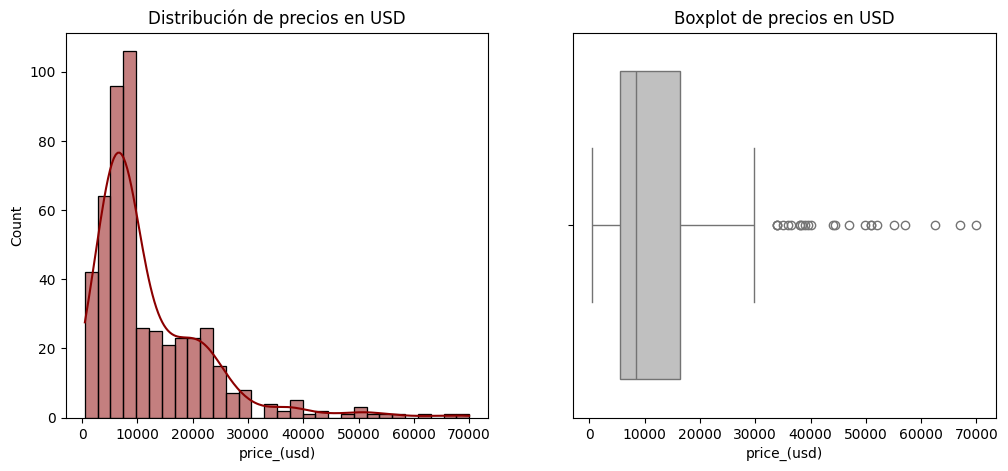

In [14]:
luxury_palette = ["gold", "champagne", "royalblue", "navy", "crimson", 
                  "charcoal", "silver", "mediumseagreen", "darkred", "black"]
# Ajustar el tamaño de las gráficas
plt.figure(figsize=(12, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(df["price_(usd)"], bins=30, kde=True, color="darkred")
plt.title("Distribución de precios en USD")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df["price_(usd)"], color="silver")
plt.title("Boxplot de precios en USD")

plt.show()

In [15]:
df.describe()

,case_diameter_(mm),case_thickness_(mm),band_width_(mm),price_(usd),water_resistance_numeric,power_reserve_numeric
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,41.044269,11.592866,21.103755,12082.964427,122.371542,59.268775
std,2.537492,2.491863,1.659538,10419.816968,149.305681,22.723192
min,27.500000,5.000000,15.000000,495.000000,30.000000,38.000000
25%,40.000000,9.800000,20.000000,5500.000000,50.000000,45.000000
50%,41.000000,12.025000,20.000000,8350.000000,100.000000,55.000000
75%,42.000000,13.300000,22.000000,16450.000000,120.000000,68.000000
max,46.500000,17.500000,28.000000,70000.000000,2000.000000,270.000000


##### Resumen del  Análisis del Target (Precio en USD)

Al observar el gráfico de distribución de los precios de los relojes de lujo, podemos ver que la distribución está **sesgada hacia la derecha**. La mayoría de los valores se agrupan en torno a los 10.000 dólares, mientras que hay una **larga cola hacia la derecha** que llega hasta los 70.000 dólares, lo que indica la presencia de relojes de lujo extremadamente caros.

En el **boxplot** también se puede observar que existen varios **outliers** en los precios, especialmente en los valores más altos, lo que refuerza la idea de que algunos relojes están significativamente fuera del rango de precios típicos.

En cuanto a las estadísticas descriptivas:
- El **mínimo** de los precios es **495 dólares**, lo que indica que existen relojes más asequibles.
- El **máximo** es **70.000 dólares**, lo que muestra la presencia de relojes de lujo de alto valor.
- La **mediana** se encuentra en torno a **8.300 dólares**, lo que significa que la mitad de los relojes tienen un precio inferior a esta cantidad.
- La **media** es **12.000 dólares**, lo que es mayor que la mediana debido a los valores extremadamente altos que arrastran el promedio.



En resumen, la distribución de los precios de los relojes de lujo muestra una clara **asimetría positiva** con una concentración de valores alrededor de los 10.000 dólares y algunos precios muy altos que aumentan la media. Esto sugiere que los relojes de lujo tienden a tener un rango de precios amplio, con muchos modelos asequibles y algunos extremadamente caros. La presencia de outliers y la diferencia entre la media y la mediana confirman esta distribución sesgada.


##### Prueba de Shapiro -Wilk

In [16]:
# Prueba de normalidad de Shapiro-Wilk
stat, p_value = shapiro(df['price_(usd)'])

print(f'Estadístico de Shapiro-Wilk: {stat:.4f}')
print(f'P-valor: {p_value:.4f}')

# Interpretación del resultado
alpha = 0.05
if p_value > alpha:
    print("No se rechaza la hipótesis nula: La distribución parece normal.")
else:
    print("Se rechaza la hipótesis nula: La distribución NO es normal.")


Estadístico de Shapiro-Wilk: 0.7940
P-valor: 0.0000
Se rechaza la hipótesis nula: La distribución NO es normal.



Al realizar la **prueba de normalidad**, obtenemos un **p-valor de 0.00**, lo que nos lleva a **rechazar la hipótesis nula** y concluir que la variable **no sigue una distribución normal**.  

Esto puede tener un **impacto en los modelos de regresión**, ya que algunos algoritmos **asumen normalidad en la variable objetivo** para hacer predicciones más precisas. También puede afectar a **pruebas estadísticas** que requieren que los datos sean normales.  

Dado esto, **tendremos que evaluar posibles transformaciones en el futuro** para mejorar la distribución y optimizar los análisis.  



##### Outliers del Target

In [17]:


# Definir Q1 (percentil 25) y Q3 (percentil 75)
Q1 = df["price_(usd)"].quantile(0.25)
Q3 = df["price_(usd)"].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df[(df["price_(usd)"] < lower_bound) | (df["price_(usd)"] > upper_bound)]

# Contar cuántos outliers hay en total
num_outliers = outliers.shape[0]

# Contar cuántos están por encima y por debajo
num_outliers_above = df[df["price_(usd)"] > upper_bound].shape[0]
num_outliers_below = df[df["price_(usd)"] < lower_bound].shape[0]

# Mostrar resultados
print(f"Número total de outliers: {num_outliers}")
print(f"Outliers por encima del límite superior: {num_outliers_above}")
print(f"Outliers por debajo del límite inferior: {num_outliers_below}")

# Opcional: Mostrar los outliers detectados
outliers


Número total de outliers: 24
Outliers por encima del límite superior: 24
Outliers por debajo del límite inferior: 0


,brand,model,case_material,strap_material,movement_type,water_resistance,case_diameter_(mm),case_thickness_(mm),band_width_(mm),dial_color,crystal_material,complications,power_reserve,price_(usd),water_resistance_numeric,power_reserve_numeric
62,Patek Philippe,Nautilus,Stainless Steel,Stainless Steel,Automatic,120 meters,40.8,8.3,20.0,Blue,Sapphire,"Date, Moon Phase",48 hours,44500,120.0,48.0
73,Patek Philippe,Nautilus,Stainless Steel,Stainless Steel,Automatic,120 meters,40.5,8.3,20.0,Blue,Sapphire,Date,45 hours,49800,120.0,45.0
105,Patek Philippe,Nautilus,Stainless Steel,Stainless Steel,Automatic,120 meters,40.8,8.3,20.0,Blue,Sapphire,"Date, Power Reserve, Moon Phase",45 hours,38000,120.0,45.0
106,Audemars Piguet,Royal Oak,Rose Gold,Rose Gold,Automatic,50 meters,41.0,9.8,20.0,Blue,Sapphire,Date,60 hours,55000,50.0,60.0
121,Patek Philippe,Nautilus,Stainless Steel,Stainless Steel,Automatic,120 meters,40.8,8.3,20.0,Blue,Sapphire,Date,45 hours,47000,120.0,45.0
129,Patek Philippe,Nautilus,Stainless Steel,Stainless Steel,Automatic,120 meters,40.8,8.3,20.0,Blue,Sapphire,Date,45 hours,38000,120.0,45.0
178,Patek Philippe,Nautilus,Stainless Steel,Stainless Steel,Automatic,120 meters,40.5,8.3,22.0,Blue,Sapphire,Date,45 hours,34000,120.0,45.0
182,Patek Philippe,Nautilus,Stainless Steel,Stainless Steel,Automatic,120 meters,40.5,8.3,22.0,Blue,Sapphire,Date,45 hours,34000,120.0,45.0
236,Patek Philippe,Nautilus,Stainless Steel,Stainless Steel,Automatic,120 meters,40.8,8.3,21.0,Blue,Sapphire,Date,55 hours,51000,120.0,55.0
252,Patek Philippe,Nautilus,Stainless Steel,Stainless Steel,Automatic,120 meters,40.8,8.3,21.0,Blue,Sapphire,Date,45 hours,62500,120.0,45.0


##### Resumen de Análisis de Outliers en target

Como solo hay **24 outliers** y los hemos podido identificar a simple vista, hemos determinado que:  

- **Casi todos pertenecen a la marca Patek Philippe**.  
- **Casi todos utilizan el mismo material de caja**  
- **Casi todos tienen movimiento automático**.  
- **Casi todos tienen cristal de zafiro**.  

Por lo tanto, pensamos que **no están distorsionando la información**, sino que estos precios son característicos de esta marca con esos materiales.  

#####  Decisión sobre los outliers  
- Nos **quedaremos con los outliers**, ya que representan una realidad del mercado de relojes de lujo.  
- **Posteriormente aplicaremos una transformación logarítmica** (`np.log1p`) para mejorar la normalidad y hacer que los modelos sean más robustos.  
- Sin embargo, si aún así esto afectara a nuestros modelos, **usaremos winsorización como alternativa**.  



### 1.3 Análisis Numérico

In [18]:
# Seleccionar solo las variables numéricas
numerical_cols = ['case_diameter_(mm)', 'case_thickness_(mm)',
       'band_width_(mm)','price_(usd)', 'water_resistance_numeric',
       'power_reserve_numeric']  # Excluimos work_year por ser más categórica

# Calcular la correlación en valor absoluto con el target
correlation_values = df[numerical_cols].corr()['price_(usd)'].abs().sort_values(ascending=False)

# Mostrar los resultados
print(correlation_values)

price_(usd)                 1.000000
case_thickness_(mm)         0.408458
water_resistance_numeric    0.132085
band_width_(mm)             0.088549
case_diameter_(mm)          0.085783
power_reserve_numeric       0.037343
Name: price_(usd), dtype: float64


##### Análisis de Correlación de Variables Numéricas  

Para entender mejor la relación entre las variables numéricas de nuestro dataset, hemos realizado un análisis de correlación.  
donde observamos que la variable con **mayor correlación** con el precio es **case_thikness** (40%). Sin embargo, el resto de variables muestran correlaciones muy bajas, lo que sugiere que **no tienen una relación lineal fuerte con el precio**.

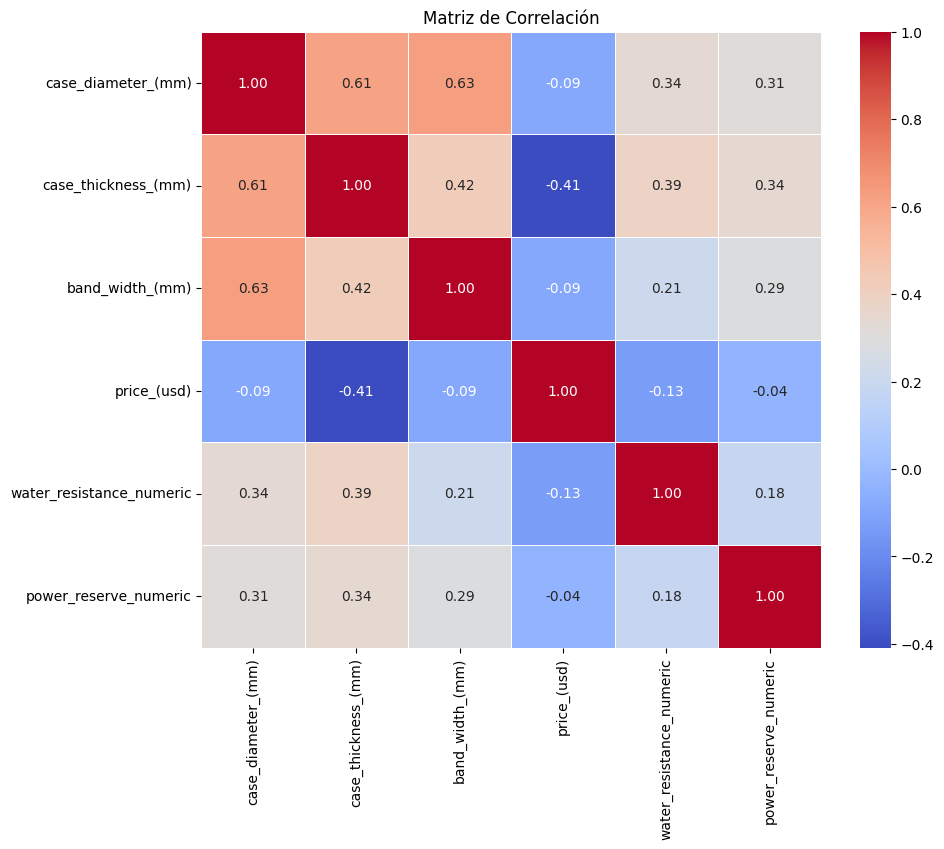

In [19]:

# Calcular la matriz de correlación 
correlation_matrix = df[numerical_cols].corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el heatmap con anotaciones
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Agregar título
plt.title("Matriz de Correlación")

# Mostrar el gráfico
plt.show()




##### Resumen Análisis correlaciones numericas
 
Ya hemos analizado la relación de las variables con nuestra **target (precio)** de manera individual. Ahora pasamos a examinar la relación conjunta entre estas variables mediante una **matriz de correlación visualizada con un heatmap**.  

- **Alta correlación entre variables**: Vemos que algunas variables están fuertemente correlacionadas entre sí, lo que indica posible **información redundante** en un modelo de Machine Learning.  
- **Correlaciones más fuertes con el precio**: Se mantienen en **Case Thickness** y **Bandwidth**, las cuales, a su vez, están muy correlacionadas con **Case Diameter**.  
- **Power Reserve Numeric tiene una correlación baja con todo**, lo que sugiere que no aporta mucho valor al análisis y podría ser descartada.  
- **Correlación negativa con el precio**: Todas las correlaciones del precio son negativas, lo que nos sugiere que **las características físicas más grandes no necesariamente significan un reloj más caro**, algo que tiene sentido en el mercado de lujo.  

**Conclusión**: Dado que algunas variables están fuertemente correlacionadas, sería recomendable aplicar una **PCA (Análisis de Componentes Principales)** o eliminar variables redundantes para evitar problemas de multicolinealidad en modelos predictivos.  

  


##### Análisis de la distribucion de las variables numéricas

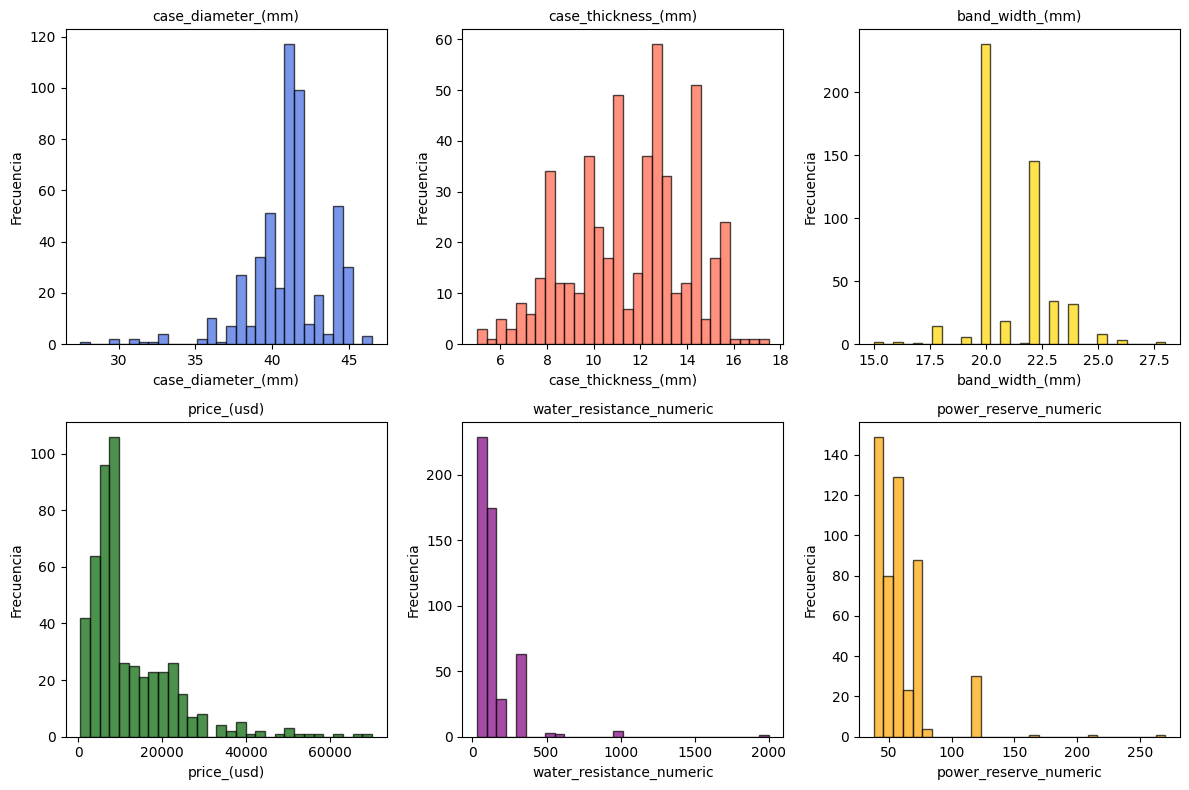

In [20]:


# Definir la paleta de colores
palette = ["royalblue", "tomato", "gold", "darkgreen", "purple", "orange", 
           "crimson", "teal", "darkslategray", "indigo"]

# Seleccionar las variables numéricas
numerical_cols = ['case_diameter_(mm)', 'case_thickness_(mm)',
                  'band_width_(mm)', 'price_(usd)', 'water_resistance_numeric',
                  'power_reserve_numeric']

# Crear histogramas
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)  # Ajustar según el número de variables
    plt.hist(df[col], bins=30, color=palette[i], edgecolor="black", alpha=0.7)
    plt.title(col, fontsize=10)
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


En el análisis de los histogramas de las variables numéricas, observamos que **case_diameter_(mm)**, **case_thickness_(mm)** y **band_width_(mm)** muestran una distribución que podría tender a la normalidad. Sin embargo, **price_(usd)** y **water_resistance_numeric** claramente no siguen una distribución normal. Por otro lado, **power_reserve_numeric** presenta un sesgo hacia valores bajos, especialmente en cero, pero aún podría ajustarse con transformaciones. En base a esto, se recomienda aplicar una transformación logarítmica a las cuatro variables que no presentan una distribución normal adecuada.


##### Análisis de los outliers en variables numericas 

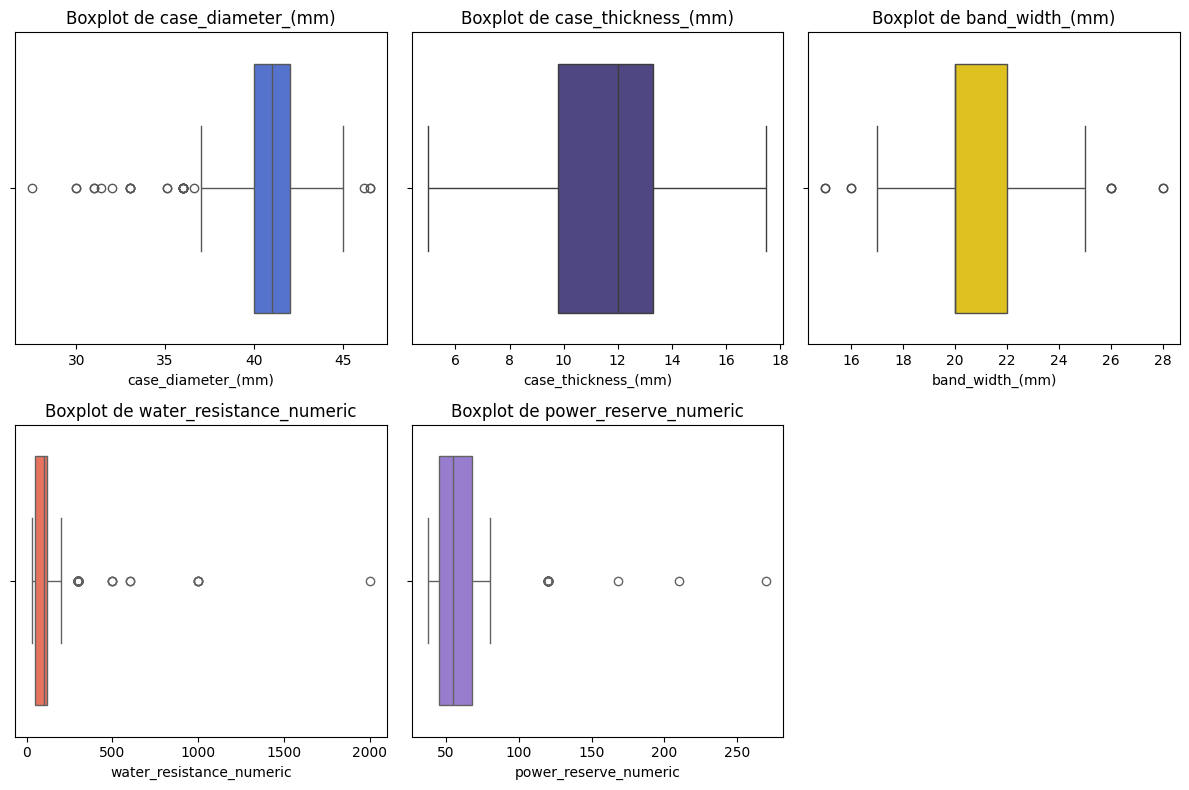

In [21]:


# Definir la paleta de colores
luxury_palette = [
    "RoyalBlue", "DarkSlateBlue", "Gold", "Tomato", "MediumPurple", 
    "MediumSeaGreen", "Firebrick", "SteelBlue", "SlateGray", "RosyBrown"
]

# Variables numéricas
numerical_cols = ['case_diameter_(mm)', 'case_thickness_(mm)', 'band_width_(mm)', 
                  'water_resistance_numeric', 'power_reserve_numeric']

# Crear un boxplot para cada variable numérica
plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color=luxury_palette[i-1])  # Utilizando la paleta definida
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [22]:


def find_outliers(df, cols):
    outliers_info = {}
    
    for col in cols:
        # Calcular los percentiles y el IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Definir los límites inferior y superior
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        # Filtrar los outliers
        outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
        
        # Guardar la cantidad de outliers por variable
        outliers_info[col] = outliers.shape[0]  # Número de filas que son outliers
    
    return outliers_info

# Definir las variables numéricas que quieres analizar
numerical_columns = ['case_diameter_(mm)', 'band_width_(mm)', 'water_resistance_numeric', 'power_reserve_numeric']

# Llamar a la función para obtener el número de outliers por variable
outliers = find_outliers(df, numerical_columns)

# Mostrar el número de outliers por cada variable
print(outliers)


{'case_diameter_(mm)': 27, 'band_width_(mm)': 9, 'water_resistance_numeric': 73, 'power_reserve_numeric': 33}


##### Resumen del  tratamiento de variables numéricas y outliers 

Ya hemos analizado la relación de las variables con nuestra target y su correlación general en la matriz de correlación. Ahora, pasamos a examinar los outliers en nuestro dataset. Identificamos valores atípicos en case_diameter, band_width, water_resistance_numeric y power_reserve_numeric. Al observar su distribución, vemos que siguen una distribución relativamente normal, aunque case_diameter presenta una ligera asimetría hacia la derecha. Por otro lado, price, water_resistance_numeric y power_reserve_numeric muestran una clara asimetría hacia la izquierda.  

Dado que el heatmap de correlación ya nos indicaba que `case_thickness` y `band_width` estaban fuertemente correlacionadas con `case_diameter`, pero su relación con `price` era negativa, decidimos comprobar si tratar los outliers tenía algún impacto en la precisión del modelo. Tras probar la sustitución de los valores extremos por la mediana, no observamos mejoras en el rendimiento del modelo. Esto refuerza la conclusión de que las características físicas alejadas del reloj no determinan directamente su precio y que los outliers en estas variables no aportan ruido significativo. Por lo tanto, decidimos mantenerlos en el dataset sin modificaciones.



### 1.4 Análisis Categórico

In [23]:
# Definir las variables categóricas
categorical_vars = ['brand', 'model', 'case_material', 'strap_material', 'movement_type',
       'water_resistance', 'dial_color', 'crystal_material', 'complications',
       'power_reserve']

##### Análisis de cardinalidad

In [24]:
# Hallar la cardinalidad de cada variable categórica y ordenarlas
categorical_vars = [
    'brand', 'model', 'case_material', 'strap_material', 'movement_type',
    'water_resistance', 'dial_color', 'crystal_material', 'complications',
    'power_reserve'
]

# Crear un diccionario para almacenar la cardinalidad y su porcentaje
cardinality_dict = {}

# Calcular la cardinalidad para cada variable categórica
for col in categorical_vars:
    cardinality = df[col].nunique()  # Valores únicos
    total = len(df[col])  # Total de elementos en la columna
    cardinality_percentage = (cardinality / total) * 100  # Porcentaje respecto al total
    cardinality_dict[col] = (cardinality, cardinality_percentage)

# Ordenar por cardinalidad de mayor a menor
sorted_cardinality = sorted(cardinality_dict.items(), key=lambda x: x[1][0], reverse=True)

# Imprimir los resultados ordenados
print("\nCardinalidad de las variables categóricas (ordenadas de mayor a menor):")
for col, (card, perc) in sorted_cardinality:
    print(f"{col}: {card} valores únicos ({perc:.2f}%)")



Cardinalidad de las variables categóricas (ordenadas de mayor a menor):
model: 95 valores únicos (18.77%)
brand: 39 valores únicos (7.71%)
complications: 29 valores únicos (5.73%)
power_reserve: 24 valores únicos (4.74%)
case_material: 17 valores únicos (3.36%)
strap_material: 14 valores únicos (2.77%)
water_resistance: 12 valores únicos (2.37%)
dial_color: 7 valores únicos (1.38%)
movement_type: 4 valores únicos (0.79%)
crystal_material: 4 valores únicos (0.79%)


In [25]:
criterio=3

# Filtrar las variables categóricas que cumplen el criterio
categoricas_principales = [col for col, (card, perc) in sorted_cardinality if perc > criterio]

# Imprimir los resultados ordenados
print("\nCardinalidad de las variables categóricas (ordenadas de mayor a menor):")
for col, (card, perc) in sorted_cardinality:
    print(f"{col}: {card} valores únicos ({perc:.2f}%)")

# Imprimir las variables categóricas principales
print("\nVariables categóricas con cardinalidad > 3%:")
print(categoricas_principales)



Cardinalidad de las variables categóricas (ordenadas de mayor a menor):
model: 95 valores únicos (18.77%)
brand: 39 valores únicos (7.71%)
complications: 29 valores únicos (5.73%)
power_reserve: 24 valores únicos (4.74%)
case_material: 17 valores únicos (3.36%)
strap_material: 14 valores únicos (2.77%)
water_resistance: 12 valores únicos (2.37%)
dial_color: 7 valores únicos (1.38%)
movement_type: 4 valores únicos (0.79%)
crystal_material: 4 valores únicos (0.79%)

Variables categóricas con cardinalidad > 3%:
['model', 'brand', 'complications', 'power_reserve', 'case_material']


##### Resumen de cardinalidad
por la cardinalidad observada podriamos prescindir de bastantes variables, pero muy comodamente podriamos prescindir en el analisis de crystal_material y movement type

##### Prueba de Chi-cuadrado

In [26]:


# Lista de variables categóricas a analizar
categorical_vars = ['model', 'brand', 'complications', 'power_reserve', 'case_material']

# Lista para almacenar los resultados
chi2_results = []

# Prueba de Chi-Cuadrado para cada par de variables categóricas
for var1, var2 in combinations(categorical_vars, 2):
    # Crear tabla de contingencia
    contingency_table = pd.crosstab(df[var1], df[var2])

    # Aplicar la prueba de Chi-Cuadrado
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    # Guardar resultados en la lista
    chi2_results.append({'Variable 1': var1, 'Variable 2': var2, 'Chi2': chi2, 'p-valor': p})

# Convertir los resultados en un DataFrame y ordenarlos por p-valor ascendente
chi2_results_df = pd.DataFrame(chi2_results).sort_values(by='p-valor')

# Mostrar los resultados ordenados
print("\nResultados de la prueba de Chi-Cuadrado:")
chi2_results_df



Resultados de la prueba de Chi-Cuadrado:


,Variable 1,Variable 2,Chi2,p-valor
0,model,brand,18241.464286,0.000000e+00
2,model,power_reserve,7090.980359,0.000000e+00
5,brand,power_reserve,5616.886473,0.000000e+00
6,brand,case_material,1664.601053,4.483915e-99
3,model,case_material,2903.268660,1.400592e-91
7,complications,power_reserve,1151.010122,3.608316e-31
1,model,complications,3277.984835,6.507433e-17
9,power_reserve,case_material,580.897290,8.782608e-12
4,brand,complications,1240.574037,1.318135e-04
8,complications,case_material,180.947941,1.000000e+00


Hemos realizado una **prueba de Chi-Cuadrado** para evaluar la relación entre variables categóricas con alta cardinalidad. Este test mide si hay dependencia entre las categorías de cada variable.  

Los resultados indican que existe una relación fuertemente significativa entre todas las variables categoricas, puede sugerir que hay varibales redundantes.

##### Frecuencias Absolutas y relativas

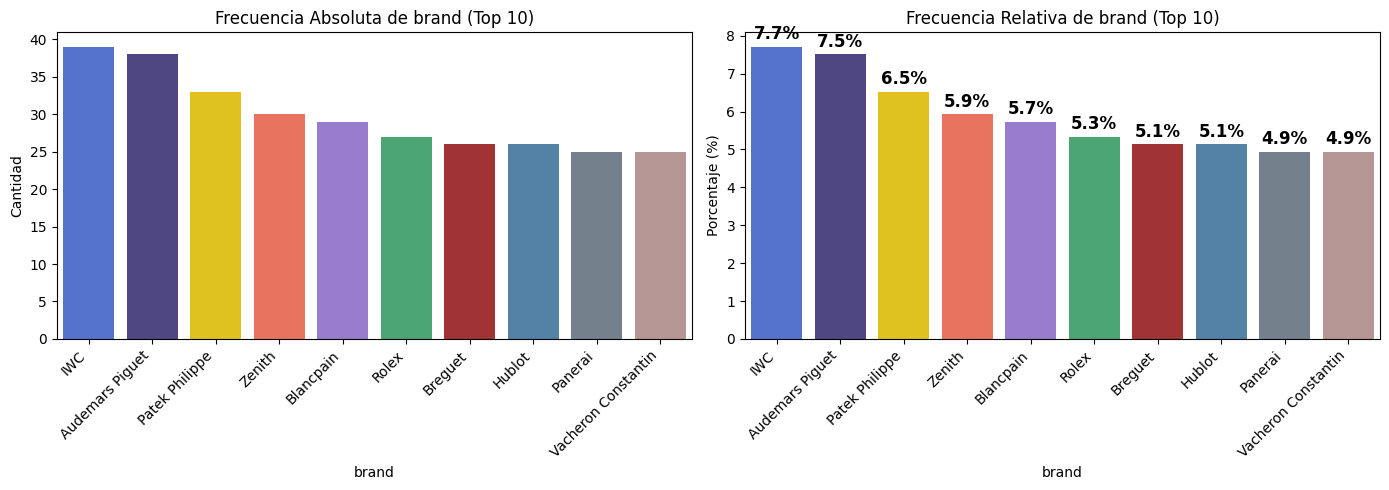

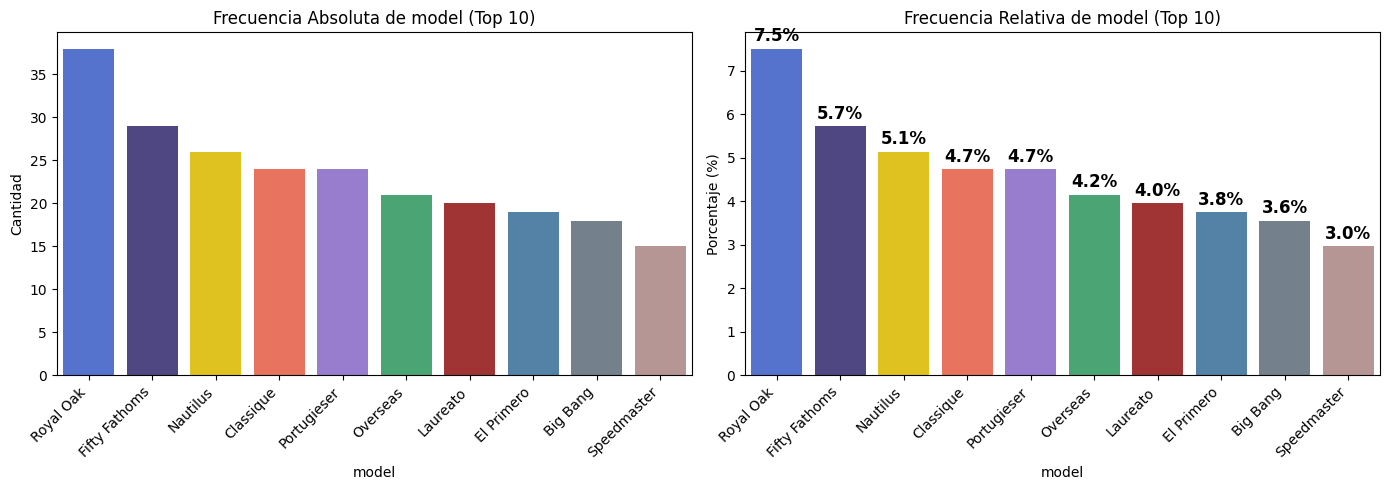

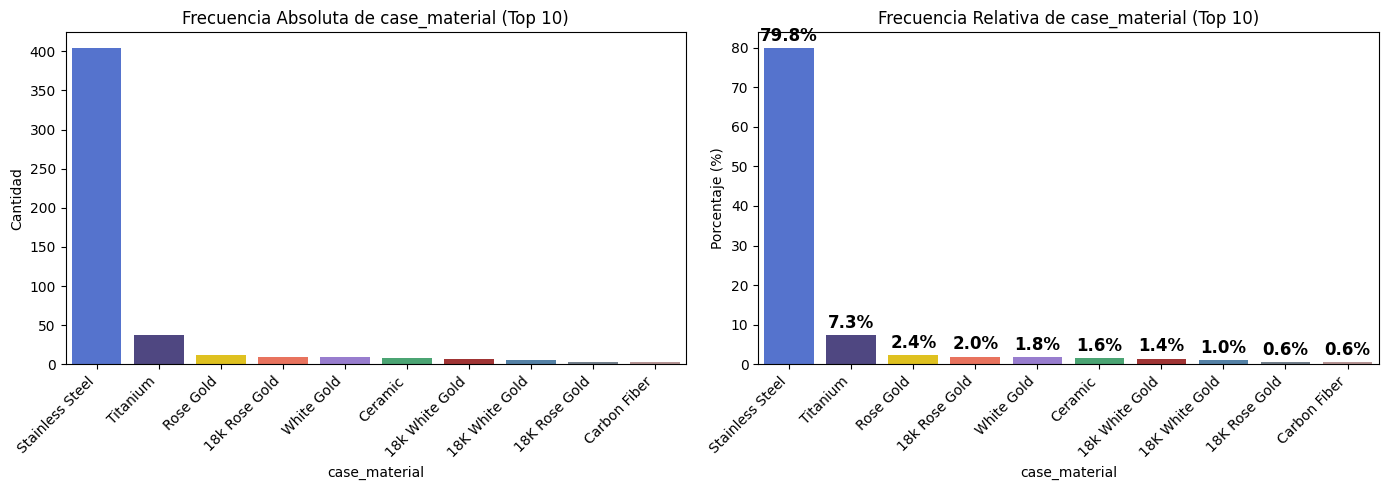

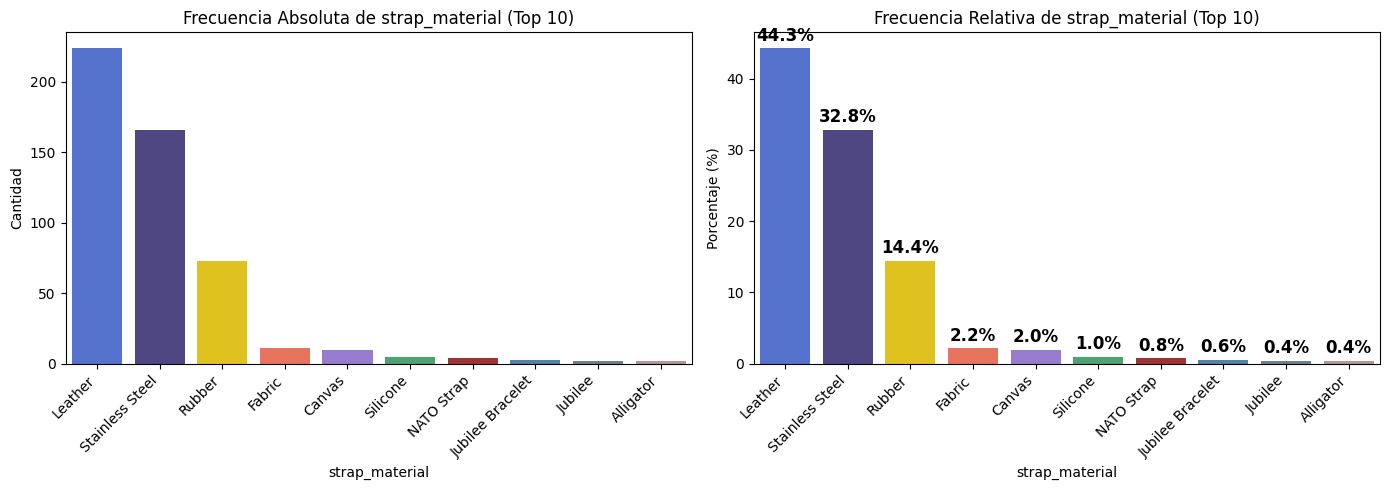

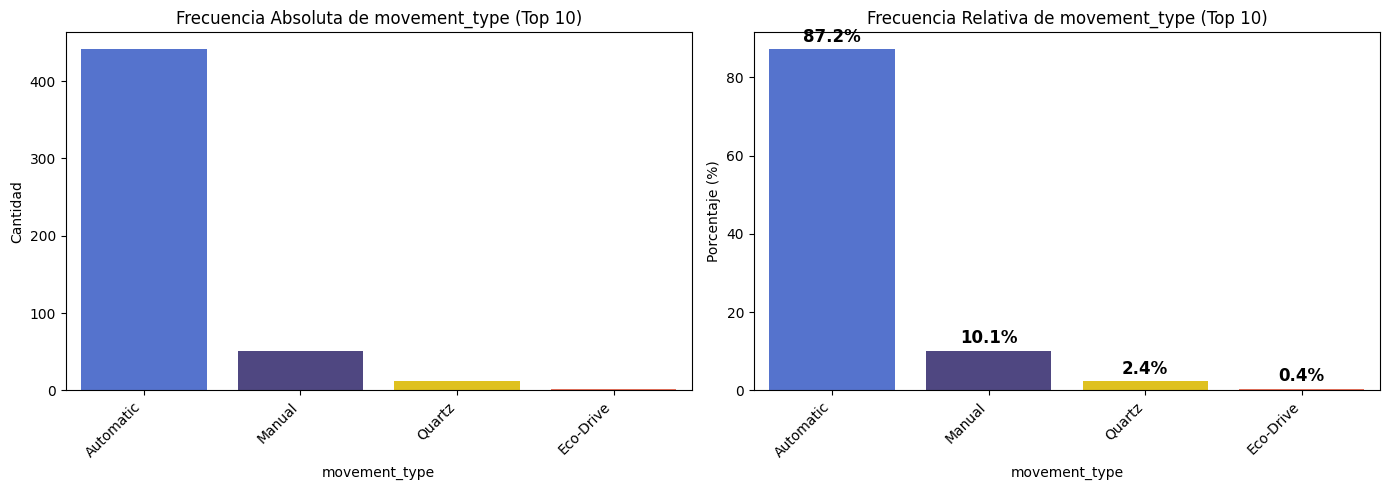

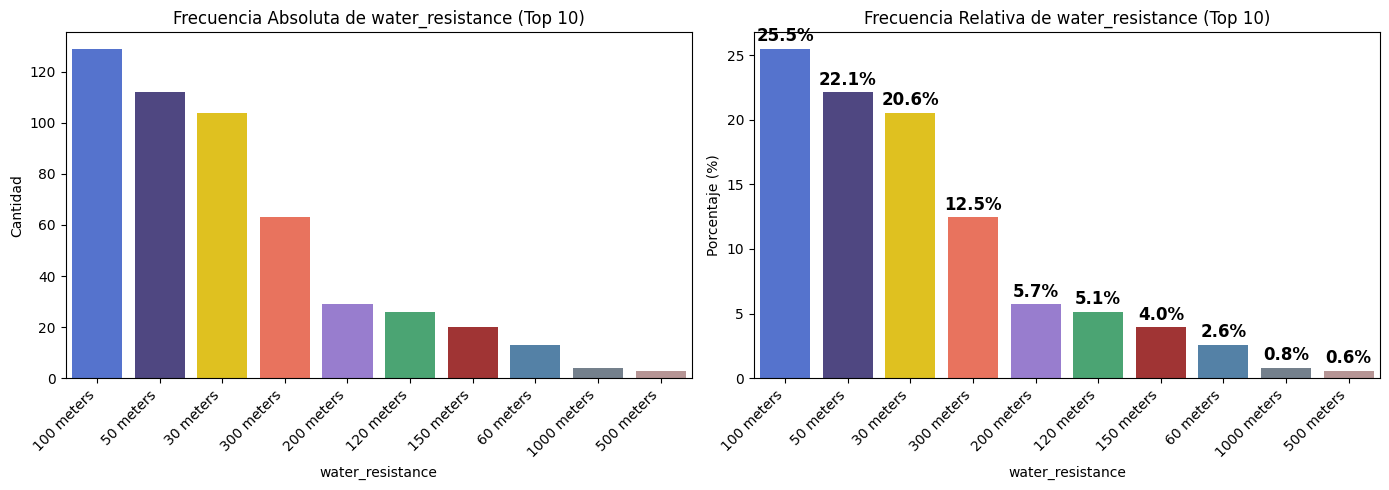

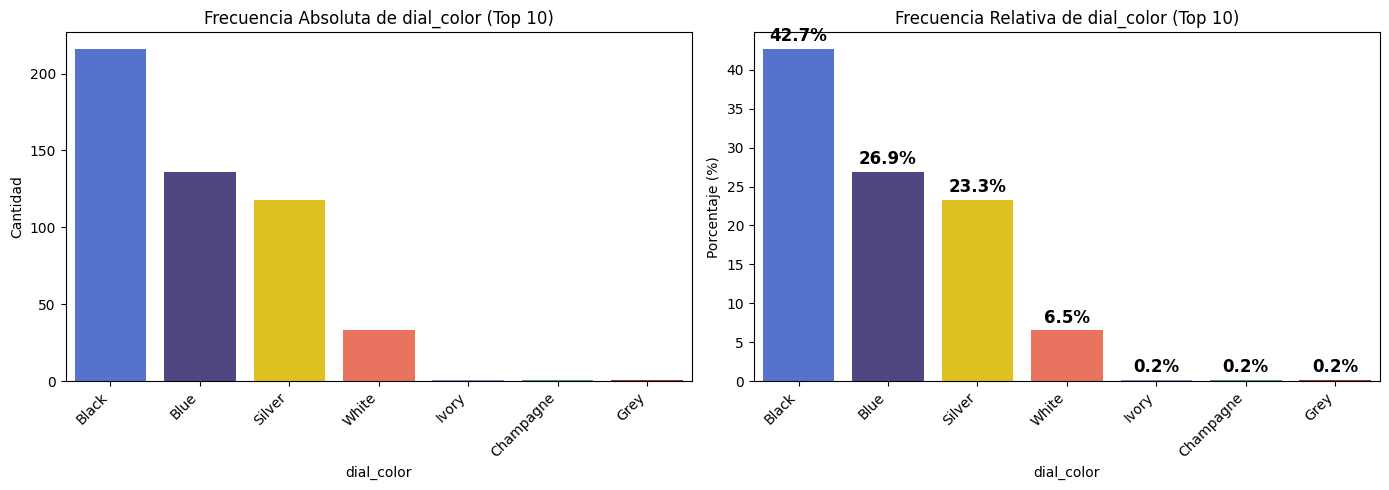

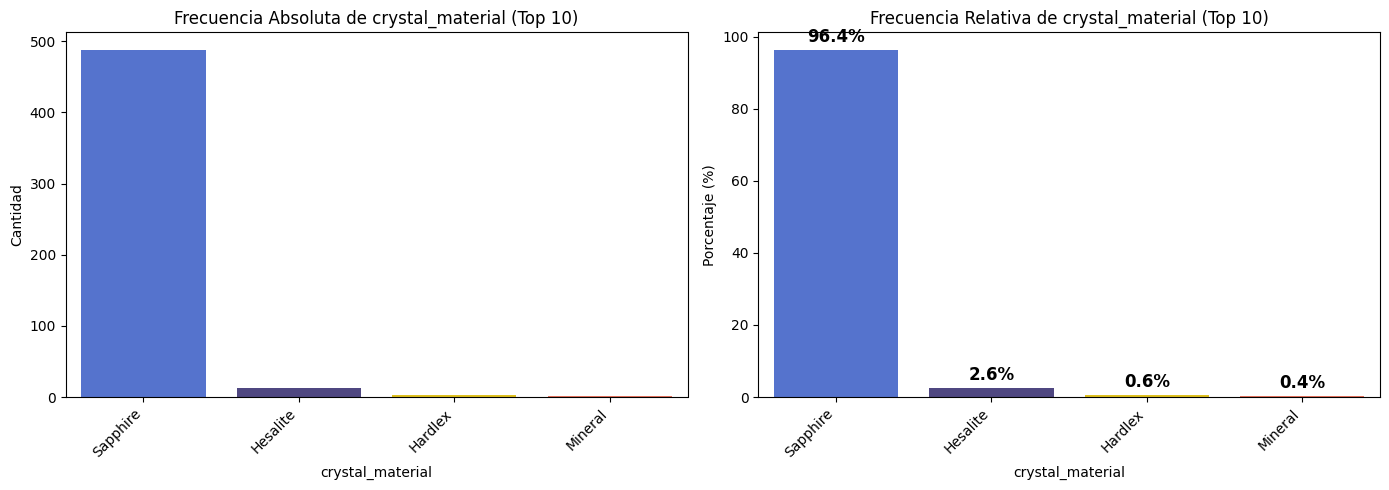

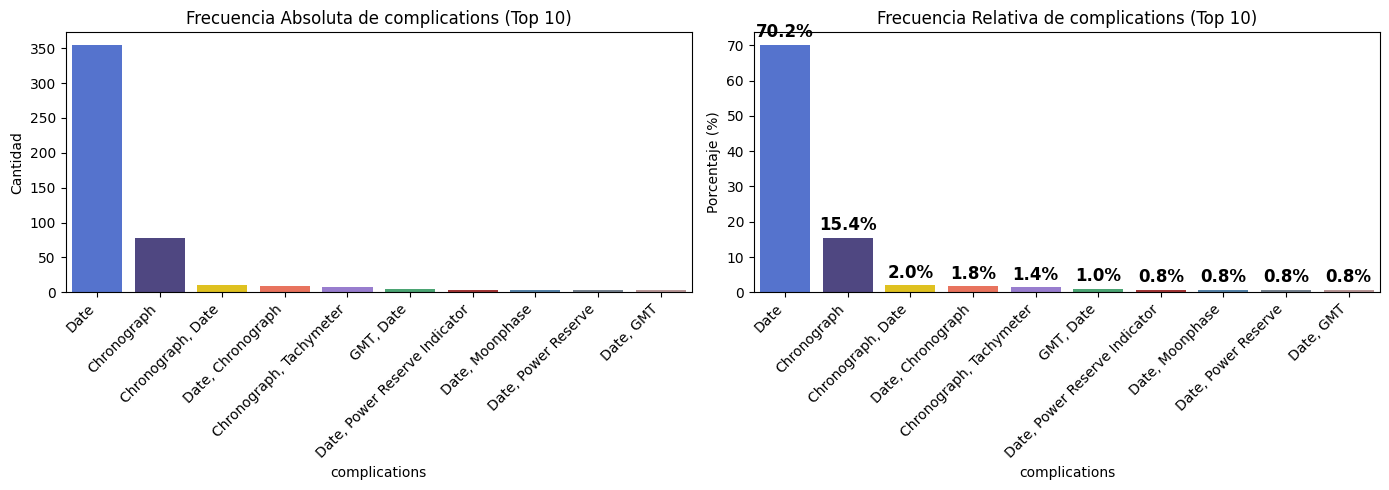

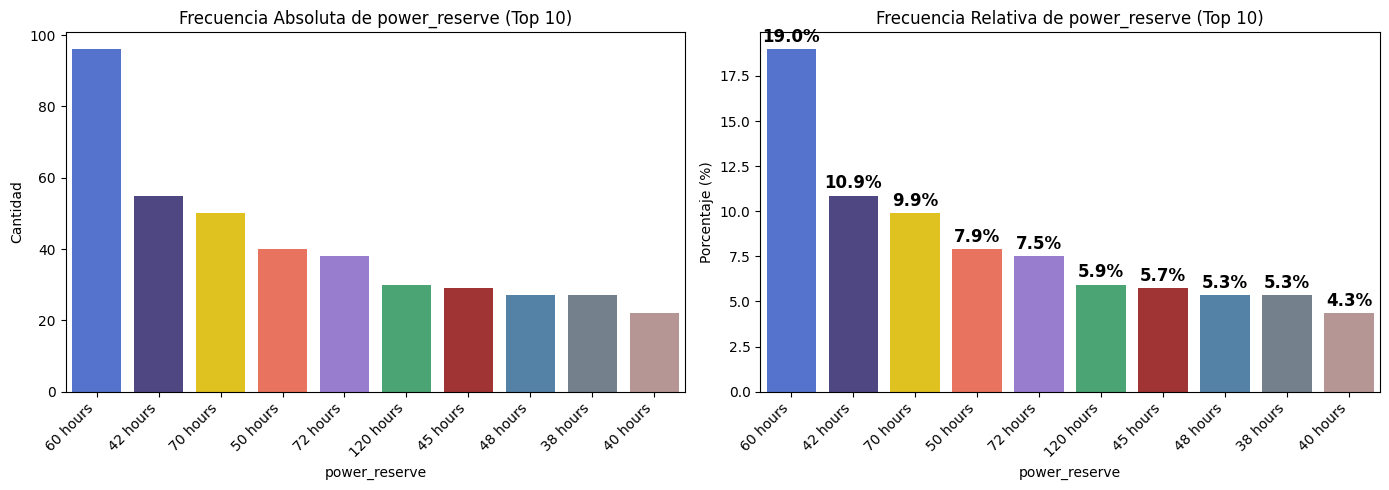

In [27]:
# Función para graficar las 10 categorías más frecuentes en una variable categórica
# Definir la paleta de colores
luxury_palette = [
    "RoyalBlue", "DarkSlateBlue", "Gold", "Tomato", "MediumPurple", 
    "MediumSeaGreen", "Firebrick", "SteelBlue", "SlateGray", "RosyBrown"
]

def plot_categorical_frequencies(df, column_name):
    """
    Grafica la frecuencia absoluta y relativa de las 10 categorías más frecuentes de una variable categórica.

    Args:
    df (DataFrame): DataFrame que contiene los datos.
    column_name (str): Nombre de la columna categórica a analizar.
    """
    # Calcular las 10 categorías más frecuentes
    top_10_absolute_freq = df[column_name].value_counts().nlargest(10)
    top_10_relative_freq = df[column_name].value_counts(normalize=True).nlargest(10) * 100  # Convertir a porcentaje

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Crear dos gráficos en una sola fila

    # Gráfico de frecuencias absolutas
    sns.barplot(x=top_10_absolute_freq.index, y=top_10_absolute_freq.values, palette=luxury_palette, ax=axes[0])
    axes[0].set_title(f'Frecuencia Absoluta de {column_name} (Top 10)')
    axes[0].set_ylabel('Cantidad')
    axes[0].set_xticklabels(top_10_absolute_freq.index, rotation=45, ha='right')

    # Gráfico de frecuencias relativas
    sns.barplot(x=top_10_relative_freq.index, y=top_10_relative_freq.values, palette=luxury_palette, ax=axes[1])
    axes[1].set_title(f'Frecuencia Relativa de {column_name} (Top 10)')
    axes[1].set_ylabel('Porcentaje (%)')
    axes[1].set_xticklabels(top_10_relative_freq.index, rotation=45, ha='right')
     # Añadir los porcentajes encima de cada barra
    for p in axes[1].patches:
        axes[1].annotate(f'{p.get_height():.1f}%', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 9), textcoords='offset points', 
                         fontsize=12, color='black', fontweight='bold')

    plt.tight_layout()
    plt.show()

# Lista de variables categóricas
categorical_vars = ['brand', 'model', 'case_material', 'strap_material', 'movement_type',
                    'water_resistance', 'dial_color', 'crystal_material', 'complications',
                    'power_reserve']

# Generar los gráficos para cada variable categórica
for var in categorical_vars:
    plot_categorical_frequencies(df, var)


#####  Conclusiones analisis frecuencias relativas y absolutas de las variables categoricas

- **Marca:** Hay una buena representación de marcas, siendo Patek Philippe, Hublot, Zenith y BlackPain las más frecuentes, con valores cercanos al 8%. Aunque no hay una marca dominante, hay mucha diversidad.
  
- **Modelo:** El modelo más frecuente es Royal Oak, con un 7%, seguido de otros modelos icónicos. Aunque hay una variedad de modelos, los más conocidos y representativos predominan moderadamente.

- **Material del reloj:** Stainless Steel es el material más común, con una amplia diferencia frente a Titanium (7%). Esto muestra una fuerte preferencia por el acero inoxidable.

- **Material de la correa:** Leder (cuero) es el material más frecuente para las correas, seguido de Stainless Steel y Rubber. El cuero es claramente el material más utilizado, pero con otras opciones también presentes.

- **Tipo de movimiento:** Automático domina con un 90%, siendo ampliamente preferido en relojes de lujo. Los otros tipos de movimiento, como manual o cuarto, tienen una representación mínima.

- **Resistencia al agua:** La mayoría de los relojes tienen una resistencia al agua de 100 metros, seguida de los de 50 y 30 metros. Esto refleja una preferencia por relojes con resistencia moderada al agua.

- **Color de la esfera:** El color más común es negro, seguido de azul y plata. Los colores más clásicos dominan, con el negro siendo la opción preferida.

- **Cristal:** El cristal de zafiro es el más utilizado, representando el 96% de los relojes. Esto refleja la alta calidad y durabilidad de los cristales de zafiro en los relojes de lujo.

- **Complicaciones:** La mayoría de los relojes tienen la complicación de "fecha", seguida por el cronógrafo. La complicación de "fecha" es claramente la más popular.

- **Reserva de marcha:** Los relojes con 60 horas de reserva de marcha son los más comunes, seguidos de aquellos con 11 y 70 horas. La mayoría de los relojes tiene una reserva de marcha moderada.

##### Test de Kruskal-wallis

In [28]:
import scipy.stats as stats

# Función para realizar la prueba de Kruskal-Wallis entre una variable categórica y la variable target (precio)
def kruskal_wallis_test(df, target, categorical_vars):
    results = []
    
    for col in categorical_vars:
        # Agrupar los datos por las categorías de la variable
        groups = [df[target][df[col] == category] for category in df[col].unique()]
        
        # Realizar la prueba de Kruskal-Wallis
        H, p_value = stats.kruskal(*groups)
        
        # Almacenar el resultado
        results.append((col, H, p_value))
    
    return results

# Variables categóricas para probar
categorical_vars = ['model', 'brand', 'complications', 'power_reserve', 'case_material']

# Realizar la prueba de Kruskal-Wallis
kruskal_results = kruskal_wallis_test(df, 'price_(usd)', categorical_vars)

# Imprimir los resultados
print("\nResultados de la prueba de Kruskal-Wallis:")
for col, H, p_value in kruskal_results:
    print(f"{col}: H = {H:.2f}, p-valor = {p_value:.4e}")


Resultados de la prueba de Kruskal-Wallis:
model: H = 476.94, p-valor = 1.4042e-52
brand: H = 449.00, p-valor = 1.1299e-71
complications: H = 42.24, p-valor = 4.1129e-02
power_reserve: H = 250.78, p-valor = 3.4523e-40
case_material: H = 97.31, p-valor = 1.1019e-13


##### Conclusiones del Análisis de Kruskal-Wallis

Hemos utilizado la prueba de **Kruskal-Wallis** para analizar la relación que pueden tener las variables categóricas con nuestra variable objetivo (precio). Dado que estamos interesados en variables con alta cardinalidad, nos centramos en las siguientes variables: **model**, **brand**, **complications**, **power_reserve** y **case_material**.

Los resultados de la prueba indican que **model**, **brand**, **power_reserve** y **case_material** tienen una relación significativa con el precio, con valores p extremadamente bajos. Esto sugiere que estas variables son factores importantes a considerar al predecir el precio de los relojes.

Por otro lado, la variable **complications** también muestra un impacto sobre el precio, pero en menor medida, ya que su valor p es más alto en comparación con las otras variables.

En resumen, **model**, **brand**, **power_reserve** y **case_material** son variables claves para predecir el precio, mientras que **complications** tiene un impacto más moderado.

##### Análisis Bivarivariante¶

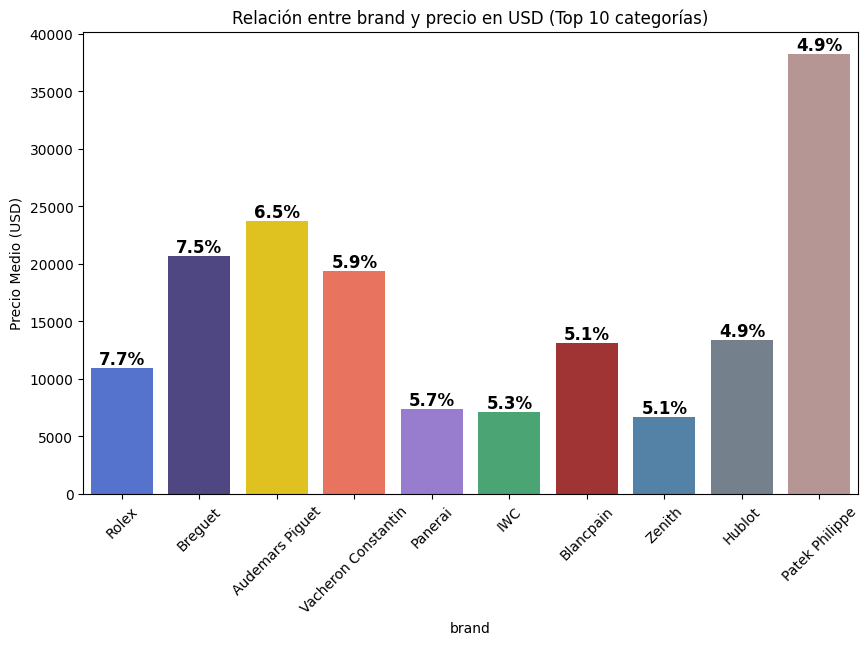

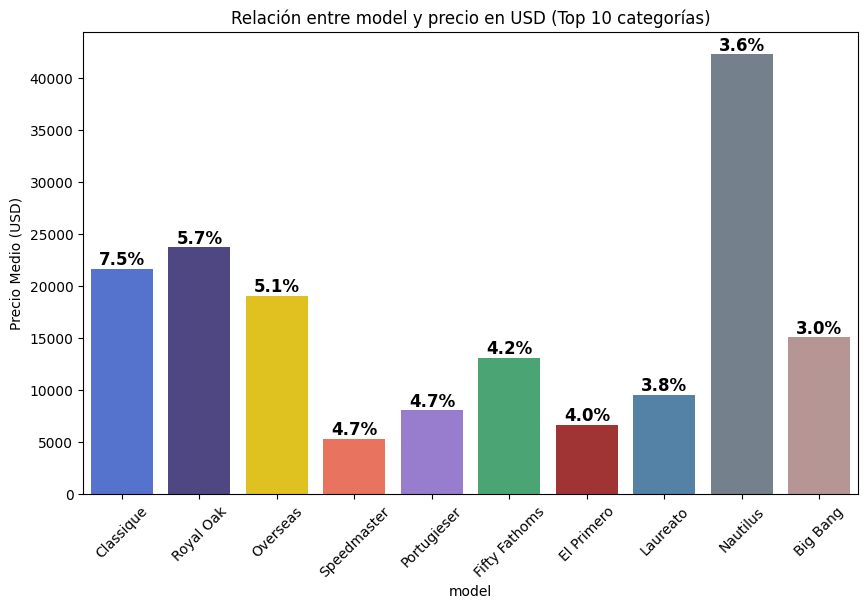

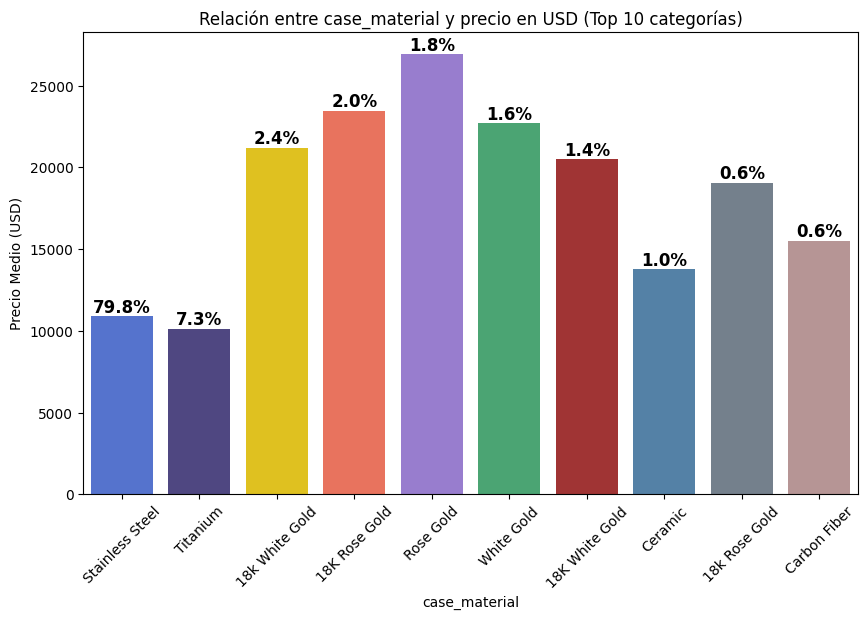

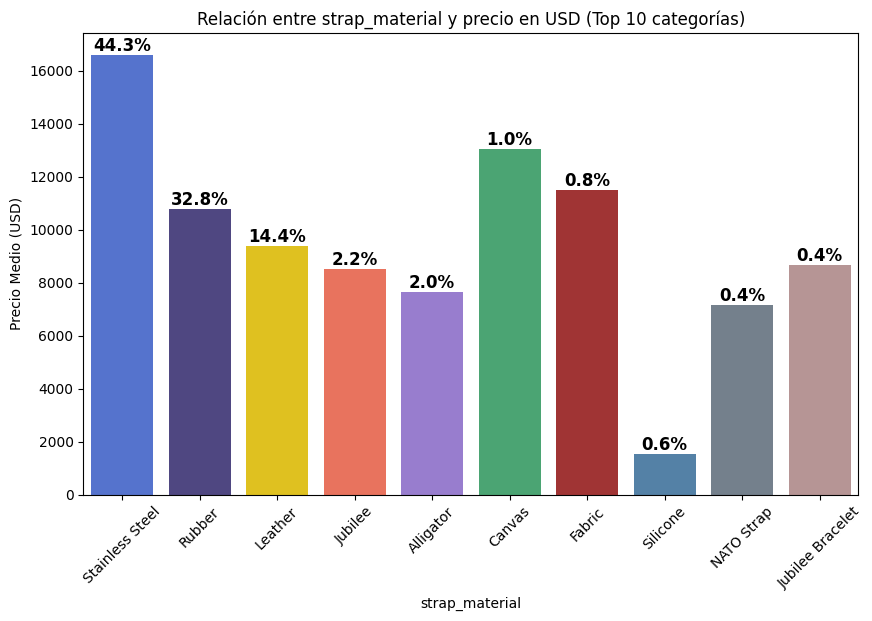

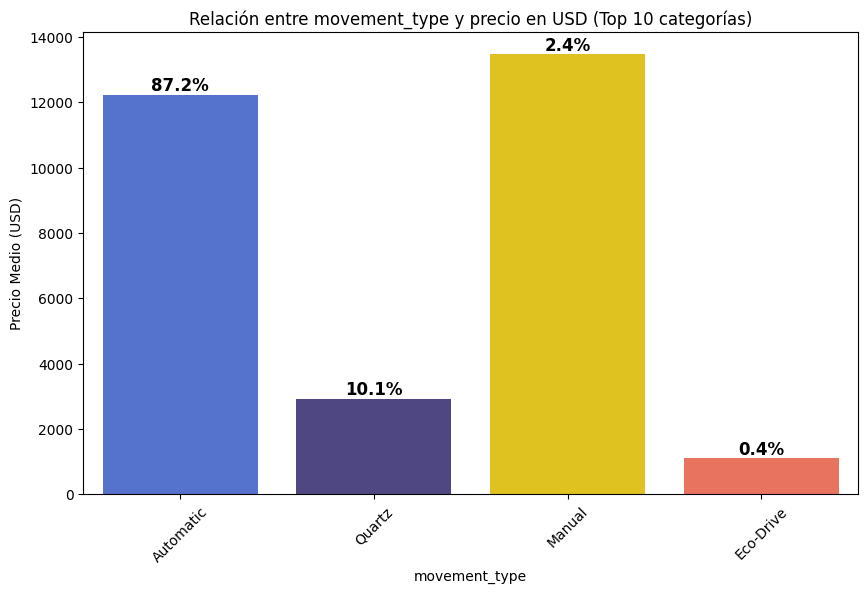

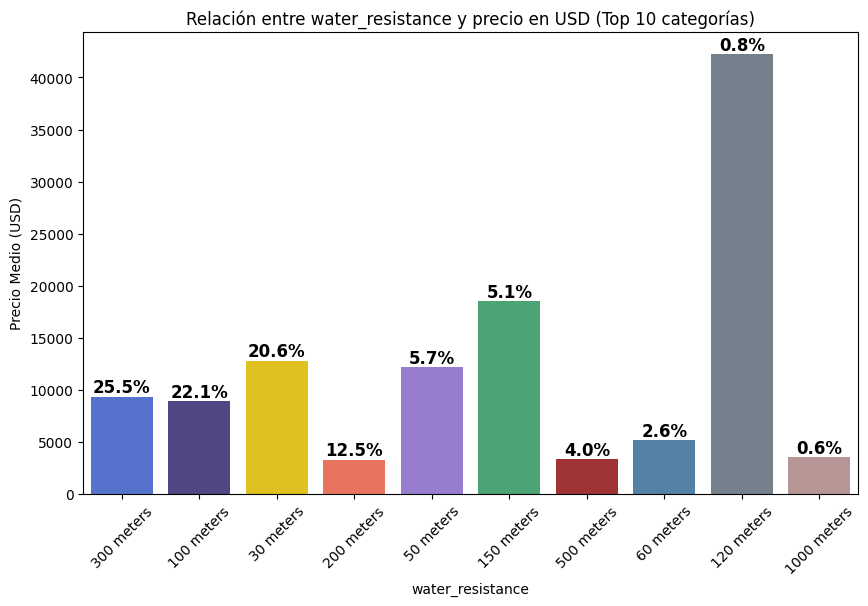

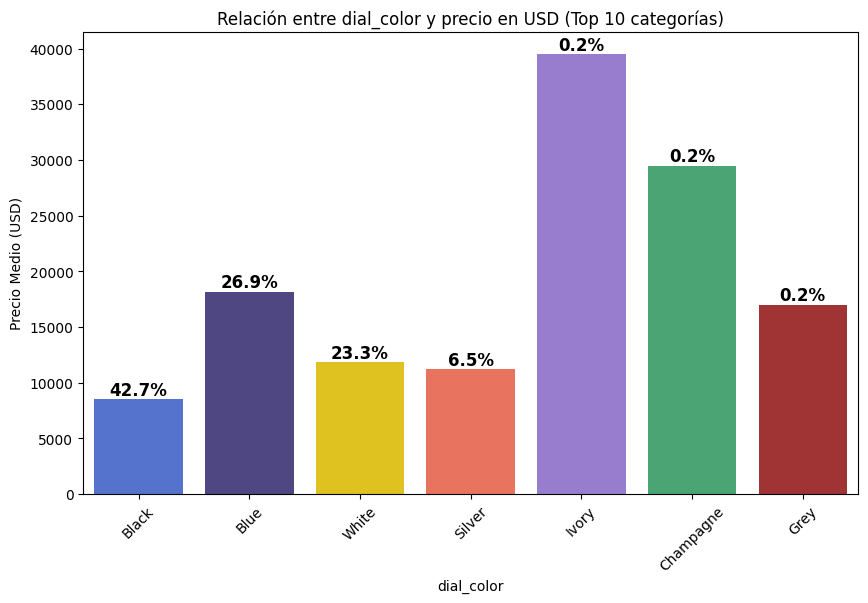

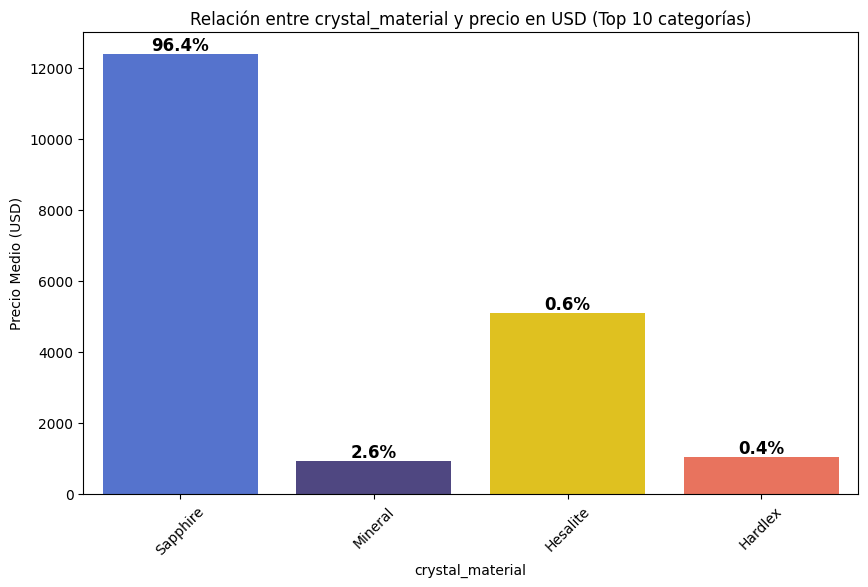

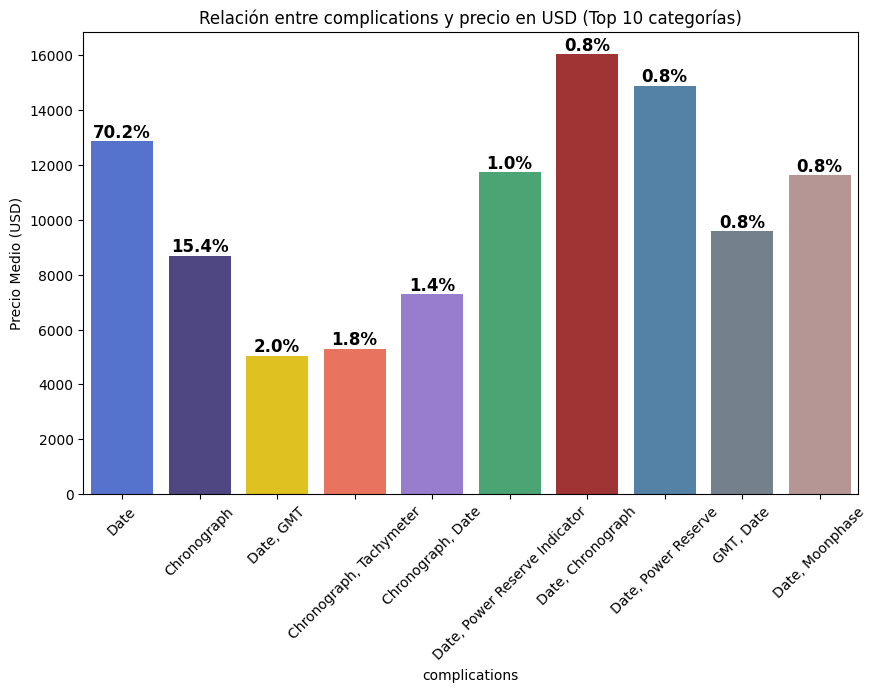

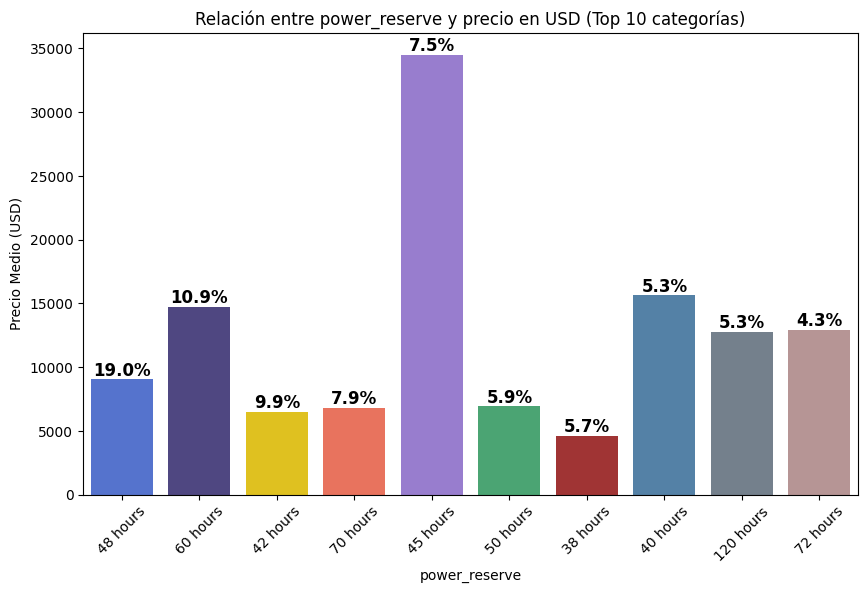

In [29]:


# Función para graficar las 10 categorías más frecuentes con porcentajes
def plot_top_10_categories(df, column_name):
    # Obtener las 10 categorías más frecuentes con sus conteos
    top_10_counts = df[column_name].value_counts().nlargest(10)
    top_10 = top_10_counts.index

    # Calcular porcentajes
    total_count = df[column_name].value_counts().sum()
    top_10_percentages = (top_10_counts/total_count)*100

    # Filtrar el dataset para que solo contenga esos 10 valores más frecuentes
    df_filtered = df[df[column_name].isin(top_10)]
    
    # Definir la paleta de colores de lujo
    luxury_palette = [
        "RoyalBlue", "DarkSlateBlue", "Gold", "Tomato", "MediumPurple", 
        "MediumSeaGreen", "Firebrick", "SteelBlue", "SlateGray", "RosyBrown"
    ]
    
    # Crear la figura
    plt.figure(figsize=(10, 6))
    
    # Graficar el precio medio de cada categoría
    ax = sns.barplot(
        x=column_name, 
        y='price_(usd)', 
        data=df_filtered, 
        estimator='mean', 
        ci=None, 
        palette=luxury_palette
    )
    
    # Agregar los porcentajes como etiquetas en cada barra
    for i, p in enumerate(ax.patches):
        ax.annotate(
            f"{top_10_percentages.iloc[i]:.1f}%", 
            (p.get_x() + p.get_width() / 2, p.get_height()), 
            ha='center', va='bottom', fontsize=12, fontweight='bold', color='black'
        )
    
    # Ajustes de formato
    plt.xticks(rotation=45)
    plt.title(f'Relación entre {column_name} y precio en USD (Top 10 categorías)')
    plt.ylabel('Precio Medio (USD)')
    plt.xlabel(column_name)
    plt.show()

# Graficar las 10 categorías más frecuentes de cada variable categórica
categorical_vars = [
    'brand', 'model', 'case_material', 'strap_material', 'movement_type',
    'water_resistance', 'dial_color', 'crystal_material', 'complications',
    'power_reserve'
]

for var in categorical_vars:
    plot_top_10_categories(df, var)

##### Conclusión sobre el análisis inicial de variables categóricas con el precio

Tras analizar la relación entre las variables categóricas y el precio, hemos obtenido las siguientes conclusiones clave:  

- **Marca:** La marca más cara es **Patek Philippe**, seguida por **Audemars Piguet**, **Breguet** y **Vacheron Constantin**.  
- **Modelo:** Los modelos más costosos son **Nautilus**, **Royal Oak**, **Classic** y **Overseas**.  
- **Material de la caja:** Los relojes de `Titanio`, `Oro Rosa` y `Oro de 18k` son los más caros, con `Oro Blanco` y `Stainless Steel` en un rango similar.  
- **Material de la correa:** El `Nato Strap` es significativamente más caro que el resto, seguido de `Silicone`.  
- **Tipo de movimiento:** Los relojes manuales ` son mucho más costosos que los de `Quartz`, `Automatic` y `Eco`.  
- **Resistencia al agua:** No existe una relación clara entre la resistencia al agua y el precio, ya que los más caros son los de `200m`, seguidos de `120m` y `30m`, mientras que los de `300m` no destacan en precio.  
- **Color del dial:** Los más costosos son los de color `Ivory`, `Blanco` y `Champagne`, indicando una clara preferencia en relojería de lujo.  
- **Material del cristal:**  lo esperado, los relojes con cristal `Zafiro` son los más caros, seguidos de `Hesalite`, mientras que `Mineral` y `Hardlex` son más asequibles.  
- **Complicaciones:** La función `Cronograph` es la más costosa, seguida de `Date`, mientras que el resto de combinaciones de complicaciones tienen un menor impacto en el precio.  
- **Autonomia:** Los relojes con 45 horas de reserva de energía son los más caros, seguidos de los de 60 horas, sin una relación clara con los de mayor duración.  

Este análisis nos permite identificar patrones de precios en función de características específicas, destacando aquellas que tienen un impacto significativo y otras que no muestran una correlación evidente.

##### Analisis multivariante

##### Relación entre Marca, modelo  y precio

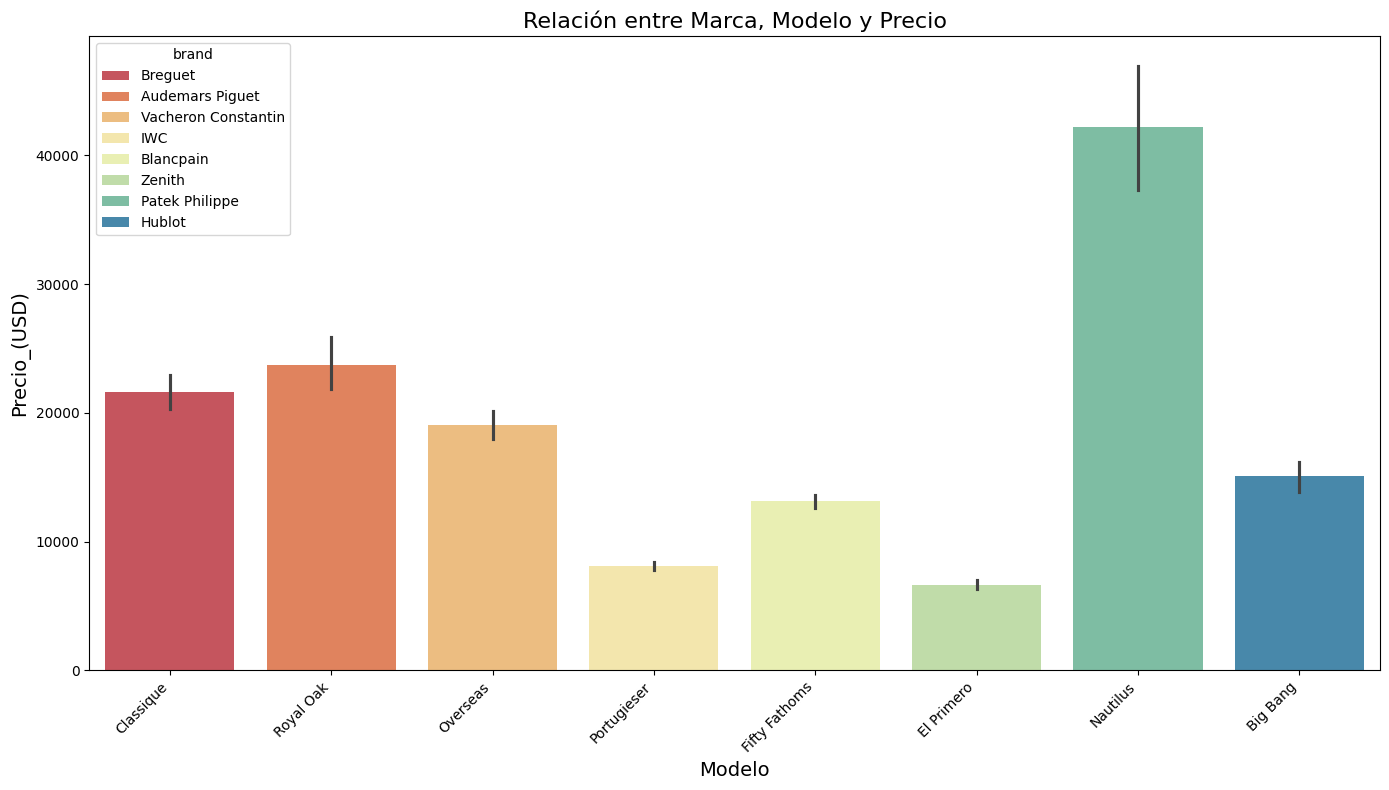

In [30]:

# Filtrar las 10 marcas más frecuentes
top_brands = df['brand'].value_counts().nlargest(10).index

# Filtrar las 10 modelos más frecuentes
top_models = df['model'].value_counts().nlargest(10).index

# Filtrar el DataFrame para quedarnos solo con las 10 marcas y 10 modelos más frecuentes
filtered_df = df[df['brand'].isin(top_brands) & df['model'].isin(top_models)]

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))

# Usamos 'price' (USD) como eje y, 'brand' y 'model' como ejes categóricos
sns.barplot(x='model', y='price_(usd)', hue='brand', data=filtered_df, palette='Spectral')

# Título y etiquetas
plt.title('Relación entre Marca, Modelo y Precio', fontsize=16)
plt.xlabel('Modelo', fontsize=14)
plt.ylabel('Precio_(USD)', fontsize=14)

# Mejorar la legibilidad de los ejes y la leyenda
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

##### Conclusion

Realizamos un análisis multivariante para examinar la relación entre **precio**, **marca** y **modelo**. Este análisis tiene como objetivo identificar qué marcas y modelos tienen un precio más alto y si existe alguna relación significativa entre ellos.

**Métodos utilizados**:
1. Filtramos las 10 marcas más frecuentes y los 10 modelos más populares.
2. Creamos un gráfico de barras donde se muestra la relación entre marca, modelo y precio.

**Conclusiones**:
- **Patek Philippe** es la marca más cara, seguida de **Audemars Piguet**, **Breguet** y **Bacheron Constantin**.
- El **modelo Nautilus** de Patek Philippe es el más caro, seguido por el **Royal Oak** de Audemars Piguet y el **Clásique** de Breguet.
- Los modelos más caros están asociados a marcas de lujo, lo que refuerza la idea de que la marca y el modelo tienen una relación directa con el precio.

Este análisis nos proporciona información valiosa sobre cómo las marcas y los modelos más representativos se distribuyen en relación al precio de los relojes.

##### Relación entre material de la caja, autonomia y precio

<Figure size 1200x800 with 0 Axes>

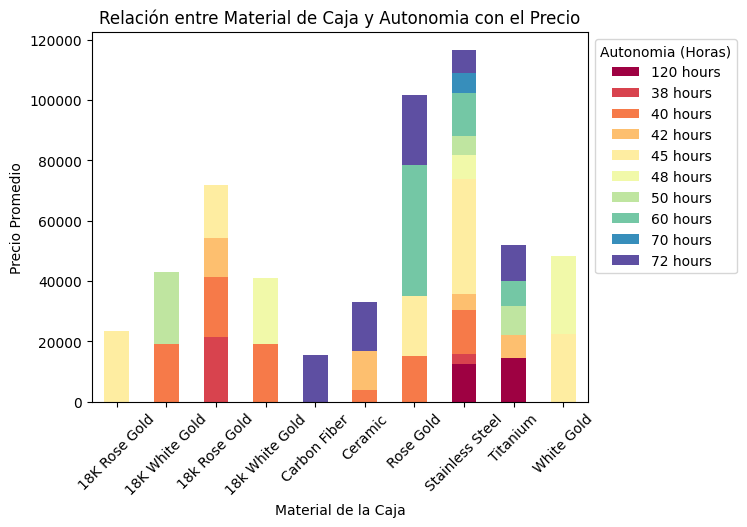

In [31]:
# Filtrar las 10 mmateriales y autonomia  más frecuentes
top_case_materials = df['case_material'].value_counts().nlargest(10).index
top_power_reserve = df['power_reserve'].value_counts().nlargest(10).index

# Filtrar el DataFrame para las 10 categorías más frecuentes
df_filtered = df[df['case_material'].isin(top_case_materials) & df['power_reserve'].isin(top_power_reserve)]

# Agrupar por Material de la Caja y Reserva de Marcha, calculando el precio medio
pivot_table = df_filtered.pivot_table(index='case_material', columns='power_reserve', values='price_(usd)', aggfunc='mean')

# Crear un gráfico de barras apiladas con la paleta 'coolwarm'
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', stacked=True, colormap="Spectral")
plt.title('Relación entre Material de Caja y Autonomia con el Precio')
plt.xlabel('Material de la Caja')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.legend(title='Autonomia (Horas)', bbox_to_anchor=(1, 1))
plt.show()


##### Resumen del analisis
El objetivo es analizar cómo se distribuyen las diferentes autonomías de los relojes según el material de la caja. Esto nos permite observar cómo varían las autonomías dentro de cada material y cómo estas están relacionadas con el precio promedio.

**Gráfico de Barras Apiladas**:  
Hemos utilizado un gráfico de barras apiladas para visualizar de manera clara la distribución de los **materiales de la caja** y la **autonomía del reloj**. Este gráfico nos ayuda a analizar cómo se distribuyen las autonomías dentro de cada material de la caja, permitiéndonos ver las variaciones dentro de cada categoría.

- **Conclusión del gráfico**:  
  La mayoría de los materiales de la caja muestran una distribución limitada de autonomías, con pocos tipos de autonomía asociados a cada material. Sin embargo, **Stainless Steel** (acero inoxidable) se destaca por tener una gran variedad de autonomías. Le siguen **Titanium** (titanio) y **Rose Gold** (oro rosa), que también tienen varias autonomías. El resto de materiales tienden a tener un rango más limitado de autonomías.

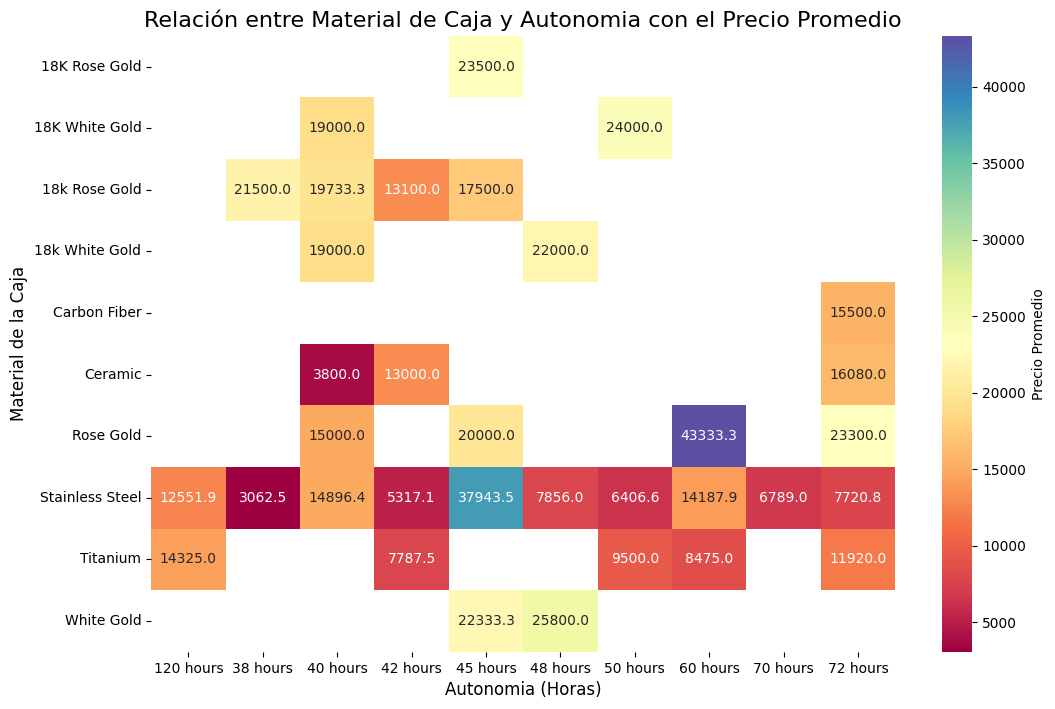

In [32]:
# Filtramos las 10 variables más comunes, según lo que mencionamos anteriormente.
top_materials = df['case_material'].value_counts().head(10).index
top_reserves = df['power_reserve'].value_counts().head(10).index

# Filtramos el DataFrame por estos valores más comunes
df_filtered = df[df['case_material'].isin(top_materials) & df['power_reserve'].isin(top_reserves)]

# Crear la tabla de contingencia
heatmap_data = pd.crosstab(df_filtered['case_material'], df_filtered['power_reserve'], values=df_filtered['price_(usd)'], aggfunc='mean')

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="Spectral", cbar_kws={'label': 'Precio Promedio'}, fmt='.1f')

# Añadir título y etiquetas
plt.title('Relación entre Material de Caja y Autonomia con el Precio Promedio', fontsize=16)
plt.xlabel('Autonomia (Horas)', fontsize=12)
plt.ylabel('Material de la Caja', fontsize=12)

# Mostrar el gráfico
plt.show()

##### Resumen de la relacion de la caja, autonomia y precio **Heatmap**:  
Además, hemos utilizado un **Heatmap** para visualizar la relación entre el **material de la caja** y la **autonomía del reloj**. Este tipo de gráfico es útil para identificar patrones y concentraciones de valores en los datos. Nos permite ver de manera clara las combinaciones más prevalentes de materiales y autonomías.

- **Conclusión del Heatmap**:  
  Al observar el Heatmap, podemos identificar que las combinaciones más prevalentes son **Stainless Steel** con **45 horas de autonomía** y **Rose Gold** con **60 horas de autonomía**. Estas combinaciones se destacan por tener una mayor intensidad de color, lo que indica que son las más comunes en el conjunto de datos.

El análisis muestra que **Stainless Steel** tiene la mayor variedad de autonomías, mientras que otros materiales como **Titanium** y **Rose Gold** también ofrecen una buena variedad, aunque no tan amplia. El **Heatmap** refuerza estas conclusiones, destacando las combinaciones más frecuentes y mostrándonos cómo se distribuyen estas relaciones en el conjunto de datos.

##### Analisis de la relacion de las funcionalidades, la autonomia con el precio

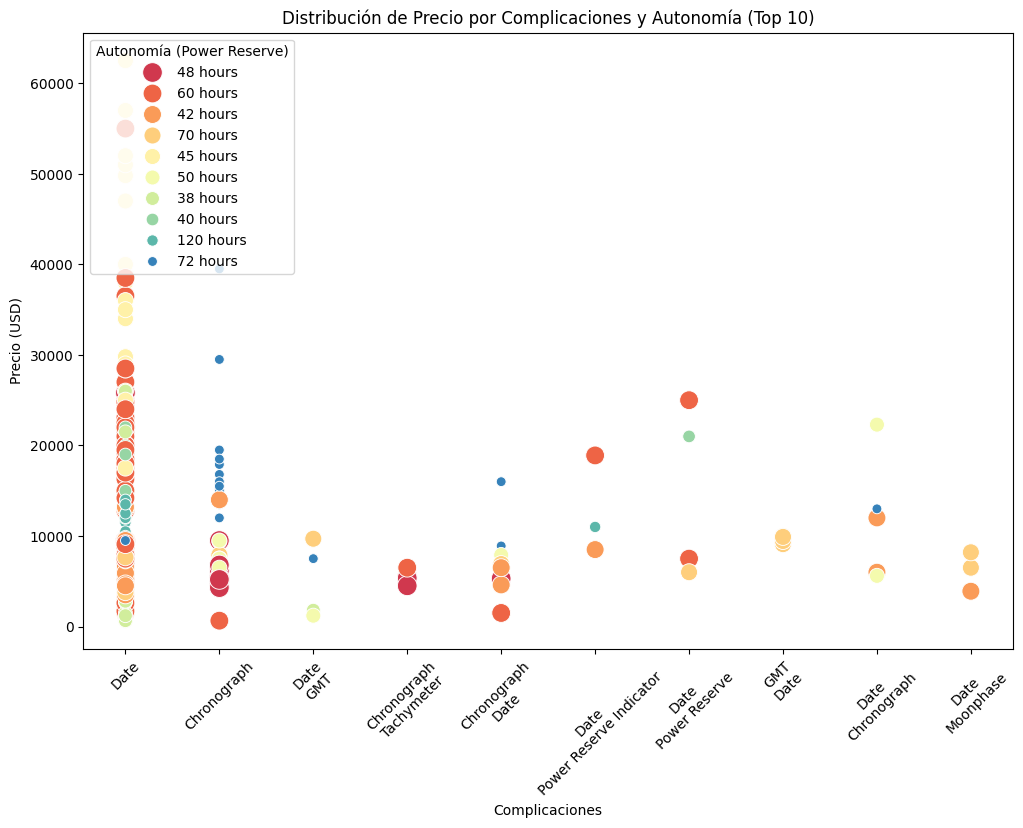

In [33]:
# Filtramos los 10 valores más frecuentes para 'complications' y 'power_reserve'
top_10_complications = df['complications'].value_counts().nlargest(10).index
top_10_power_reserve = df['power_reserve'].value_counts().nlargest(10).index

# Filtramos el DataFrame para mantener solo esos valores
filtered_df = df[df['complications'].isin(top_10_complications) & df['power_reserve'].isin(top_10_power_reserve)]

# Creamos el gráfico de dispersión (scatterplot)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_df, x='complications', y='price_(usd)', hue='power_reserve', size='power_reserve', 
                palette='Spectral', sizes=(50, 200), legend='full')

# Personalizamos el gráfico
plt.title('Distribución de Precio por Complicaciones y Autonomía (Top 10)')
plt.xlabel('Complicaciones')
plt.ylabel('Precio (USD)')

# Ajuste de las etiquetas del eje Y para que se dividan en varias líneas
labels = plt.gca().get_xticklabels()
new_labels = []

for label in labels:
    # Si hay una coma, separa los elementos y los coloca en líneas diferentes
    new_label = label.get_text().replace(", ", "\n")
    new_labels.append(new_label)

# Asignamos las nuevas etiquetas formateadas
plt.gca().set_xticklabels(new_labels, rotation=45)

# Leyenda
plt.legend(title='Autonomía (Power Reserve)', loc='upper left')

plt.show()

##### Análisis de la Distribución de Precio por Funcionalidades y Autonomía

Hemos utilizado un **scatterplot** para visualizar la relación entre el precio de los relojes, sus funcionalidades y la autonomía de la reserva de marcha. Aunque este gráfico no es el más ideal para visualizar relaciones complejas entre múltiples variables, nos permite obtener una visión general de las tendencias de los datos. A partir de este análisis, podemos extraer algunas conclusiones relevantes sobre las combinaciones de funcionalidades y autonomía.

- **DATE y CHRONOGRAPH**: Estas funcionalidades son bastante comunes y se distribuyen por todas las horas de autonomía.
- **DATE-GMT**: Esta combinación aparece con frecuencia y está asociada con **70 horas** de autonomía.
- **CHRONOGRAPH-TACHYMETER**: Tiene una autonomía de **60 horas**.
- **RESERVE-INDICATOR y DATE-POWER-RESERVE**: Estas combinaciones tienen autonomías de entre **60** y **42 horas**.

Esto nos lleva a la conclusión de que, en general, las autonomías más comunes se encuentran entre **38 y 42 horas**, como se había observado previamente en el análisis de autonomía.

##### Identificación de Redundancias y Agrupación de Funcionalidades

También hemos notado que algunas funcionalidades están duplicadas o expresadas de manera ligeramente diferente, como es el caso de "Chronograph Date" y "Date Chronograph", que deberían agruparse bajo una misma categoría. Para solucionar esto, se propone crear una nueva columna en el DataFrame que unifique estas funcionalidades bajo un único nombre para cada tipo, lo que reducirá los valores únicos de la columna **funcionalidades**.

### 1.5 Conclusiones del Análisis Categórico y Numérico


Durante el análisis de las variables categóricas y numéricas, hemos observado que varias características impactan significativamente en el precio de los relojes. En cuanto a las variables numéricas, encontramos que las correlaciones más fuertes con el precio provienen de `case_thickness`, `band_width` y `case_diameter`, aunque estas son de intensidad moderada. A pesar de que las características físicas como el grosor de la caja o el ancho de la correa parecen relevantes, no influyen de manera decisiva en la variabilidad del precio. Esto se ve reflejado en la correlación negativa con el precio, sugiriendo que características más grandes no necesariamente indican relojes más caros.

En el análisis categórico, las variables más influyentes en el precio son `marca`, `modelo`, `autonomía`, `funcionalidades` y `material`. De estas, `marca` y `modelo` tienen la mayor cardinalidad y por lo tanto son claves en la predicción del precio. A través del test de Kruskal-Wallis confirmamos que `marca` y `modelo` presentan una fuerte relación con el precio, mientras que otras variables, como `autonomía` y `funcionalidades`, tienen un impacto menos directo. Además, hemos detectado combinaciones duplicadas en `funcionalidades`, como `chronograph date` y `date chronograph`, que podrían generar redundancia si no se gestionan adecuadamente.

Es relevante señalar que ya empiezan a aparecer indicios de la existencia de modelos exclusivos, los cuales podrían estar vinculados a marcas y modelos de alto precio. Aunque esta exclusividad es una variable cualitativa, podría no estar directamente relacionada con atributos físicos como materiales o dimensiones, pero sí con la marca y los modelos más caros, que podrían considerarse como outliers. Estos outliers, aunque importantes, pueden complicar la predicción precisa del precio de los modelos.

Con respecto a las variables que podríamos eliminar, `power_reserve_numeric` y `water_resistance_numeric` muestran bajas correlaciones con el precio, lo que sugiere que no aportan mucho valor predictivo al modelo. También, algunas funcionalidades, como las combinaciones duplicadas, deberían ser tratadas o eliminadas para evitar redundancias.

En resumen, para optimizar el modelo, será necesario transformar y agrupar adecuadamente las variables `autonomía` y `funcionalidades`, y manejar correctamente los outliers relacionados con la exclusividad de las marcas y modelos. Además, debemos realizar una codificación adecuada de `marca`, `modelo`, `autonomía` y `funcionalidades` para mejorar la capacidad predictiva y obtener un modelo más robusto.


## 2️ Exploración y Preprocesamiento de Datos 

In [34]:
df_origin=df.copy() # copia de seguridad posteriormente la usaremos, son datos sin procesar

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 506
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     506 non-null    object 
 1   model                     506 non-null    object 
 2   case_material             506 non-null    object 
 3   strap_material            506 non-null    object 
 4   movement_type             506 non-null    object 
 5   water_resistance          506 non-null    object 
 6   case_diameter_(mm)        506 non-null    float64
 7   case_thickness_(mm)       506 non-null    float64
 8   band_width_(mm)           506 non-null    float64
 9   dial_color                506 non-null    object 
 10  crystal_material          506 non-null    object 
 11  complications             506 non-null    object 
 12  power_reserve             506 non-null    object 
 13  price_(usd)               506 non-null    int64  
 14  water_resistanc

### 2.1 ANÁLISI VALORES ÚNICOS

Hemos decidido analizar los valores únicos para ver como tratar los datos, de est manera vemos que brnad y model tienen muchos valores unios, por lo que optamos a crear una nueva variable a la que llamaremos cluster que nos ayude a grupar las variables de model y brand con sentido, ademas viendo las distribucion de los datos de target, nos puede ser muy util para hacer modelos separados de regresion para la cola del target.

In [36]:
# Seleccionar solo las variables categóricas
categorical_vars = df.select_dtypes(include=['object', 'category'])

# Contar los valores únicos de cada variable categórica
unique_counts = categorical_vars.nunique().reset_index()
unique_counts.columns = ['Variable', 'Valores Únicos']

# Mostrar la tabla ordenada por número de valores únicos (de mayor a menor)
unique_counts = unique_counts.sort_values(by='Valores Únicos', ascending=False)

# Mostrar la tabla
print(unique_counts)

           Variable  Valores Únicos
1             model              95
0             brand              39
8     complications              29
9     power_reserve              24
2     case_material              17
3    strap_material              14
5  water_resistance              12
6        dial_color               7
4     movement_type               4
7  crystal_material               4


### 2.2 CLUSTERING

Como no sabemos el número de clusters de partida vamos a realizr un dendogramos y junto con la ayuda de la distribución del target no podremos hacer una idea, también visualizaremos con un aglomeratico con una varibles aparentement importante

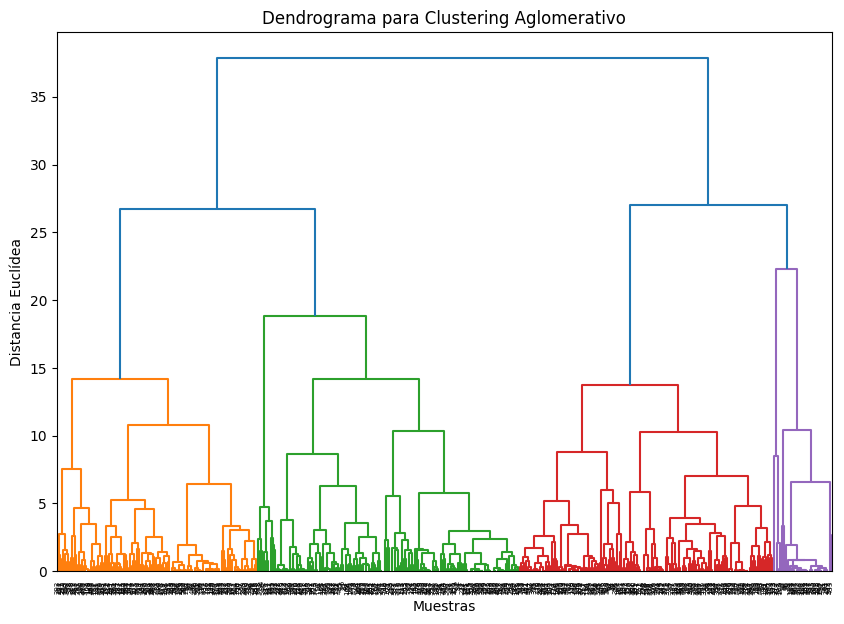

cluster
0     38
1    171
2    166
3    131
dtype: int64


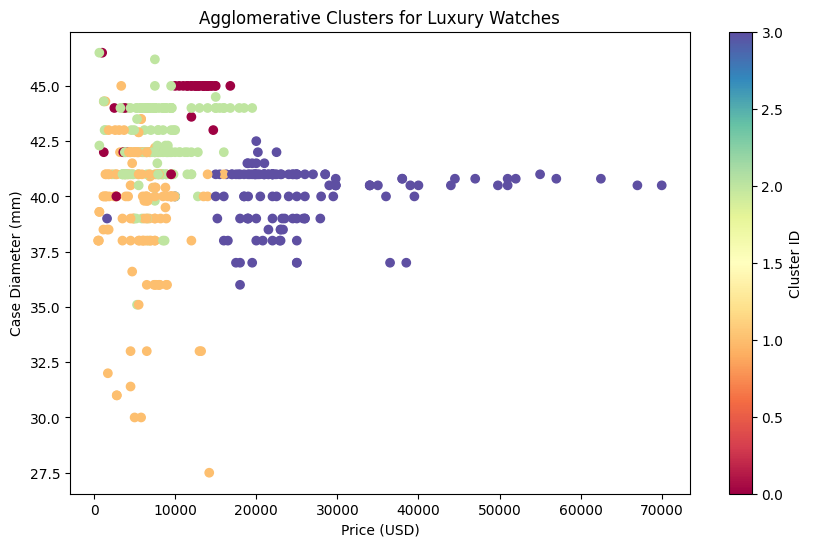

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.select_dtypes(include=['number']))  # Solo variables numéricas

# Crear un dendrograma para determinar el número óptimo de clusters
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.title("Dendrograma para Clustering Aglomerativo")
plt.xlabel("Muestras")
plt.ylabel("Distancia Euclídea")
plt.show()

# Definir el número de clusters a usar
n_clusters = 4  # Cambia esto dependiendo del dendrograma

# Aplicar Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=n_clusters)
df['cluster'] = agg_clust.fit_predict(scaled_features)

# Revisar el número de muestras por cluster
print(df.groupby('cluster').size())

# Visualizar los clusters en un gráfico (ejemplo: Price vs Case Diameter)
plt.figure(figsize=(10, 6))
plt.scatter(df['price_(usd)'], df['case_diameter_(mm)'], c=df['cluster'], cmap='Spectral')
plt.xlabel('Price (USD)')
plt.ylabel('Case Diameter (mm)')
plt.title('Agglomerative Clusters for Luxury Watches')
plt.colorbar(label='Cluster ID')
plt.show()


In [38]:

# Seleccionar las características numéricas
numerical_features = ['price_(usd)', 'case_diameter_(mm)', 'case_thickness_(mm)', 'band_width_(mm)','power_reserve_numeric', 'water_resistance_numeric']

# Escalar las características numéricas
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_features])

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(df[numerical_features])
# Ver cuántos relojes hay en cada cluster
print(df['cluster'].value_counts().sort_index())

cluster
0    171
1     23
2    101
3     12
4    199
Name: count, dtype: int64


In [39]:
cluster_summary = df.groupby('cluster')[['price_(usd)', 'case_diameter_(mm)', 'water_resistance_numeric', 'power_reserve_numeric']].mean()
cluster_summary

,price_(usd),case_diameter_(mm),water_resistance_numeric,power_reserve_numeric
cluster,,,,
0,9924.561404,41.743275,131.578947,69.204678
1,33047.826087,40.147826,95.217391,52.782609
2,20782.178218,40.376238,66.930693,55.871287
3,54233.333333,40.691667,114.166667,49.000000
4,4557.688442,40.907538,146.231156,53.824121


Aunque aparentemente salen 4, vamos a hacerlo de 5 ya que todos contienen un numero de valores mayor a diez y perderemos menos información

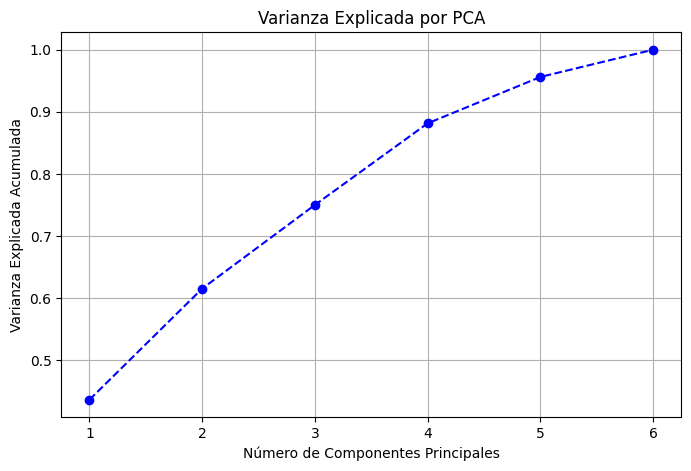

🔹 Número óptimo de componentes principales: 5


In [40]:

#   Seleccionar solo las variables numéricas relevantes
numeric_features = ['price_(usd)', 'case_diameter_(mm)', 'case_thickness_(mm)', 'band_width_(mm)','power_reserve_numeric', 'water_resistance_numeric']
df_numeric = df[numeric_features]

#   Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

#   Aplicar PCA
pca = PCA(n_components=len(numeric_features))  # Número máximo de componentes = número de variables numéricas
df_pca = pca.fit_transform(df_scaled)

#   Visualizar la varianza explicada
explained_variance = np.cumsum(pca.explained_variance_ratio_)  # Varianza acumulada

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(numeric_features) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por PCA')
plt.grid()
plt.show()

#  Elegir cuántos componentes usar (95% de varianza)
n_components_optimo = np.argmax(explained_variance >= 0.95) + 1  # Primer índice donde la varianza acumulada ≥ 95%

print(f"🔹 Número óptimo de componentes principales: {n_components_optimo}")


El número optimo de componentes principales seria 5 por que con ello explicamos el 95% de la varianza explicada, podriamos eliminar una variable numerica.

### 2.3 TRANSFORMACIONES

Vamos a comenzar a hacer mapeos para agrupar aquellas variables con mas valores unicos de 7, por un lado tenemos 4 variables que mapeamos de la misma manera, segun sus frecuencias del analisis categorico mostraban que 3 o 4 categorias representaban esas variables, por lo que el resto de categorias la agrupamos en 'otros'.
Por otro lado, tenemos brand y model que las agruparemos por cluster convirtiendolas a numericas directamente. Antes haremos una copia de este df por si queremos usar el df sin esa agrupacion, pero si con el resto de transformaciones hechas. 

In [41]:


# Lista de variables que queremos analizar
variables_a_mapear = ['dial_color', 'movement_type', 'crystal_material']

# Crear un DataFrame con los valores únicos y su cantidad
unique_values = {var: df[var].unique() for var in variables_a_mapear}
num_unique = {var: len(df[var].unique()) for var in variables_a_mapear}

# Convertir en DataFrame para mejor visualización
summary_df = pd.DataFrame({'Valores Únicos': num_unique, 'Categorías': unique_values})

# Mostrar la tabla
summary_df


,Valores Únicos,Categorías
dial_color,7,"[Black, Blue, White, Silver, Ivory, Champagne,..."
movement_type,4,"[Automatic, Quartz, Manual, Eco-Drive]"
crystal_material,4,"[Sapphire, Mineral, Hesalite, Hardlex]"


In [42]:
# Mapeo de StrapMaterial
strap_mapping = {
    "Leather": "Leather",
    "Stainless Steel": "Stainless Steel",
    "Rubber": "Rubber"
}
df["strap_material"] = df["strap_material"].map(strap_mapping).fillna("Other")

# Mapeo de DialColor
dial_mapping = {
    "Black": "Black",
    "Blue": "Blue",
    "White": "White"
}
df["dial_color"] = df["dial_color"].map(dial_mapping).fillna("Other")

# Verificación de cambios
print("Distribución de Strap_Material después del mapeo:")
print(df["strap_material"].value_counts())

print("\nDistribución de DialColor después del mapeo:")
print(df["dial_color"].value_counts())

Distribución de Strap_Material después del mapeo:
strap_material
Leather            224
Stainless Steel    166
Rubber              73
Other               43
Name: count, dtype: int64

Distribución de DialColor después del mapeo:
dial_color
Black    216
Blue     136
Other    121
White     33
Name: count, dtype: int64


In [43]:
# Función para clasificar complications
def categorize_complications(value):
    value = str(value).lower()  # Convertir a string y minúsculas para evitar problemas de formato
    has_date = "date" in value
    has_chronograph = "chronograph" in value

    if has_date and has_chronograph:
        return "Mix"
    elif has_date:
        return "Date"
    elif has_chronograph:
        return "Chronograph"
    else:
        return "Other"

# Aplicar la función a la columna complications
df["complications_group"] = df["complications"].apply(categorize_complications)

# Ver distribución
print(df["complications_group"].value_counts())


complications_group
Date           391
Chronograph     86
Mix             22
Other            7
Name: count, dtype: int64


In [44]:

# Función para clasificar case_material
def categorize_case_material(value):
    value = str(value).lower()  # Convertimos a minúsculas para evitar diferencias de formato

    if "steel" in value:
        return "Steel"
    elif "titanium" in value:
        return "Titanium"
    elif "gold" in value:
        return "Gold"
    else:
        return "Other"  # Para cerámica, platino, carbono, etc.

# Aplicar la función a la columna case_material
df["case_material_group"] = df["case_material"].apply(categorize_case_material)

# Ver distribución
print(df["case_material_group"].value_counts())

case_material_group
Steel       405
Gold         51
Titanium     37
Other        13
Name: count, dtype: int64


In [45]:
df_clusters=df.copy()

In [46]:
# Agrupar Brand por Cluster más frecuente
brand_mapping_cluster = df.groupby("brand")["cluster"].apply(lambda x: x.mode()[0])  # Modificando por cluster
df["brand_group_cluster"] = df["brand"].map(brand_mapping_cluster)

# Agrupar Model por Cluster más frecuente
model_mapping_cluster = df.groupby("model")["cluster"].apply(lambda x: x.mode()[0])  # Modificando por cluster
df["model_group_cluster"] = df["model"].map(model_mapping_cluster)

# Verificar los cambios
print("Distribución de brand_group_cluster:")
print(df["brand_group_cluster"].value_counts())

print("\nDistribución de model_group_cluster:")
print(df["model_group_cluster"].value_counts())

Distribución de brand_group_cluster:
brand_group_cluster
4    190
0    185
2     98
1     33
Name: count, dtype: int64

Distribución de model_group_cluster:
model_group_cluster
0    193
4    183
2    101
1     29
Name: count, dtype: int64


In [47]:
df

,brand,model,case_material,strap_material,movement_type,water_resistance,case_diameter_(mm),case_thickness_(mm),band_width_(mm),dial_color,...,complications,power_reserve,price_(usd),water_resistance_numeric,power_reserve_numeric,cluster,complications_group,case_material_group,brand_group_cluster,model_group_cluster
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.0,13.00,20.0,Black,...,Date,48 hours,9500,300.0,48.0,0,Date,Steel,0,0
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.5,14.47,21.0,Blue,...,Date,60 hours,5800,600.0,60.0,4,Date,Titanium,4,4
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100 meters,41.0,13.00,20.0,White,...,Chronograph,42 hours,4200,100.0,42.0,4,Chronograph,Steel,4,4
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30 meters,43.0,14.25,22.0,Black,...,Chronograph,70 hours,7900,30.0,70.0,0,Chronograph,Steel,4,0
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30 meters,31.0,6.05,20.0,Other,...,Date,60 hours,2800,30.0,60.0,4,Date,Steel,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Breguet,Classique,18k Rose Gold,Leather,Automatic,30 meters,38.5,8.25,20.0,White,...,Date,38 hours,21500,30.0,38.0,2,Date,Gold,2,2
503,Blancpain,Fifty Fathoms,Stainless Steel,Other,Automatic,300 meters,45.0,15.50,23.0,Black,...,Date,120 hours,13500,300.0,120.0,0,Date,Steel,0,0
504,Longines,Master Collection,Stainless Steel,Leather,Automatic,30 meters,38.5,9.70,20.0,Blue,...,Date,64 hours,1800,30.0,64.0,4,Date,Steel,4,4
505,Vacheron Constantin,Overseas,Stainless Steel,Stainless Steel,Automatic,150 meters,41.5,11.00,22.0,Blue,...,Date,40 hours,19000,150.0,40.0,2,Date,Steel,2,2


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 506
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     506 non-null    object 
 1   model                     506 non-null    object 
 2   case_material             506 non-null    object 
 3   strap_material            506 non-null    object 
 4   movement_type             506 non-null    object 
 5   water_resistance          506 non-null    object 
 6   case_diameter_(mm)        506 non-null    float64
 7   case_thickness_(mm)       506 non-null    float64
 8   band_width_(mm)           506 non-null    float64
 9   dial_color                506 non-null    object 
 10  crystal_material          506 non-null    object 
 11  complications             506 non-null    object 
 12  power_reserve             506 non-null    object 
 13  price_(usd)               506 non-null    int64  
 14  water_resistanc

Examinamos de nuevo nuestros datos para proceder a eliminar las variables que no necesitamos y que estan duplicadas, antes de hacer el split

In [49]:
df_agrupado=df.copy()

In [50]:
# Eliminamos las columnas 'water_resistance' y 'power_reserve' del DataFrame
df.drop(columns=['water_resistance', 'power_reserve','brand', 'model', 'case_material','complications'], inplace=True)


In [51]:
df.columns

Index(['strap_material', 'movement_type', 'case_diameter_(mm)',
       'case_thickness_(mm)', 'band_width_(mm)', 'dial_color',
       'crystal_material', 'price_(usd)', 'water_resistance_numeric',
       'power_reserve_numeric', 'cluster', 'complications_group',
       'case_material_group', 'brand_group_cluster', 'model_group_cluster'],
      dtype='object')

### 2.4 SEPARACION TRAIN Y TEST

In [52]:
# Separar el target (target es 'price_(usd)')
X = df.drop(columns=['price_(usd)'])  # Variables predictoras
y = df['price_(usd)']  # Variable objetivo (escala logarítmica)

In [53]:
# Dividir los datos en entrenamiento y prueba (80% train, 20% test)
'''X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)'''
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42) 

In [54]:


# Definir la ruta a la carpeta 'data_sample'
path_to_save = '../data_sample/'

# Asegurarse de que la carpeta 'data_sample' exista
if not os.path.exists(path_to_save):
    os.makedirs(path_to_save)

# Guardar los sets de entrenamiento y prueba en la carpeta 'data_sample'
train_set.to_csv(os.path.join(path_to_save, "clusterreg_train.csv"), index=False)
test_set.to_csv(os.path.join(path_to_save, "clusterreg_test.csv"), index=False)


In [55]:


X_train = train_set.copy()
X_train = train_set.drop(target, axis = 1)

y_train = train_set['price_(usd)']

X_test = test_set.copy()
X_test = test_set.drop(target, axis = 1)

y_test = test_set['price_(usd)']



### 2.5 PREPROCESAMIENTO PIPELINE

 
Se ha diseñado un **pipeline de preprocesamiento** para transformar variables categóricas y numéricas:  

1. **Categóricas:**  
   - Se imputan valores faltantes con la estrategia **"most_frequent"**.  
   - Se aplica **One-Hot Encoding** ignorando valores desconocidos.  

2. **Numéricas:**  
   - Se dividen en dos grupos:  
     - Variables con **distribución sesgada**: Se aplica una **transformación logarítmica**.  
     - Variables sin sesgo: Se mantienen sin transformación.  
   - A todas se les aplica **StandardScaling** para normalización.  

3. **Integración:**  
   - Se combinan las transformaciones en un **ColumnTransformer** dentro del **pipeline final**.  

**Automatización** del preprocesamiento, evitando fugas de datos.  
**Escalado adecuado** que mejora el rendimiento de modelos sensibles a magnitudes.  
**Codificación One-Hot** para representar correctamente variables categóricas en numericas lo que mejorar la interpretacion por el modelo



In [56]:

# Variables categóricas a transformar
categorical_columns = ['strap_material', 'movement_type', 'dial_color',
       'crystal_material', 'complications_group', 'case_material_group']  # Añadir las categóricas que hayas seleccionado

# Pipeline para variables categóricas
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Rellenar los valores faltantes con el más frecuente
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))  # Codificación OneHot
])


In [57]:

# Variables numéricas a transformar
numerical_columns = ['case_diameter_(mm)', 'band_width_(mm)', 'case_thickness_(mm)','water_resistance_numeric', 'power_reserve_numeric','brand_group_cluster',
       'model_group_cluster','cluster']  # Ajusta según tus variables


def log_transform(x):
    return np.log1p(x)  # Usamos log1p para evitar log(0)

# Las variables que aplicarían el logaritmo
log_transform_columns = ['water_resistance_numeric', 'power_reserve_numeric']  # Ajusta según las variables sesgadas

# Dividir las variables numéricas en log-transformadas y no transformadas
numerical_columns_log = [col for col in numerical_columns if col in log_transform_columns]
numerical_columns_no_log = [col for col in numerical_columns if col not in log_transform_columns]

# Pipeline para las variables numéricas (log-transformed)
numerical_pipeline_log = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes con la media
    ('log_transform', FunctionTransformer(log_transform, validate=False)),  # Aplicar logaritmo solo a las variables sesgadas
    ('scaler', MinMaxScaler())  # Escalar las variables numéricas
])

# Pipeline para las variables numéricas sin log
numerical_pipeline_no_log = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes con la media
    ('scaler', MinMaxScaler())  # Escalar las variables numéricas

])


In [58]:


# Crear el ColumnTransformer para aplicar las transformaciones a las columnas categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num_log', numerical_pipeline_log, numerical_columns_log),  # Aplicar log a las variables sesgadas
        ('num_no_log', numerical_pipeline_no_log, numerical_columns_no_log),
        ('cat', categorical_pipeline, categorical_columns)
    ], remainder = 'drop')

# Crear el pipeline final
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Ajustar el pipeline a los datos de entrenamiento
pipeline.fit(X_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_log',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<function log_transform at 0x000001B8147F7BA0>)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['water_resistance_numeric',
                                                   'power_reserve_numeric']),
                                                 ('num_no_log',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('s...
                                                   'band_width_(mm)',
                                                   'case_thickness_(mm)',
                                                   'brand_group_cluster',
                                                   'model_group_cluster',
                                                   'cluster']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['strap_material',
                                                   'movement_type',
                                                   'dial_color',
                                                   'crystal_material',
                                                   'complications_group',
                                                   'case_material_group'])]))])

In [59]:
X_train_transformed = pipeline.transform(X_train)  # Aplicamos el preprocesamiento a los datos de entrenamiento
X_test_transformed = pipeline.transform(X_test)    # Aplicamos el mismo preprocesamiento a los datos de test


In [60]:

# Definir la ruta a la carpeta 'Models' dentro de 'SRC'
models_dir = os.path.join('..', 'Models')  # '..' retrocede una carpeta hacia 'SRC'

# Asegurarte de que la carpeta 'Models' existe
os.makedirs(models_dir, exist_ok=True)

# Guardar el pipeline en el archivo dentro de 'Models'
joblib.dump(pipeline, os.path.join(models_dir, 'pipeline_preprocesamiento.joblib'))

['..\\Models\\pipeline_preprocesamiento.joblib']

## 3. ENTRENAMIENTO DE MODELOS DE REGRESION

### 3.1 EVALUACIÓN DE LOS MODELOS CON VALIDACION CRUZADA Y SELECCION


Tras haber construido nuestro pipeline y transformado los datos, el siguiente paso es evaluar distintos modelos de regresión para predecir el precio de los relojes de lujo. Para ello, utilizamos **validación cruzada**, que nos permite medir el rendimiento de cada modelo sin depender demasiado de un solo conjunto de datos, reduciendo el riesgo de overfitting o underfitting.  

Hemos seleccionado los siguientes modelos por sus características y capacidades específicas:  

- **Regresión Lineal**: Punto de partida para evaluar relaciones lineales entre las variables.  
- **Ridge Regression**: Variante de la regresión lineal que reduce la multicolinealidad mediante regularización L2.  
- **Lasso Regression**: Similar a Ridge, pero con regularización L1, lo que ayuda a seleccionar características eliminando las menos relevantes.  
- **ElasticNet**: Combinación de Ridge y Lasso, equilibrando la regularización L1 y L2.  
- **Random Forest**: Modelo basado en árboles que maneja relaciones no lineales y es robusto ante valores atípicos.  
- **Gradient Boosting**: Modelo ensamblado basado en boosting que optimiza predicciones mediante aprendizaje secuencial.  
- **XGBoost**: Variante optimizada de Gradient Boosting con mejoras en velocidad y manejo de sobreajuste.  
- **LightGBM**: Similar a XGBoost, pero más eficiente con grandes volúmenes de datos.  
- **CatBoost**: Especializado en datos categóricos, lo que puede ser útil en nuestro conjunto de datos.  
- **SVR (Support Vector Regression)**: Busca maximizar el margen de predicción, útil cuando hay relaciones complejas en los datos.  
- **MLP Regressor (Redes Neuronales)**: Puede capturar patrones complejos mediante capas ocultas, aunque requiere más datos y ajustes.  

Una vez entrenados estos modelos con validación cruzada, analizamos sus métricas de error (RMSE) para identificar cuál ofrece la mejor capacidad predictiva y tomar decisiones sobre posibles ajustes.  


In [61]:


# Diccionario de modelos
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0),
    'LightGBM': lgb.LGBMRegressor(random_state=42, verbose=-1),
    'CatBoost': cb.CatBoostRegressor(verbose=0, random_state=42),
    'SVR': SVR(),
    'MLP Regressor': MLPRegressor(random_state=42, max_iter=1000)
}

# Evaluación con validación cruzada
cv_results = {}

for name, model in models.items():
    try:
        score = np.mean(-cross_val_score(model, X_train_transformed, y_train, cv=5, scoring='neg_root_mean_squared_error'))
        cv_results[name] = score
        print(f"{name}: RMSE {score:.2f}")
    except Exception as e:
        cv_results[name] = None
        print(f"⚠️ Error en {name}: {e}")

# Ordenar los resultados de menor a mayor RMSE
cv_results_sorted = sorted(cv_results.items(), key=lambda x: x[1] if x[1] is not None else float('inf'))

# Mostrar resultados
print("\n🔹 Resultados de validación cruzada (ordenados por RMSE):")
for name, score in cv_results_sorted:
    print(f"{name}: RMSE {score:.2f}" if score is not None else f"{name}: ❌ Error")


Linear Regression: RMSE 7164.08
Ridge: RMSE 7127.44
Lasso: RMSE 7119.19
ElasticNet: RMSE 9203.29
Random Forest: RMSE 2599.16
Gradient Boosting: RMSE 2660.16
⚠️ Error en XGBoost: 'super' object has no attribute '__sklearn_tags__'
LightGBM: RMSE 2876.58
CatBoost: RMSE 2881.87
SVR: RMSE 11086.62
MLP Regressor: RMSE 13429.61

🔹 Resultados de validación cruzada (ordenados por RMSE):
Random Forest: RMSE 2599.16
Gradient Boosting: RMSE 2660.16
LightGBM: RMSE 2876.58
CatBoost: RMSE 2881.87
Lasso: RMSE 7119.19
Ridge: RMSE 7127.44
Linear Regression: RMSE 7164.08
ElasticNet: RMSE 9203.29
SVR: RMSE 11086.62
MLP Regressor: RMSE 13429.61
XGBoost: ❌ Error


##### Evaluación del resultado del modelo


Se han probado varios modelos de **Machine Learning** y evaluado su desempeño utilizando **RMSE**. A continuación, se presentan los resultados:  

**Modelos probados**: 

  - Mejores resultados:  
  - **Gradient Boosting (RMSE: 2599)** → Captura relaciones no lineales y ofrece un buen balance entre sesgo y varianza.  
  - **Random Forest (RMSE: 2660)** → Modelo robusto y estable, pero puede ser más costoso computacionalmente.  

  - Modelos con rendimiento moderado:  
  - **Ridge y Lasso** → La regularización ha sido efectiva, posiblemente debido a **multicolinealidad** en los datos.  
  - **XGBoost** → No logró superar a Gradient Boosting, posiblemente por hiperparámetros no optimizados o sobreajuste.  
  - **LightGBM y CatBoost** → No lograron un rendimiento competitivo, sugiriendo que estos modelos pueden necesitar mayor ajuste.  

  - Modelos con desempeño más bajo:  
  - **ElasticNet y SVR** → RMSE más alto, indicando que no logran capturar bien la variabilidad de los datos.  
  - **MLP Regressor** → Mostró el peor desempeño, posiblemente debido a la falta de optimización o necesidad de más datos para entrenamiento.  

##### Conclusión  
Gradient Boosting ha sido el modelo más efectivo, seguido de cerca por Random Forest. Los modelos lineales han demostrado que la regularización es clave en este dataset. Modelos más avanzados como XGBoost o CatBoost pueden requerir **ajustes más finos** para mejorar su desempeño.  



### 3.2 ENTRENAMIENTO DE MEJORES MODELOS

##### Entrenamiento y optimizacion de Random Forest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Crear el pipeline final con el modelo
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Transformaciones en X
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))  # Modelo
])

# Entrenar el modelo con los datos transformados y la variable target escalada
pipeline_rf.fit(X_train, y_train)  # Convertir a 1D con ravel()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_log',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<function log_transform at 0x000001B8147F7BA0>)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['water_resistance_numeric',
                                                   'power_reserve_numeric']),
                                                 ('num_no_log',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('s...
                                                   'brand_group_cluster',
                                                   'model_group_cluster',
                                                   'cluster']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['strap_material',
                                                   'movement_type',
                                                   'dial_color',
                                                   'crystal_material',
                                                   'complications_group',
                                                   'case_material_group'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [63]:
# Hacer predicciones en X_test
y_pred = pipeline_rf.predict(X_test)



# Evaluación con RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")


RMSE: 2553.92


In [64]:

# Probamos a entrenar el modelo de Random Forest 

pipeline_with_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])# Definir los hiperparámetros dentro del pipeline
param_dist = {
    'model__n_estimators': [50, 100, 200],  # 'model__' indica que los hiperparámetros pertenecen al modelo
    'model__max_depth': [10, 20, 30, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__bootstrap': [True, False]
}

# RandomizedSearchCV con pipeline
random_search = RandomizedSearchCV(
    estimator=pipeline_with_model,  # El pipeline con preprocesamiento y modelo
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Ejecutar la búsqueda de hiperparámetros
random_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_rf = random_search.best_estimator_
print("Mejores hiperparámetros:", random_search.best_params_)
print("Mejor RMSE:", -random_search.best_score_)




Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores hiperparámetros: {'model__n_estimators': 50, 'model__min_samples_split': 10, 'model__min_samples_leaf': 2, 'model__max_depth': 10, 'model__bootstrap': True}
Mejor RMSE: 2373.784011079426


In [65]:
y_pred=best_rf.predict(X_test)

In [66]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
mae_rf = np.sqrt(mean_absolute_error(y_test, y_pred))
r2_rf = r2_score(y_test, y_pred)

print(f"Random Forest - RMSE: {rmse_rf}")
print(f"Random Forest - MAE: {mae_rf}")
print(f"Random Forest - R2: {r2_rf}")

Random Forest - RMSE: 2507.008697832484
Random Forest - MAE: 40.17712942751676
Random Forest - R2: 0.9263082453308087


In [67]:

# Crear la carpeta Models si no existe
models_dir = "../Models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Guardar el pipeline completo con el modelo Random Forest en la carpeta Models
joblib.dump(best_rf, os.path.join(models_dir, "random_forest_model.joblib"))

print("Modelo guardado en ../Models/random_forest_model.joblib")


Modelo guardado en ../Models/random_forest_model.joblib


##### Conclusiones Random Forest

Hemos conseguido bajar la métrica RMSE de la métrica incial sin mejorarlo notoriamente, aun haber usado los mejores parametros, por ello vamos a analizar las features importance para ver que puede estar influyendo en el modelo. Posteriormente, vamos a poder ver que el peso lo tienen las variable cluster 

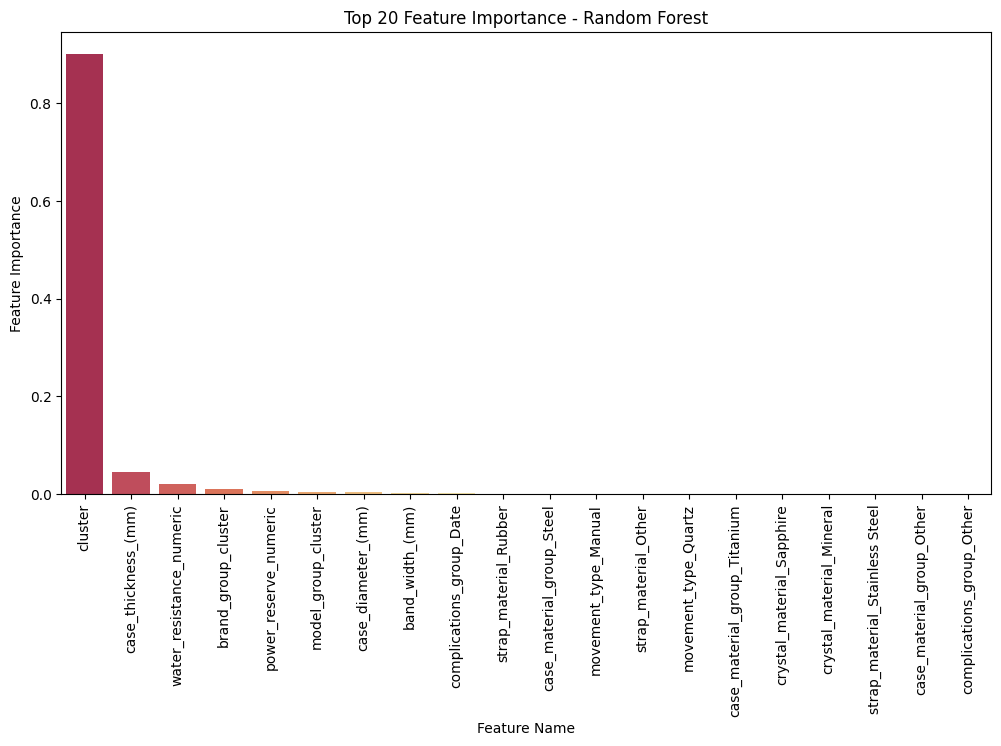

In [68]:
# Obtener los nombres de las características del preprocesador
feature_names = []
try:
    feature_names = best_rf.named_steps['preprocessor'].get_feature_names_out()
except AttributeError:
    num_features = numerical_columns_log + numerical_columns_no_log  # Variables numéricas
    cat_features = best_rf.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out().tolist()  # Variables categóricas
    feature_names = num_features + cat_features  # Combinamos

# Extraer importancia de características del modelo Random Forest
feature_importances_rf = best_rf.named_steps['model'].feature_importances_

# Crear DataFrame y ordenar por importancia
importance_df_rf = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_rf})
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False).head(20)  # Top 20

# Crear el gráfico con la paleta "Spectral"
plt.figure(figsize=(12, 6))
colors = sns.color_palette("Spectral", len(importance_df_rf))  # Generar colores con Spectral
sns.barplot(x=importance_df_rf['Feature'], y=importance_df_rf['Importance'], palette=colors)

# Ajustes del gráfico
plt.xticks(rotation=90)  # Rotar etiquetas para que se lean bien
plt.ylabel('Feature Importance')
plt.xlabel('Feature Name')
plt.title('Top 20 Feature Importance - Random Forest')
plt.show()


In [69]:
X_train['cluster'].value_counts()

cluster
4    155
0    135
2     86
1     18
3     10
Name: count, dtype: int64

##### Entrenamiento y optimizacion con Gradient Boosting

In [70]:

# Definir el pipeline con preprocesamiento y modelo
pipeline_with_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),  # El preprocesador ya definido
    ('model', GradientBoostingRegressor(random_state=42))
])

# Definir el grid de hiperparámetros a probar
param_grid_gb = {
    'model__n_estimators': [100, 200],  # 'model__' indica que los hiperparámetros pertenecen al modelo
    'model__learning_rate': [0.01, 0.05],
    'model__max_depth': [3, 5, 10],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Crear el GridSearchCV con pipeline
grid_search_gb = GridSearchCV(
    estimator=pipeline_with_gb,  # El pipeline con preprocesamiento y modelo
    param_grid=param_grid_gb,
    scoring='neg_root_mean_squared_error',  # Métrica de evaluación
    cv=3,  # Validación cruzada con 3 folds
    verbose=2,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ejecutar la búsqueda de hiperparámetros en los datos transformados
grid_search_gb.fit(X_train, y_train)

# Mejor modelo encontrado
best_gb = grid_search_gb.best_estimator_

# Imprimir los mejores hiperparámetros y su error asociado
print("Mejores hiperparámetros para Gradient Boosting:", grid_search_gb.best_params_)
print("Mejor RMSE encontrado:", -grid_search_gb.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Mejores hiperparámetros para Gradient Boosting: {'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Mejor RMSE encontrado: 2542.051870796832


In [71]:
# Entrenar el modelo con los mejores hiperparámetros encontrados
best_gb.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba con el mejor modelo de GridSearchCV
y_pred_gb = best_gb.predict(X_test)

# Evaluar el modelo con diferentes métricas
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb = np.sqrt(mean_absolute_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

# Mostrar las métricas
print(f"Gradient Boosting - RMSE: {rmse_gb}")
print(f"Gradient Boosting - MAE: {mae_gb}")
print(f"Gradient Boosting - R2: {r2_gb}")

Gradient Boosting - RMSE: 2402.494971413695
Gradient Boosting - MAE: 39.41991910851876
Gradient Boosting - R2: 0.9323243881538914


In [72]:


# Definir la ruta a la carpeta Models
models_dir = "../Models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
# Guardar el modelo de Gradient Boosting en la carpeta Models
joblib.dump(best_gb, os.path.join(models_dir, "gradient_boosting_model.joblib"))

print("Modelo Gradient Boosting guardado en ../Models/gradient_boosting_model.joblib")

Modelo Gradient Boosting guardado en ../Models/gradient_boosting_model.joblib


##### Conclusiones del modelo GradientBoosting

Con este modelo nos encontramos practicamente en la misma situacion que con el RandomForest, hemos bajado la métrica sin embargo, no los suficiente, sigue teneindo un error considerablemente alto aunque nos hemos aproxiamdo a un R2 del 93%

### 3.3 COMPARACIÓN DE PREDICCIONES CON VALORES REALES

En el siguiente grafico podemos ver que nuestro modelo predice bastante bien hasta los 20000 dolares, sin embargo la aparicion de modelos exclusivos guiados por variabls cualitativas no recogidas en este dataset nos dificultan enormemente predecir las cifras altas, por ello vamos a intentar separar este dataset en 3 partes usando el cluster para ver si podemos ajustar mejor nuestros modelos de regresion de esta manera 

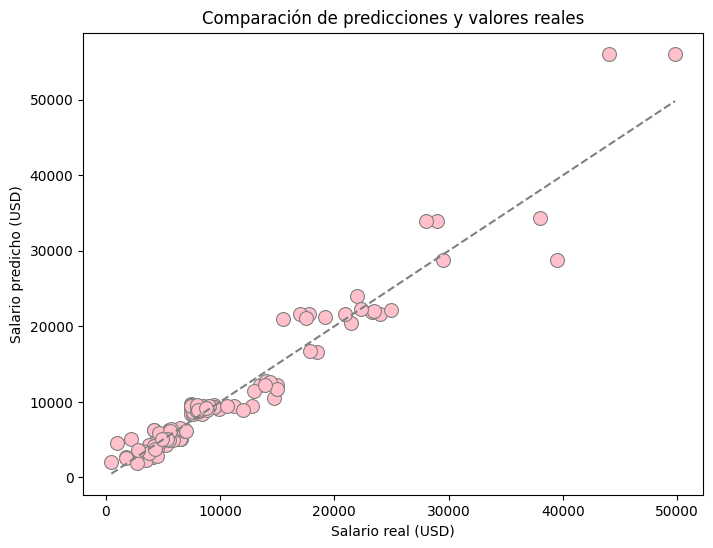

In [73]:


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='pink', s=100, edgecolor='gray')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')
plt.xlabel("Salario real (USD)")
plt.ylabel("Salario predicho (USD)")
plt.title("Comparación de predicciones y valores reales")
plt.show()

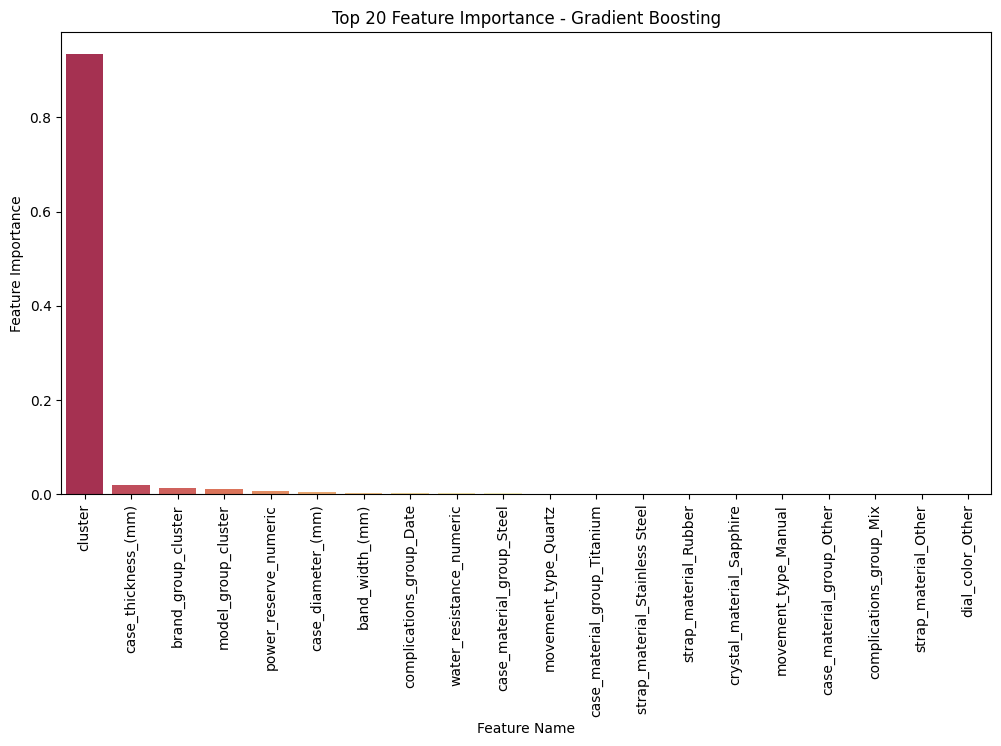

In [74]:

# Obtener los nombres de las características del preprocesador
feature_names = []
try:
    feature_names = best_gb.named_steps['preprocessor'].get_feature_names_out()
except AttributeError:
    # Si hay transformaciones que no soportan `get_feature_names_out`, lo solucionamos manualmente
    num_features = numerical_columns_log + numerical_columns_no_log  # Variables numéricas
    cat_features = best_gb.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out().tolist()  # Variables categóricas
    feature_names = num_features + cat_features  # Combinamos

# Extraer importancia de características
feature_importances = best_gb.named_steps['model'].feature_importances_

# Crear DataFrame y ordenar por importancia
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)  # Top 20

# Crear el gráfico con la paleta "Spectral"
plt.figure(figsize=(12, 6))
colors = sns.color_palette("Spectral", len(importance_df))  # Generar colores con Spectral
sns.barplot(x=importance_df['Feature'], y=importance_df['Importance'], palette=colors)

# Ajustes del gráfico
plt.xticks(rotation=90)  # Rotar etiquetas para que se lean bien
plt.ylabel('Feature Importance')
plt.xlabel('Feature Name')
plt.title('Top 20 Feature Importance - Gradient Boosting')
plt.show()



## 4.MODELOS POR CLUSTERS 

En este caso vamos a divir en 3 datasets, para los modelos generales dividimos en 5 clusters desde un inicio, sin embargo,  para analizarlos por separado no contienen suficientes datos por ello volvemos a usar el k-means con 3 clusters , y rescatamos la copia del dataset donde incluimos los mapeos sin la agrupación de model y brand por clusters de esta manera contamos con esos datos originales.

In [75]:

# Seleccionar las características numéricas
numerical_features = ['price_(usd)', 'case_diameter_(mm)', 'case_thickness_(mm)', 'band_width_(mm)','power_reserve_numeric', 'water_resistance_numeric']

# Escalar las características numéricas
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clusters[numerical_features])

kmeans = KMeans(n_clusters=3, random_state=42)
df_clusters['cluster'] = kmeans.fit_predict(df_clusters[numerical_features])
# Ver cuántos relojes hay en cada cluster
print(df_clusters['cluster'].value_counts().sort_index())

cluster
0    345
1     24
2    137
Name: count, dtype: int64


In [76]:
df_clusters

,brand,model,case_material,strap_material,movement_type,water_resistance,case_diameter_(mm),case_thickness_(mm),band_width_(mm),dial_color,crystal_material,complications,power_reserve,price_(usd),water_resistance_numeric,power_reserve_numeric,cluster,complications_group,case_material_group
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.0,13.00,20.0,Black,Sapphire,Date,48 hours,9500,300.0,48.0,0,Date,Steel
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.5,14.47,21.0,Blue,Sapphire,Date,60 hours,5800,600.0,60.0,0,Date,Titanium
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100 meters,41.0,13.00,20.0,White,Sapphire,Chronograph,42 hours,4200,100.0,42.0,0,Chronograph,Steel
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30 meters,43.0,14.25,22.0,Black,Sapphire,Chronograph,70 hours,7900,30.0,70.0,0,Chronograph,Steel
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30 meters,31.0,6.05,20.0,Other,Sapphire,Date,60 hours,2800,30.0,60.0,0,Date,Steel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Breguet,Classique,18k Rose Gold,Leather,Automatic,30 meters,38.5,8.25,20.0,White,Sapphire,Date,38 hours,21500,30.0,38.0,2,Date,Gold
503,Blancpain,Fifty Fathoms,Stainless Steel,Other,Automatic,300 meters,45.0,15.50,23.0,Black,Sapphire,Date,120 hours,13500,300.0,120.0,2,Date,Steel
504,Longines,Master Collection,Stainless Steel,Leather,Automatic,30 meters,38.5,9.70,20.0,Blue,Sapphire,Date,64 hours,1800,30.0,64.0,0,Date,Steel
505,Vacheron Constantin,Overseas,Stainless Steel,Stainless Steel,Automatic,150 meters,41.5,11.00,22.0,Blue,Sapphire,Date,40 hours,19000,150.0,40.0,2,Date,Steel


In [77]:
df_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 506
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     506 non-null    object 
 1   model                     506 non-null    object 
 2   case_material             506 non-null    object 
 3   strap_material            506 non-null    object 
 4   movement_type             506 non-null    object 
 5   water_resistance          506 non-null    object 
 6   case_diameter_(mm)        506 non-null    float64
 7   case_thickness_(mm)       506 non-null    float64
 8   band_width_(mm)           506 non-null    float64
 9   dial_color                506 non-null    object 
 10  crystal_material          506 non-null    object 
 11  complications             506 non-null    object 
 12  power_reserve             506 non-null    object 
 13  price_(usd)               506 non-null    int64  
 14  water_resistanc

In [78]:
df_clusters.drop(columns=['water_resistance', 'power_reserve', 'case_material','complications'], inplace=True)

In [79]:
df_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 506
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     506 non-null    object 
 1   model                     506 non-null    object 
 2   strap_material            506 non-null    object 
 3   movement_type             506 non-null    object 
 4   case_diameter_(mm)        506 non-null    float64
 5   case_thickness_(mm)       506 non-null    float64
 6   band_width_(mm)           506 non-null    float64
 7   dial_color                506 non-null    object 
 8   crystal_material          506 non-null    object 
 9   price_(usd)               506 non-null    int64  
 10  water_resistance_numeric  506 non-null    float64
 11  power_reserve_numeric     506 non-null    float64
 12  cluster                   506 non-null    int32  
 13  complications_group       506 non-null    object 
 14  case_material_g

### 4.1 SEPARACIÓN POR CLUSTERS

In [80]:
# Filtrar los datos para obtener solo las filas del clúster 0
df_cluster_0 = df_clusters[df_clusters['cluster'] == 0]

# Separar las variables predictoras (X) y la variable objetivo (y)
X_cluster_0 = df_cluster_0.drop(columns=["price_(usd)", "cluster"])  # Variables predictoras
y_cluster_0 = df_cluster_0["price_(usd)"]  # Variable objetivo

# Dividir los datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_cluster_0, y_cluster_0, test_size=0.2, random_state=42)

# Aplicar el pipeline de preprocesamiento a los datos de entrenamiento y prueba
# Transformar X_train y X_test con el pipeline previamente creado

In [81]:
X_train_0.columns

Index(['brand', 'model', 'strap_material', 'movement_type',
       'case_diameter_(mm)', 'case_thickness_(mm)', 'band_width_(mm)',
       'dial_color', 'crystal_material', 'water_resistance_numeric',
       'power_reserve_numeric', 'complications_group', 'case_material_group'],
      dtype='object')

In [82]:
X_train_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 87 to 143
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     276 non-null    object 
 1   model                     276 non-null    object 
 2   strap_material            276 non-null    object 
 3   movement_type             276 non-null    object 
 4   case_diameter_(mm)        276 non-null    float64
 5   case_thickness_(mm)       276 non-null    float64
 6   band_width_(mm)           276 non-null    float64
 7   dial_color                276 non-null    object 
 8   crystal_material          276 non-null    object 
 9   water_resistance_numeric  276 non-null    float64
 10  power_reserve_numeric     276 non-null    float64
 11  complications_group       276 non-null    object 
 12  case_material_group       276 non-null    object 
dtypes: float64(5), object(8)
memory usage: 30.2+ KB


Una vez separados los clusters vamos a observar su datos, en este primer cluster tenemos bastante variación de precios(hasta 10000) marcas y modelos 

### 4.2 PIPELINE Y ENTRENAMIENTO DE CLUSTER CERO

In [83]:
df_clusters[df_clusters["cluster"] == 0]


,brand,model,strap_material,movement_type,case_diameter_(mm),case_thickness_(mm),band_width_(mm),dial_color,crystal_material,price_(usd),water_resistance_numeric,power_reserve_numeric,cluster,complications_group,case_material_group
0,Rolex,Submariner,Stainless Steel,Automatic,40.0,13.00,20.0,Black,Sapphire,9500,300.0,48.0,0,Date,Steel
1,Omega,Seamaster,Rubber,Automatic,43.5,14.47,21.0,Blue,Sapphire,5800,600.0,60.0,0,Date,Titanium
2,Tag Heuer,Carrera,Leather,Automatic,41.0,13.00,20.0,White,Sapphire,4200,100.0,42.0,0,Chronograph,Steel
3,Breitling,Navitimer,Stainless Steel,Automatic,43.0,14.25,22.0,Black,Sapphire,7900,30.0,70.0,0,Chronograph,Steel
4,Cartier,Tank Solo,Leather,Quartz,31.0,6.05,20.0,Other,Sapphire,2800,30.0,60.0,0,Date,Steel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,Tudor,Black Bay,Leather,Automatic,41.0,14.75,22.0,Black,Sapphire,3800,200.0,70.0,0,Date,Steel
498,IWC,Pilot's Watch,Leather,Automatic,39.0,10.86,20.0,Black,Sapphire,4500,60.0,42.0,0,Date,Steel
499,Panerai,Luminor Marina,Rubber,Automatic,44.0,15.65,24.0,Black,Sapphire,9500,300.0,72.0,0,Date,Titanium
504,Longines,Master Collection,Leather,Automatic,38.5,9.70,20.0,Blue,Sapphire,1800,30.0,64.0,0,Date,Steel


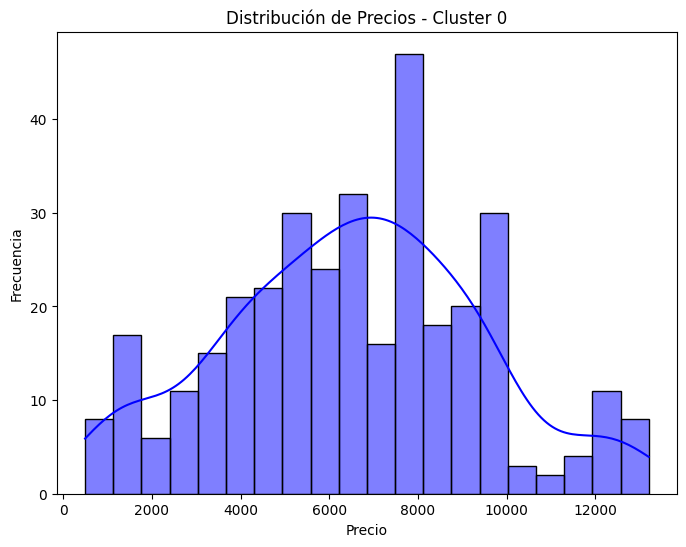

In [84]:

# Filtrar el dataset solo para el Cluster 0
cluster_0 = df_clusters[df_clusters["cluster"] == 0]

# Crear el histograma con KDE
plt.figure(figsize=(8,6))
sns.histplot(cluster_0["price_(usd)"], bins=20, kde=True, color="blue")

# Etiquetas y título
plt.title("Distribución de Precios - Cluster 0")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()


In [85]:


# Variables categóricas a transformar
categorical_columns = ['brand' ,'model','strap_material', 'movement_type', 'dial_color',
       'crystal_material', 'complications_group', 'case_material_group']  # Añadir las categóricas que hayas seleccionado

# Pipeline para variables categóricas
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Rellenar los valores faltantes con el más frecuente
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))  # Codificación OneHot
])


In [86]:


# Variables numéricas a transformar
numerical_columns = ['case_diameter_(mm)', 'band_width_(mm)', 'case_thickness_(mm)','water_resistance_numeric', 'power_reserve_numeric']  # Ajusta según tus variables


def log_transform(x):
    return np.log1p(x)  # Usamos log1p para evitar log(0)

# Las variables que aplicarían el logaritmo
log_transform_columns = ['water_resistance_numeric', 'power_reserve_numeric']  # Ajusta según las variables sesgadas

# Dividir las variables numéricas en log-transformadas y no transformadas
numerical_columns_log = [col for col in numerical_columns if col in log_transform_columns]
numerical_columns_no_log = [col for col in numerical_columns if col not in log_transform_columns]

# Pipeline para las variables numéricas (log-transformed)
numerical_pipeline_log = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes con la media
    ('log_transform', FunctionTransformer(log_transform, validate=False)),  # Aplicar logaritmo solo a las variables sesgadas
    ('scaler', StandardScaler())  # Escalar las variables numéricas
])

# Pipeline para las variables numéricas sin log
numerical_pipeline_no_log = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes con la media
    ('scaler', StandardScaler())  # Escalar las variables numéricas

])

In [87]:
# Crear el ColumnTransformer para aplicar las transformaciones a las columnas categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num_log', numerical_pipeline_log, numerical_columns_log),  # Aplicar log a las variables sesgadas
        ('num_no_log', numerical_pipeline_no_log, numerical_columns_no_log),
        ('cat', categorical_pipeline, categorical_columns)
    ], remainder = 'drop')

# Crear el pipeline final
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Ajustar el pipeline a los datos de entrenamiento
pipeline.fit(X_train_0)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_log',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<function log_transform at 0x000001B814B03CE0>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['water_resistance_numeric',
                                                   'power_reserve_numeric']),
                                                 ('num_no_log',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  (...
                                                                   StandardScaler())]),
                                                  ['case_diameter_(mm)',
                                                   'band_width_(mm)',
                                                   'case_thickness_(mm)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['brand', 'model',
                                                   'strap_material',
                                                   'movement_type',
                                                   'dial_color',
                                                   'crystal_material',
                                                   'complications_group',
                                                   'case_material_group'])]))])

In [88]:
# Transformación de X_train y X_test usando el pipeline predefinido
X_train_0_transformed = pipeline.fit_transform(X_train_0)  # Usamos fit_transform en X_train para ajustar y transformar
X_test_0_transformed = pipeline.transform(X_test_0)  # Usamos transform en X_test para solo transformar

In [89]:
# Definir la ruta a la carpeta 'Models' dentro de 'SRC'
models_dir = os.path.join('..', 'Models')  # '..' retrocede una carpeta hacia 'SRC'

# Asegurarte de que la carpeta 'Models' existe
os.makedirs(models_dir, exist_ok=True)

# Guardar el pipeline en el archivo dentro de 'Models'
joblib.dump(pipeline, os.path.join(models_dir, 'pipeline_clusters.joblib'))

['..\\Models\\pipeline_clusters.joblib']

Volvemos a reentrenar con validacion cruzada los modelos pero para el cluster 0 pudiendo encontrar que hemos reducido el RMSE en mas de 1000 dolares para los datos de este cluster,sin embargo no hemos mantenido el R2,  el modelo selccionado ahora sera un Lasso y el segundo modelo seleccionado por emjor RMSE sera una regresion lineal, los entrenaremos  y optimizaremos aunque no tenemos muchas formas de optimizar estos modelos.

In [90]:
# Diccionario de modelos
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0),
    'LightGBM': lgb.LGBMRegressor(random_state=42, verbose=-1),
    'CatBoost': cb.CatBoostRegressor(verbose=0, random_state=42),
    'SVR': SVR(),
    'MLP Regressor': MLPRegressor(random_state=42, max_iter=1000)
}

# Evaluación con validación cruzada
cv_results = {}

for name, model in models.items():
    try:
        score = np.mean(-cross_val_score(model, X_train_0_transformed, y_train_0, cv=5, scoring='neg_root_mean_squared_error'))
        cv_results[name] = score
        print(f"{name}: RMSE {score:.2f}")
    except Exception as e:
        cv_results[name] = None
        print(f"⚠️ Error en {name}: {e}")

# Ordenar los resultados de menor a mayor RMSE
cv_results_sorted = sorted(cv_results.items(), key=lambda x: x[1] if x[1] is not None else float('inf'))

# Mostrar resultados
print("\n🔹 Resultados de validación cruzada (ordenados por RMSE):")
for name, score in cv_results_sorted:
    print(f"{name}: RMSE {score:.2f}" if score is not None else f"{name}: ❌ Error")

Linear Regression: RMSE 1370.90
Ridge: RMSE 1442.55
Lasso: RMSE 1316.36
ElasticNet: RMSE 2490.61
Random Forest: RMSE 1731.72
Gradient Boosting: RMSE 1629.70
⚠️ Error en XGBoost: 'super' object has no attribute '__sklearn_tags__'
LightGBM: RMSE 2060.85
CatBoost: RMSE 1632.36
SVR: RMSE 2891.33
MLP Regressor: RMSE 4520.97

🔹 Resultados de validación cruzada (ordenados por RMSE):
Lasso: RMSE 1316.36
Linear Regression: RMSE 1370.90
Ridge: RMSE 1442.55
Gradient Boosting: RMSE 1629.70
CatBoost: RMSE 1632.36
Random Forest: RMSE 1731.72
LightGBM: RMSE 2060.85
ElasticNet: RMSE 2490.61
SVR: RMSE 2891.33
MLP Regressor: RMSE 4520.97
XGBoost: ❌ Error


In [91]:
# Importar Lasso
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# Asumiendo que ya has realizado el preprocesamiento y el pipeline

# Definir el modelo Lasso
lasso = Lasso(alpha=0.1)  # Puedes ajustar el parámetro alpha según el rendimiento

# Ajustar el modelo con el conjunto de entrenamiento (X_train_0 y y_train_0)
lasso.fit(X_train_0_transformed, y_train_0)

# Realizar predicciones sobre el conjunto de prueba
y_pred_lasso = lasso.predict(X_test_0_transformed)

# Evaluación del modelo
# Calcular el error cuadrático medio (RMSE)
rmse_lasso = np.sqrt(mean_squared_error(y_test_0, y_pred_lasso))
print(f"RMSE del modelo Lasso: {rmse_lasso}")

# Si también quieres calcular el R²
r2_lasso = lasso.score(X_test_0_transformed, y_test_0)
print(f"R² del modelo Lasso: {r2_lasso}")


RMSE del modelo Lasso: 1476.161679691449
R² del modelo Lasso: 0.7273547770141098


In [92]:
# Definir los rangos de alpha para buscar el mejor valor
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Crear el modelo Lasso
lasso = Lasso()

# Realizar GridSearchCV con validación cruzada
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train_0_transformed, y_train_0)

# Mostrar el mejor valor de alpha encontrado
print(f"Mejor valor de alpha: {grid_search.best_params_['alpha']}")

# Obtener el mejor modelo ajustado
best_lasso = grid_search.best_estimator_

# Evaluar el modelo en los datos de prueba
y_pred_0 = best_lasso.predict(X_test_0_transformed)

rmse = np.sqrt(mean_squared_error(y_test_0, y_pred_0))
print(f"RMSE del modelo Lasso con mejor alpha: {rmse}")


Mejor valor de alpha: 1
RMSE del modelo Lasso con mejor alpha: 1389.4887142450175


In [93]:
# Definir la ruta a la carpeta Models
models_dir = "../Models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
    
joblib.dump(best_lasso, os.path.join(models_dir, "lasso_model.joblib"))

print("Modelo Lasso guardado en ../Models/lasso_model.joblib")

Modelo Lasso guardado en ../Models/lasso_model.joblib


In [94]:

# Crear el modelo de regresión lineal
linear_reg = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
linear_reg.fit(X_train_0_transformed, y_train_0)

# Hacer las predicciones en los datos de prueba
y_pred_lr = linear_reg.predict(X_test_0_transformed)

# Calcular el RMSE (Raíz del Error Cuadrático Medio)
rmse_lr = np.sqrt(mean_squared_error(y_test_0, y_pred_lr))
print(f"RMSE del modelo de Regresión Lineal: {rmse_lr}")

# Calcular R^2 (coeficiente de determinación)
r2_lr = linear_reg.score(X_test_0_transformed, y_test_0)
print(f"R² del modelo de Regresión Lineal: {r2_lr}")

RMSE del modelo de Regresión Lineal: 1472.89546953267
R² del modelo de Regresión Lineal: 0.7285599721011362


In [95]:
# Definir los parámetros para RandomizedSearchCV
param_dist = {
    'fit_intercept': [True, False],  # Ajustar si el modelo debe aprender el intercepto o no
}

# Crear el modelo de regresión lineal
linear_reg = LinearRegression()

# Crear RandomizedSearchCV con validación cruzada de 5 veces
random_search = RandomizedSearchCV(estimator=linear_reg, param_distributions=param_dist, 
                                   n_iter=10, cv=5, scoring='neg_root_mean_squared_error', 
                                   random_state=42, n_jobs=-1)

# Ajustar el modelo con los datos de entrenamiento
random_search.fit(X_train_0_transformed, y_train_0)

# Mostrar el mejor parámetro encontrado
print(f"Mejor parámetro de ajuste: {random_search.best_params_}")

# Obtener el mejor modelo ajustado
best_linear_reg = random_search.best_estimator_

# Hacer las predicciones en los datos de prueba
y_pred_lr_best = best_linear_reg.predict(X_test_0_transformed)

# Calcular RMSE con el mejor modelo
rmse_lr_best = np.sqrt(mean_squared_error(y_test_0, y_pred_lr_best))
print(f"RMSE del modelo de Regresión Lineal con RandomizedSearch: {rmse_lr_best}")

# Calcular R² con el mejor modelo
r2_lr_best = best_linear_reg.score(X_test_0_transformed, y_test_0)
print(f"R² del modelo de Regresión Lineal con RandomizedSearch: {r2_lr_best}")

Mejor parámetro de ajuste: {'fit_intercept': True}
RMSE del modelo de Regresión Lineal con RandomizedSearch: 1472.89546953267
R² del modelo de Regresión Lineal con RandomizedSearch: 0.7285599721011362


In [96]:
# Guardar el mejor modelo de Regresión Lineal
joblib.dump(best_linear_reg, os.path.join(models_dir, "best_linear_reg_model.joblib"))
print("Mejor modelo de Regresión Lineal guardado en ../Models/best_linear_reg_model.joblib")

Mejor modelo de Regresión Lineal guardado en ../Models/best_linear_reg_model.joblib


##### Conclusion del cluster 0
El mejor modelos es un lasso optimizado con alpha 1 con un RMSE DE 1389€

### 4.3 PIPELINE Y ENTRENAMIENTO PARA CLUSTER 1

De nuevo repetiremos todo el proceso para entrenar con validacion cruzada el cluster 1, sin embargo en este caso, obtenemos unos resultados nefastos en cuanto a error, por lo que observamos que resgistros tenemos dentro de este cluster.
Solo con la distribusion vemos que oscila entre los precios de 34000 a 70000 dolares

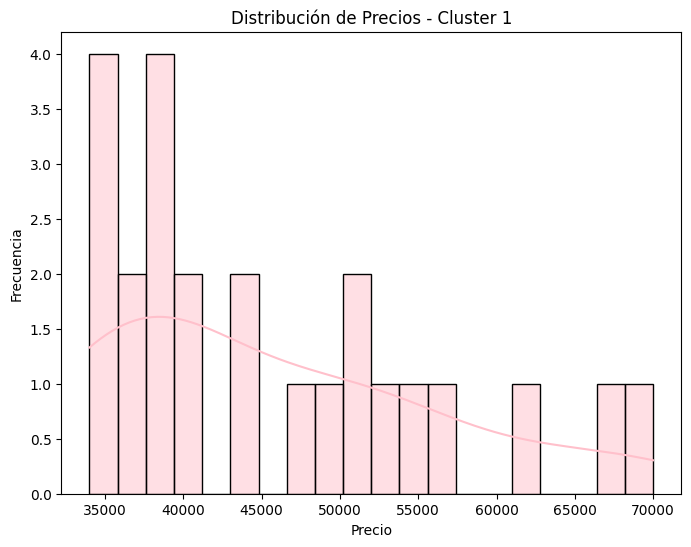

In [97]:
# Filtrar el dataset solo para el Cluster 0
cluster_1 = df_clusters[df_clusters["cluster"] == 1]

# Crear el histograma con KDE
plt.figure(figsize=(8,6))
sns.histplot(cluster_1["price_(usd)"], bins=20, kde=True, color="pink")

# Etiquetas y título
plt.title("Distribución de Precios - Cluster 1")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()


In [98]:
df_cluster_1 = df_clusters[df_clusters['cluster'] == 1]

# Separar las variables predictoras (X) y la variable objetivo (y)
X_cluster_1 = df_cluster_1.drop(columns=["price_(usd)", "cluster"])  # Variables predictoras
y_cluster_1 = df_cluster_1["price_(usd)"]  # Variable objetivo

# Dividir los datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_cluster_1, y_cluster_1, test_size=0.2, random_state=42)

In [99]:
# Crear el pipeline final
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Ajustar el pipeline a los datos de entrenamiento
pipeline.fit(X_train_1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_log',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<function log_transform at 0x000001B814B03CE0>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['water_resistance_numeric',
                                                   'power_reserve_numeric']),
                                                 ('num_no_log',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  (...
                                                                   StandardScaler())]),
                                                  ['case_diameter_(mm)',
                                                   'band_width_(mm)',
                                                   'case_thickness_(mm)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['brand', 'model',
                                                   'strap_material',
                                                   'movement_type',
                                                   'dial_color',
                                                   'crystal_material',
                                                   'complications_group',
                                                   'case_material_group'])]))])

In [100]:
# Transformación de X_train y X_test usando el pipeline predefinido
X_train_1_transformed = pipeline.fit_transform(X_train_1)  # Usamos fit_transform en X_train para ajustar y transformar
X_test_1_transformed = pipeline.transform(X_test_1)  # Usamos transform en X_test para solo transformar

In [101]:
# Diccionario de modelos
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0),
    'LightGBM': lgb.LGBMRegressor(random_state=42, verbose=-1),
    'CatBoost': cb.CatBoostRegressor(verbose=0, random_state=42),
    'SVR': SVR(),
    'MLP Regressor': MLPRegressor(random_state=42, max_iter=1000)
}

# Evaluación con validación cruzada
cv_results = {}

for name, model in models.items():
    try:
        score = np.mean(-cross_val_score(model, X_train_1_transformed, y_train_1, cv=5, scoring='neg_root_mean_squared_error'))
        cv_results[name] = score
        print(f"{name}: RMSE {score:.2f}")
    except Exception as e:
        cv_results[name] = None
        print(f"⚠️ Error en {name}: {e}")

# Ordenar los resultados de menor a mayor RMSE
cv_results_sorted = sorted(cv_results.items(), key=lambda x: x[1] if x[1] is not None else float('inf'))

# Mostrar resultados
print("\n🔹 Resultados de validación cruzada (ordenados por RMSE):")
for name, score in cv_results_sorted:
    print(f"{name}: RMSE {score:.2f}" if score is not None else f"{name}: ❌ Error")

Linear Regression: RMSE 33861.62
Ridge: RMSE 14360.58
Lasso: RMSE 34224.76
ElasticNet: RMSE 13287.82
Random Forest: RMSE 15544.78
Gradient Boosting: RMSE 15591.00
⚠️ Error en XGBoost: 'super' object has no attribute '__sklearn_tags__'
LightGBM: RMSE 12701.75
CatBoost: RMSE 15557.42
SVR: RMSE 13853.68
MLP Regressor: RMSE 44795.06

🔹 Resultados de validación cruzada (ordenados por RMSE):
LightGBM: RMSE 12701.75
ElasticNet: RMSE 13287.82
SVR: RMSE 13853.68
Ridge: RMSE 14360.58
Random Forest: RMSE 15544.78
CatBoost: RMSE 15557.42
Gradient Boosting: RMSE 15591.00
Linear Regression: RMSE 33861.62
Lasso: RMSE 34224.76
MLP Regressor: RMSE 44795.06
XGBoost: ❌ Error


Observando los registros que e encuentran en este cluster podemos ver que un modelos el que desbalancea todo nuestro dataset, se corresponde con el modelos Nautilius de la marca Patek Philippe, el cual se corresponde con los outliers de nuestra target, posiblemnte se trate de una edicion limitada o una marca que saque determiadas ediciones limitadas de ese modelo. 

In [102]:
df_clusters[df_clusters["cluster"] == 1]

,brand,model,strap_material,movement_type,case_diameter_(mm),case_thickness_(mm),band_width_(mm),dial_color,crystal_material,price_(usd),water_resistance_numeric,power_reserve_numeric,cluster,complications_group,case_material_group
62,Patek Philippe,Nautilus,Stainless Steel,Automatic,40.8,8.3,20.0,Blue,Sapphire,44500,120.0,48.0,1,Date,Steel
73,Patek Philippe,Nautilus,Stainless Steel,Automatic,40.5,8.3,20.0,Blue,Sapphire,49800,120.0,45.0,1,Date,Steel
105,Patek Philippe,Nautilus,Stainless Steel,Automatic,40.8,8.3,20.0,Blue,Sapphire,38000,120.0,45.0,1,Date,Steel
106,Audemars Piguet,Royal Oak,Other,Automatic,41.0,9.8,20.0,Blue,Sapphire,55000,50.0,60.0,1,Date,Gold
121,Patek Philippe,Nautilus,Stainless Steel,Automatic,40.8,8.3,20.0,Blue,Sapphire,47000,120.0,45.0,1,Date,Steel
129,Patek Philippe,Nautilus,Stainless Steel,Automatic,40.8,8.3,20.0,Blue,Sapphire,38000,120.0,45.0,1,Date,Steel
178,Patek Philippe,Nautilus,Stainless Steel,Automatic,40.5,8.3,22.0,Blue,Sapphire,34000,120.0,45.0,1,Date,Steel
182,Patek Philippe,Nautilus,Stainless Steel,Automatic,40.5,8.3,22.0,Blue,Sapphire,34000,120.0,45.0,1,Date,Steel
236,Patek Philippe,Nautilus,Stainless Steel,Automatic,40.8,8.3,21.0,Blue,Sapphire,51000,120.0,55.0,1,Date,Steel
252,Patek Philippe,Nautilus,Stainless Steel,Automatic,40.8,8.3,21.0,Blue,Sapphire,62500,120.0,45.0,1,Date,Steel


### 4.4 PIPELINE Y ENTRENAMIENTO PARA CLUSTER 2

Repetimos el entrenamiento para el cluster 2 obteniedno de nuevo una regresion lineal como mejor modelo, con un RMSE DE 3112 dolares, teniendo en cuenta que el precio en este caso oscila entre 12000 dolares y 28000 el error lo podemos considerar no muy alto pero si mejorable

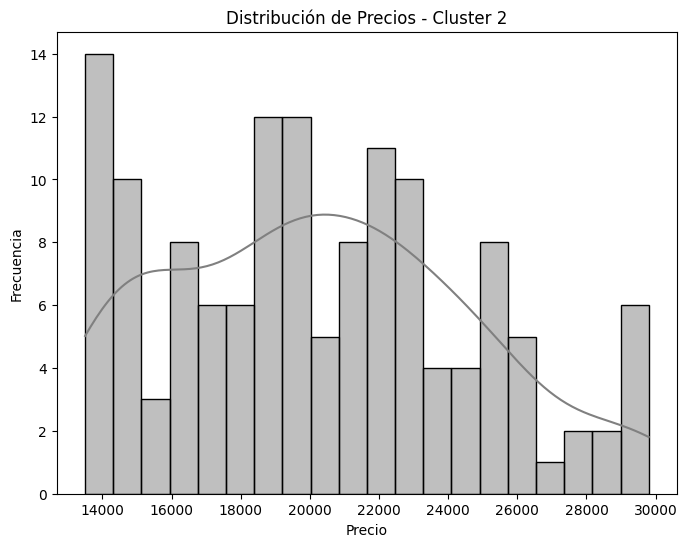

In [103]:
# Filtrar el dataset solo para el Cluster 0
cluster_2 = df_clusters[df_clusters["cluster"] == 2]

# Crear el histograma con KDE
plt.figure(figsize=(8,6))
sns.histplot(cluster_2["price_(usd)"], bins=20, kde=True, color="gray")

# Etiquetas y título
plt.title("Distribución de Precios - Cluster 2")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()


In [104]:
df_cluster_2 = df_clusters[df_clusters['cluster'] == 2]

# Separar las variables predictoras (X) y la variable objetivo (y)
X_cluster_2 = df_cluster_2.drop(columns=["price_(usd)", "cluster"])  # Variables predictoras
y_cluster_2 = df_cluster_2["price_(usd)"]  # Variable objetivo

# Dividir los datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_cluster_2, y_cluster_2, test_size=0.2, random_state=42)

In [105]:
# Crear el pipeline final
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Ajustar el pipeline a los datos de entrenamiento
pipeline.fit(X_train_2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_log',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<function log_transform at 0x000001B814B03CE0>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['water_resistance_numeric',
                                                   'power_reserve_numeric']),
                                                 ('num_no_log',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  (...
                                                                   StandardScaler())]),
                                                  ['case_diameter_(mm)',
                                                   'band_width_(mm)',
                                                   'case_thickness_(mm)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['brand', 'model',
                                                   'strap_material',
                                                   'movement_type',
                                                   'dial_color',
                                                   'crystal_material',
                                                   'complications_group',
                                                   'case_material_group'])]))])

In [106]:
# Transformación de X_train y X_test usando el pipeline predefinido
X_train_2_transformed = pipeline.fit_transform(X_train_2)  # Usamos fit_transform en X_train para ajustar y transformar
X_test_2_transformed = pipeline.transform(X_test_2)  # Usamos transform en X_test para solo transformar

In [107]:
# Diccionario de modelos
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0),
    'LightGBM': lgb.LGBMRegressor(random_state=42, verbose=-1),
    'CatBoost': cb.CatBoostRegressor(verbose=0, random_state=42),
    'SVR': SVR(),
    'MLP Regressor': MLPRegressor(random_state=42, max_iter=1000)
}

# Evaluación con validación cruzada
cv_results = {}

for name, model in models.items():
    try:
        score = np.mean(-cross_val_score(model, X_train_2_transformed, y_train_2, cv=5, scoring='neg_root_mean_squared_error'))
        cv_results[name] = score
        print(f"{name}: RMSE {score:.2f}")
    except Exception as e:
        cv_results[name] = None
        print(f"⚠️ Error en {name}: {e}")

# Ordenar los resultados de menor a mayor RMSE
cv_results_sorted = sorted(cv_results.items(), key=lambda x: x[1] if x[1] is not None else float('inf'))

# Mostrar resultados
print("\n🔹 Resultados de validación cruzada (ordenados por RMSE):")
for name, score in cv_results_sorted:
    print(f"{name}: RMSE {score:.2f}" if score is not None else f"{name}: ❌ Error")

Linear Regression: RMSE 3359.65
Ridge: RMSE 3475.55
Lasso: RMSE 3499.65
ElasticNet: RMSE 3521.98
Random Forest: RMSE 3542.16
Gradient Boosting: RMSE 3667.65
⚠️ Error en XGBoost: 'super' object has no attribute '__sklearn_tags__'
LightGBM: RMSE 3424.17
CatBoost: RMSE 3547.11
SVR: RMSE 4370.93
MLP Regressor: RMSE 19541.60

🔹 Resultados de validación cruzada (ordenados por RMSE):
Linear Regression: RMSE 3359.65
LightGBM: RMSE 3424.17
Ridge: RMSE 3475.55
Lasso: RMSE 3499.65
ElasticNet: RMSE 3521.98
Random Forest: RMSE 3542.16
CatBoost: RMSE 3547.11
Gradient Boosting: RMSE 3667.65
SVR: RMSE 4370.93
MLP Regressor: RMSE 19541.60
XGBoost: ❌ Error


In [108]:
df_clusters[df_clusters["cluster"] == 2]

,brand,model,strap_material,movement_type,case_diameter_(mm),case_thickness_(mm),band_width_(mm),dial_color,crystal_material,price_(usd),water_resistance_numeric,power_reserve_numeric,cluster,complications_group,case_material_group
14,Breguet,Classique,Leather,Manual,38.0,8.65,20.0,Other,Sapphire,16000,30.0,40.0,2,Date,Gold
15,Audemars Piguet,Royal Oak,Stainless Steel,Automatic,41.0,9.80,20.0,Other,Sapphire,22000,50.0,60.0,2,Date,Steel
16,Vacheron Constantin,Overseas,Rubber,Automatic,41.0,11.00,22.0,Blue,Sapphire,19000,150.0,40.0,2,Date,Steel
21,Rolex,GMT-Master II,Stainless Steel,Automatic,40.0,12.50,20.0,Black,Sapphire,14000,100.0,48.0,2,Other,Steel
27,Audemars Piguet,Royal Oak,Stainless Steel,Automatic,41.0,10.40,20.0,Black,Sapphire,21000,50.0,60.0,2,Date,Steel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,Breguet,Classique,Leather,Automatic,39.0,9.90,22.0,White,Sapphire,27900,30.0,65.0,2,Date,Gold
501,Audemars Piguet,Royal Oak,Stainless Steel,Automatic,41.0,10.40,20.0,Black,Sapphire,24000,50.0,60.0,2,Date,Steel
502,Breguet,Classique,Leather,Automatic,38.5,8.25,20.0,White,Sapphire,21500,30.0,38.0,2,Date,Gold
503,Blancpain,Fifty Fathoms,Other,Automatic,45.0,15.50,23.0,Black,Sapphire,13500,300.0,120.0,2,Date,Steel


In [109]:
# Definir los parámetros para RandomizedSearchCV
param_dist = {
    'fit_intercept': [True, False],  # Ajustar si el modelo debe aprender el intercepto o no
}

# Crear el modelo de regresión lineal
linear_reg = LinearRegression()

# Crear RandomizedSearchCV con validación cruzada de 5 veces
random_search = RandomizedSearchCV(estimator=linear_reg, param_distributions=param_dist, 
                                   n_iter=10, cv=5, scoring='neg_root_mean_squared_error', 
                                   random_state=42, n_jobs=-1)

# Ajustar el modelo con los datos de entrenamiento
random_search.fit(X_train_2_transformed, y_train_2)

# Mostrar el mejor parámetro encontrado
print(f"Mejor parámetro de ajuste: {random_search.best_params_}")

# Obtener el mejor modelo ajustado
best_linear_reg = random_search.best_estimator_

# Hacer las predicciones en los datos de prueba
y_pred_lr_best = best_linear_reg.predict(X_test_2_transformed)

# Calcular RMSE con el mejor modelo
rmse_lr_best = np.sqrt(mean_squared_error(y_test_2, y_pred_lr_best))
print(f"RMSE del modelo de Regresión Lineal con RandomizedSearch: {rmse_lr_best}")

# Calcular R² con el mejor modelo
r2_lr_best = best_linear_reg.score(X_test_2_transformed, y_test_2)
print(f"R² del modelo de Regresión Lineal con RandomizedSearch: {r2_lr_best}")

Mejor parámetro de ajuste: {'fit_intercept': True}
RMSE del modelo de Regresión Lineal con RandomizedSearch: 3112.51986388238
R² del modelo de Regresión Lineal con RandomizedSearch: 0.4573397452320572


In [110]:
# Guardar el mejor modelo de Regresión Lineal con RandomizedSearch
joblib.dump(best_linear_reg, os.path.join(models_dir, "best_linear_reg_model_randomized_search.joblib"))
print("Mejor modelo de Regresión Lineal con RandomizedSearch guardado en ../Models/best_linear_reg_model_randomized_search.joblib")

Mejor modelo de Regresión Lineal con RandomizedSearch guardado en ../Models/best_linear_reg_model_randomized_search.joblib


### 4.5 CONCLUSIONES CLUSTERS



#### Análisis de los Clusters
Hemos dividido el conjunto de datos en tres clusters, cada uno con características distintas en cuanto a precios de relojes.

##### Cluster 0:
Este cluster abarca relojes con precios entre **2.000** y **14.000 USD**. El modelo predice razonablemente bien los precios dentro de este rango, con un RMSE aceptable (1.389). Aunque el R² no es elevado, los modelos muestran un buen desempeño en general.

##### Cluster 1:
En el cluster de **relojes de ediciones limitadas** (principalmente **Patek Philippe** y **Rolex**), los modelos no pudieron predecir bien debido a que estos relojes tienen un valor cualitativo que no se captura bien con modelos cuantitativos. El RMSE fue muy alto, lo que refleja la dificultad de modelar objetos de lujo exclusivos.

##### Cluster 2:
Los relojes de este cluster tienen precios entre **12.000** y **28.000 USD**. Aunque los modelos fueron más efectivos que en el Cluster 1, el RMSE (3.112) sigue siendo relativamente alto. La predicción es más precisa en rangos más bajos, pero la capacidad del modelo disminuye a medida que los precios suben.

#### Desempeño de Modelos Avanzados
Los modelos avanzados como **Random Forest** y **Gradient Boosting** obtuvieron RMSE de **2.500** y **2.400** respectivamente, con **R² de 0.92-0.93**, lo que indica que pueden predecir bien los precios en general. Sin embargo, estos modelos también luchan con los **precios más altos** (por encima de los 25.000 USD), donde la **exclusividad y características cualitativas** juegan un rol importante.

#### Conclusión General
Los modelos han demostrado ser efectivos en la mayoría de los clusters, con un desempeño destacable en el **Cluster 0**. El problema principal radica en la **dificultad de predecir precios para relojes exclusivos** de alta gama, especialmente en el **Cluster 1**. Los modelos como **Random Forest** y **Gradient Boosting** son sólidos para rangos de precio medio, pero se ven limitados cuando se enfrentan a la **exclusividad de marcas como Patek Philippe**. Para mejorar, sería ideal incorporar variables cualitativas y factores adicionales que reflejen el **valor percibido** de estos productos exclusivos.



### 4.6 OVERSAMPLING PARA CLUSTER 1

En un intetno de mejorar las metricas del cluster 1 intentamos generar mas datos de relojes con prescios superiores a 25000, para ver si podemos captar mejor las relaciones de los relojes del cluster 1, mejoramos la metrica sin poder reducirla considerablemente

In [111]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 506
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     506 non-null    object 
 1   model                     506 non-null    object 
 2   case_material             506 non-null    object 
 3   strap_material            506 non-null    object 
 4   movement_type             506 non-null    object 
 5   water_resistance          506 non-null    object 
 6   case_diameter_(mm)        506 non-null    float64
 7   case_thickness_(mm)       506 non-null    float64
 8   band_width_(mm)           506 non-null    float64
 9   dial_color                506 non-null    object 
 10  crystal_material          506 non-null    object 
 11  complications             506 non-null    object 
 12  power_reserve             506 non-null    object 
 13  price_(usd)               506 non-null    int64  
 14  water_resistanc

In [112]:
df_origin.columns

Index(['brand', 'model', 'case_material', 'strap_material', 'movement_type',
       'water_resistance', 'case_diameter_(mm)', 'case_thickness_(mm)',
       'band_width_(mm)', 'dial_color', 'crystal_material', 'complications',
       'power_reserve', 'price_(usd)', 'water_resistance_numeric',
       'power_reserve_numeric'],
      dtype='object')

In [114]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 506
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     506 non-null    object 
 1   model                     506 non-null    object 
 2   case_material             506 non-null    object 
 3   strap_material            506 non-null    object 
 4   movement_type             506 non-null    object 
 5   water_resistance          506 non-null    object 
 6   case_diameter_(mm)        506 non-null    float64
 7   case_thickness_(mm)       506 non-null    float64
 8   band_width_(mm)           506 non-null    float64
 9   dial_color                506 non-null    object 
 10  crystal_material          506 non-null    object 
 11  complications             506 non-null    object 
 12  power_reserve             506 non-null    object 
 13  price_(usd)               506 non-null    int64  
 14  water_resistanc

In [115]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

# Eliminamos solo las columnas correctas
df_origin = df_origin.drop(columns=['water_resistance', 'power_reserve'], errors='ignore')

# Filtramos el dataset por precio > 25000
df_filtered = df_origin[df_origin['price_(usd)'] > 25000].copy()

# Separar variables categóricas y numéricas
categorical_cols = ['brand', 'model', 'strap_material', 'dial_color', 
                    'crystal_material', 'movement_type', 'case_material', 'complications']
numerical_cols = ['case_diameter_(mm)', 'case_thickness_(mm)', 'band_width_(mm)', 
                  'water_resistance_numeric', 'power_reserve_numeric']

# Verificamos si hay valores nulos antes de aplicar LabelEncoder
df_filtered = df_filtered.dropna(subset=categorical_cols)

# Convertimos las variables categóricas a números con LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_filtered[col] = le.fit_transform(df_filtered[col])
    label_encoders[col] = le  # Guardamos los encoders

#  Definir X (features) e y (variable objetivo)
X = df_filtered[categorical_cols + numerical_cols]
y = df_filtered['price_(usd)']

# Aplicamos Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

#  Convertimos X_resampled de nuevo a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=categorical_cols + numerical_cols)
df_resampled['price_(usd)'] = y_resampled

# Revertimos la transformación LabelEncoder en las variables categóricas
for col in categorical_cols:
    df_resampled[col] = label_encoders[col].inverse_transform(df_resampled[col])

# Mostramos resultados
print(f"Número de registros después del oversampling: {len(df_resampled)}")
df_resampled.head()



Número de registros después del oversampling: 116


,brand,model,strap_material,dial_color,crystal_material,movement_type,case_material,complications,case_diameter_(mm),case_thickness_(mm),band_width_(mm),water_resistance_numeric,power_reserve_numeric,price_(usd)
0,Patek Philippe,Nautilus,Stainless Steel,Blue,Sapphire,Automatic,Stainless Steel,Date,40.5,8.3,20.0,120.0,45.0,29800
1,Patek Philippe,Nautilus,Stainless Steel,Blue,Sapphire,Automatic,Stainless Steel,"Date, Moon Phase",40.8,8.3,20.0,120.0,48.0,44500
2,Patek Philippe,Nautilus,Stainless Steel,Blue,Sapphire,Automatic,Stainless Steel,Date,40.5,8.3,20.0,120.0,45.0,49800
3,Patek Philippe,Nautilus,Stainless Steel,Blue,Sapphire,Automatic,Stainless Steel,"Date, Power Reserve, Moon Phase",40.8,8.3,20.0,120.0,45.0,38000
4,Audemars Piguet,Royal Oak,Rose Gold,Blue,Sapphire,Automatic,Rose Gold,Date,41.0,9.8,20.0,50.0,60.0,55000


In [116]:
# Contar cuántos registros había en df_origin con price > 25000 antes del oversampling
num_original = df_origin[df_origin["price_(usd)"] > 20000].shape[0]
print(f"Número de registros con price > 25000 antes del oversampling: {num_original}")

# Contar cuántos registros hay en df_oversampled después del oversampling
num_oversampled = df_resampled.shape[0]
print(f"Número de registros después del oversampling: {num_oversampled}")


Número de registros con price > 25000 antes del oversampling: 90
Número de registros después del oversampling: 116


In [118]:
df_resampled.columns

Index(['brand', 'model', 'strap_material', 'dial_color', 'crystal_material',
       'movement_type', 'case_material', 'complications', 'case_diameter_(mm)',
       'case_thickness_(mm)', 'band_width_(mm)', 'water_resistance_numeric',
       'power_reserve_numeric', 'price_(usd)'],
      dtype='object')

In [120]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     116 non-null    object 
 1   model                     116 non-null    object 
 2   strap_material            116 non-null    object 
 3   dial_color                116 non-null    object 
 4   crystal_material          116 non-null    object 
 5   movement_type             116 non-null    object 
 6   case_material             116 non-null    object 
 7   complications             116 non-null    object 
 8   case_diameter_(mm)        116 non-null    float64
 9   case_thickness_(mm)       116 non-null    float64
 10  band_width_(mm)           116 non-null    float64
 11  water_resistance_numeric  116 non-null    float64
 12  power_reserve_numeric     116 non-null    float64
 13  price_(usd)               116 non-null    int64  
dtypes: float64

In [121]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(df_resampled.isnull().sum())

# Verificar valores negativos en columnas de logaritmo
print("\nValores mínimos en columnas logarítmicas:")
print(df_resampled[['water_resistance_numeric', 'power_reserve_numeric']].min())


Valores nulos por columna:
brand                       0
model                       0
strap_material              0
dial_color                  0
crystal_material            0
movement_type               0
case_material               0
complications               0
case_diameter_(mm)          0
case_thickness_(mm)         0
band_width_(mm)             0
water_resistance_numeric    0
power_reserve_numeric       0
price_(usd)                 0
dtype: int64

Valores mínimos en columnas logarítmicas:
water_resistance_numeric    30.0
power_reserve_numeric       38.0
dtype: float64


In [123]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
import numpy as np

# Definir columnas categóricas y numéricas
categorical_cols = ['brand', 'model', 'strap_material', 'dial_color', 
                    'crystal_material', 'movement_type', 'case_material', 'complications']
numerical_cols = ['case_diameter_(mm)', 'case_thickness_(mm)', 'band_width_(mm)']
log_transform_cols = ['water_resistance_numeric', 'power_reserve_numeric']

#  Transformaciones
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()
log_transformer = FunctionTransformer(np.log1p, validate=False)  # Log(1 + x) para evitar problemas con ceros

# ColumnTransformer para combinar todo
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),  # Escalar numéricas
        ('cat', categorical_transformer, categorical_cols),  # OneHotEncoding a categóricas
        ('log', log_transformer, log_transform_cols)  # Log a variables específicas
    ]
)

#  Definir Pipeline completo
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Separar X (features) e y (target)
X = df_resampled.drop(columns=['price_(usd)'])  # Eliminar variable objetivo
y = df_resampled['price_(usd)']

# Aplicar el pipeline
X_transformed = model_pipeline.fit_transform(X)

# Verificar la transformación
print("Shape de X antes de la transformación:", X.shape)
print("Shape de X después de la transformación:", X_transformed.shape)


Shape de X antes de la transformación: (116, 13)
Shape de X después de la transformación: (116, 34)


In [124]:
# Transformación de X_train y X_test usando el pipeline predefinido
X_train_transformed = model_pipeline.fit_transform(X_train)  # Usamos fit_transform en X_train para ajustar y transformar
X_test_transformed = model_pipeline.fit_transform(X_test)


In [125]:
# Diccionario de modelos
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0),
    'LightGBM': lgb.LGBMRegressor(random_state=42, verbose=-1),
    'CatBoost': cb.CatBoostRegressor(verbose=0, random_state=42),
    'SVR': SVR(),
    'MLP Regressor': MLPRegressor(random_state=42, max_iter=1000)
}

# Evaluación con validación cruzada
cv_results = {}

for name, model in models.items():
    try:
        score = np.mean(-cross_val_score(model, X_train_transformed, y_train, cv=5, scoring='neg_root_mean_squared_error'))
        cv_results[name] = score
        print(f"{name}: RMSE {score:.2f}")
    except Exception as e:
        cv_results[name] = None
        print(f"⚠️ Error en {name}: {e}")

# Ordenar los resultados de menor a mayor RMSE
cv_results_sorted = sorted(cv_results.items(), key=lambda x: x[1] if x[1] is not None else float('inf'))

# Mostrar resultados
print("\n🔹 Resultados de validación cruzada (ordenados por RMSE):")
for name, score in cv_results_sorted:
    print(f"{name}: RMSE {score:.2f}" if score is not None else f"{name}: ❌ Error")

Linear Regression: RMSE 8741.77
Ridge: RMSE 8809.26
Lasso: RMSE 8990.15
ElasticNet: RMSE 10733.91
Random Forest: RMSE 6960.88
Gradient Boosting: RMSE 6611.81
⚠️ Error en XGBoost: 'super' object has no attribute '__sklearn_tags__'
LightGBM: RMSE 10584.19
CatBoost: RMSE 6274.08
SVR: RMSE 12629.36
MLP Regressor: RMSE 41699.62

🔹 Resultados de validación cruzada (ordenados por RMSE):
CatBoost: RMSE 6274.08
Gradient Boosting: RMSE 6611.81
Random Forest: RMSE 6960.88
Linear Regression: RMSE 8741.77
Ridge: RMSE 8809.26
Lasso: RMSE 8990.15
LightGBM: RMSE 10584.19
ElasticNet: RMSE 10733.91
SVR: RMSE 12629.36
MLP Regressor: RMSE 41699.62
XGBoost: ❌ Error


## 5. CONCLUSIONES FINALES



El objetivo principal de este análisis fue resolver dos problemas clave: la segmentación de los compradores de relojes de lujo, es decir, identificar perfiles de clientes, y predecir el precio de los relojes.  

Para lograr esto, comenzamos con un análisis exhaustivo de los datos, donde realizamos varias transformaciones y ajustes. En primer lugar, corregimos el precio e imputamos los valores nulos. También transformamos variables categóricas, como la resistencia al agua y la autonomía, a un formato numérico para obtener información más útil. Además, gestionamos los outliers para evitar que distorsionaran los resultados.  

A lo largo de este proceso, probamos diversas configuraciones. Eliminamos outliers en las variables numéricas y en la variable target para evaluar el impacto en los modelos. También probamos modelos con menos variables categóricas, utilizando solo las más importantes, como marca y modelo. Tras estos ajustes, nos centramos en los resultados de **Random Forest**, que demostraron ser los más sólidos.  

Con los datos procesados, decidimos abordar la segmentación utilizando **clustering jerárquico** y **K-means**. Esto nos permitió identificar tres segmentos principales de relojes que fueron clave para la predicción del precio y la comprensión de los perfiles de los compradores:  

- **Cluster 0** ($500 - $14,000): Este segmento tuvo la mejor predicción utilizando regresión lineal y Lasso, con un error de alrededor de $1,500.  
- **Cluster 1** (modelos exclusivos): Este grupo mostró una gran variabilidad en los precios debido a factores cualitativos como la exclusividad, lo que hizo que la predicción fuera más difícil. Intentamos mejorar la predicción de este segmento mediante **oversampling** para equilibrar las clases, pero aunque mejoramos los resultados, no logramos un RMSE aceptable.  
- **Cluster 2** ($14,000 - $34,000): Si bien la predicción fue razonable, aún hay margen para mejorar, especialmente con regresión lineal.  

En cuanto a los modelos predictivos, los mejores resultados fueron con **Random Forest y Gradient Boosting**, con un error de aproximadamente **2,000 dolares** para relojes por debajo de los **25,000 dolares** y un **R² del 93%**. Sin embargo, cuando se trató de relojes de mayor valor, la predicción fue menos precisa. Esto se debe a que estos relojes suelen estar influenciados por variables como la exclusividad, que no están reflejadas en los datos.  


Por tanto, los modelos predicen con bastante precisión para relojes de menos de **$25,000**, pero para relojes de lujo exclusivos, la tarea se complica debido a la falta de variables que capturen la exclusividad de los modelos.  

La segmentación por clusters resultó ser útil para identificar estos segmentos y perfilar mejor a los compradores, aunque sería necesario incluir más datos sobre la exclusividad para mejorar la predicción de estos modelos.
